## Metodologia do Estudo
### 1. Fonte de Dados
A análise foi realizada com base em dados públicos extraídos de diferentes fontes governamentais e acadêmicas, garantindo uma abordagem abrangente e confiável. As principais bases de dados utilizadas foram:

- Dados de acidentes em rodovias federais: Informações detalhadas sobre acidentes, vítimas, circunstâncias e características dos veículos envolvidos, disponibilizadas pela Polícia Rodoviária Federal (PRF) (https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf).

- Dados populacionais por estado: Informações sobre a população residente em cada unidade federativa, extraídas da Base dos Dados (https://basedosdados.org/dataset/d30222ad-7a5c-4778-a1ec-f0785371d1ca?table=b99f0017-e587-477e-8cfb-05fb5d1005b8).

- Dados da frota de veículos: Estatísticas sobre o número de veículos registrados por estado, disponíveis na Base dos Dados (https://basedosdados.org/dataset/61d592ca-5aec-4f66-b8eb-f7b894a29b66?table=3f0d609e-c85d-4daf-845f-08dd502665b2).

- Dados dos indicadores sociais: Métricas referentes aos índices como IDHM, IVS etc. (http://www.ipeadata.gov.br/Default.aspx)

- Referência acadêmica: O estudo "A letalidade dos acidentes de trânsito nas rodovias federais brasileiras em 2016", publicado na Revista Brasileira de Estudos de População(RBEP), serviu como base metodológica para a segmentação dos dados e cálculos estatísticos (https://www.scielo.br/j/rbepop/a/bSFrhRpsZ7T6FSb9hYSbLzP/).

- Referência acadêmica: O estudo "Acidentes de trânsito com vítimas: sub-registro, caracterização e letalidade", Cadernos de Saúde Pública, v. 19, n. 4, p. 979-986, 2003, aponta uma maior frequência aos finais de semana (https://www.scielo.br/j/csp/a/4RhCchxzCtvdvPwtc859QRn/?format=pdf&lang=pt).

- Referência acadêmica: O estudo "Serviço de Atendimento Móvel de Urgência: Um observatório dos acidentes de transportes terrestre em nível local", Revista Brasileira de Epidemiologia, v. 14, n. 1, p. 3-14, 2011., aponta uma maior frequência de atendimentos móveis hospitalares nos finais de semana, entre 18h00 e 5h59 (noite e madrugada).  (https://bvsms.saude.gov.br/bvs/is_digital/is_0211/pdfs/IS31(2)034.pdf).

- Referência acadêmica: O estudo “ÍNDICE DE DESENVOLVIMENTO HUMANO MUNICIPAL (IDHM) NO BRASIL: UM RELATO DA DESIGUALDADE ENTRE EDUCAÇÃO, RENDA E LONGEVIDADE” aponta que os Estados do Nordeste e Norte apresentam consistentemente os piores índices de IDHM do país (https://www.easyplanners.net/alas2017/opc/tl/6675_alisson_renan_scheidt_alisson.pdf)

- Referência acadêmica: O estudo "Vulnerabilidade Social, Fome e Pobreza Nas Regiões Norte e Nordeste Do Brasil“ indica que as regiões do Nordeste e Norte possuem a população mais carente e socialmente vulnerável do país (https://www.academia.edu/60480433/Vulnerabilidade_Social_Fome_e_Pobreza_Nas_Regi%C3%B5es_Norte_e_Nordeste_Do_Brasil)

### 2. Seleção e Limpeza dos Dados
Para garantir a qualidade da análise, foram realizadas etapas de pré-processamento dos dados:
Exclusão de indivíduos não expostos ao risco de morte: Seguindo a lógica metodológica do estudo acadêmico referenciado, foram removidos os registros de indivíduos classificados como ilesos, focando apenas naqueles que sofreram algum impacto no acidente.
Tratamento de valores ausentes e inconsistentes: Foram eliminadas ou corrigidas informações incompletas, garantindo maior confiabilidade nas estatísticas.
Conversão e padronização de colunas: Ajuste dos formatos de data, categorização de tipos de veículos e agrupamento de variáveis para facilitar as análises.

### 3. Indicadores e Técnicas Estatísticas
A análise exploratória envolveu a criação de métricas-chave e aplicação de testes estatísticos para entender padrões e correlações. Entre as principais abordagens utilizadas:
Percentual de fatalidade: Cálculo da proporção de vítimas fatais em relação ao total de vítimas expostas ao risco.
Análise de tendências: Construção de gráficos temporais para observar a evolução dos acidentes e óbitos entre 2007 e 2023.
Segmentação geográfica: Comparação entre estados e regiões para identificar locais com maior incidência de acidentes e mortes.

### 4. Visualização e Comunicação dos Resultados
Os resultados foram representados por meio de:
Gráficos interativos e dashboards, desenvolvidos para facilitar a interpretação dos dados.
Tabelas comparativas, destacando variações entre períodos e categorias de acidentes.
Dessa forma, a metodologia adotada permitiu uma análise detalhada e fundamentada dos padrões de acidentes em rodovias federais brasileiras, auxiliando na formulação de insights para políticas públicas e estratégias de mitigação de riscos.


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [29]:
from datetime import datetime, date
import csv
import os
import glob
import chardet
import re
import polars as pl
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import anderson, shapiro, mannwhitneyu, levene, pearsonr, boxcox, uniform, randint
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import prince
from sklearn.feature_selection import RFECV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.arima.model as arima
from scipy.stats import spearmanr
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats
from sklearn.model_selection import ParameterGrid
import warnings

In [2]:
# Configurar Polars para exibir todas as linhas
pl.Config.set_tbl_rows(300)  # Ajuste o número de linhas conforme necessário
pl.Config.set_tbl_cols(30)
# Defina a opção para exibir todas as colunas
pd.set_option('display.max_columns', None)

In [4]:
# Lista para armazenar LazyFrames
lazyframes = []

# Caminho dos arquivos CSV
arquivos_csv = glob.glob("dados_acidentes_rodoviarios_federais/acidentes_rodovias_federais_pt1/*.csv")

for arquivo in arquivos_csv:
    try:
        # Leitura usando scan_csv com truncamento de linhas irregulares
        lf = pl.read_csv(
            arquivo,
            separator=',',
            quote_char='"',
            encoding="latin1",  # Ajuste de codificação para latin1
            infer_schema_length=100000,  # Aumentado para melhor inferência de tipos
            null_values=["NA", "null", "", "(null)"],  # Adicionado "(null)" à lista de valores nulos
            truncate_ragged_lines=True,  # Ignora linhas com colunas a mais ou a menos
            ignore_errors=True  # Ignora erros de parsing
        ).lazy()

        # Padronização das colunas e conversão de tipos
        lf = lf.with_columns([
            pl.col('data_inversa').str.strptime(pl.Date, "%d/%m/%Y", strict=False),
            pl.col('pesid').cast(pl.Int64, strict=False),
            pl.col('idade').cast(pl.Int64, strict=False),
            pl.when(pl.col('id_veiculo').str.contains(r"^\s*$|\(|\)|\bNA\b|\bnull\b|\(null\)"))
              .then(None)
              .otherwise(pl.col('id_veiculo'))
              .cast(pl.Int64, strict=False)
              .alias('id_veiculo')
        ])

        lazyframes.append(lf)

    except Exception as e:
        print(f"Erro ao ler o arquivo {arquivo}: {e}")

# Concatenar todos os LazyFrames
if lazyframes:
    df_rodovias_federais_pt1 = pl.concat(lazyframes, how="vertical_relaxed")
    df_coletado = df_rodovias_federais_pt1.collect()  # Materializa os dados
    print(f"Total de registros: {df_coletado.shape}")
else:
    print("Nenhum arquivo foi lido corretamente.")

# Definir tipos de dados
dtypes_rf = {
    'data_inversa': pl.Utf8,
    'id': pl.Int64,
    'idade': pl.Int64,
    'br': pl.Utf8,
    'id_veiculo': pl.Int64,
    'ano_fabricacao_veiculo': pl.Utf8
}

# Função para formatar data
def formatar_data(data):
    data = data.strip()  # Remove espaços em branco
    match = re.match(r"(\d{2})/(\d{2})/(\d{2}|\d{4})", data)  # Permite anos com 2 ou 4 dígitos
    if match:
        day, month, year = match.groups()
        if len(year) == 2:
            year = f"20{year}"  # Completa anos com 2 dígitos para 4 dígitos
        return f"{day}-{month}-{year}"
    else:
        return None

# Leitura preguiçosa dos dados
lf = pl.read_csv(
    'dados_acidentes_rodoviarios_federais/acidentes_rodovias_federais_pt2/acidentes2016_atual.csv',
    separator=";",
    encoding="latin1",
    schema_overrides=dtypes_rf,
    infer_schema_length=10000,
    ignore_errors=True,
    null_values=["NA", "null", "", "(null)"]
).lazy()

# Padronização das colunas e conversão de tipos
lf = lf.with_columns([
    pl.col("data_inversa").map_elements(formatar_data, return_dtype=pl.Utf8).str.strptime(pl.Date, format="%d-%m-%Y")
])

# Materializar os dados
df_rodovias_federais_pt2 = lf.collect()

arquivos_csv = glob.glob("dados_acidentes_rodoviarios_federais/acidentes_rodovias_federais_pt3/*.csv")

#Definir tipos de dados
dtypes_rf = {
    'data_inversa': pl.Date,
    'id': pl.Int64,
    'mortos': pl.Int64,
    'feridos_graves': pl.Int64,
    'feridos_leves': pl.Int64,
    'ilesos': pl.Int64,
    'idade': pl.Int64,
    'br': pl.Utf8,
    'ano_fabricacao_veiculo': pl.Utf8,
    'id_veiculo': pl.Utf8
}

# Lista para armazenar LazyFrames
lazyframes = []

for arquivo in arquivos_csv:
    try:
        # Leitura usando scan_csv com a codificação detectada
        lf = pl.read_csv(
            arquivo,
            separator=";",
            encoding="latin1",
            schema_overrides=dtypes_rf,
            infer_schema_length=10000,
            ignore_errors=True,
            null_values=["NA", "null", "", "(null)"]
        ).lazy()

        lazyframes.append(lf)

    except Exception as e:
        print(f"Erro ao ler o arquivo {arquivo}: {e}")

# Concatenar todos os LazyFrames
if lazyframes:
    df_rodovias_federais_pt3 = pl.concat(lazyframes, how="vertical_relaxed").drop(['latitude', 'longitude', 'regional', 'delegacia', 'uop'])#.filter(pl.col('data_inversa').dt.year() < 2024)
    df_coletado = df_rodovias_federais_pt3.collect()  # Materializa os dados
    print(f"Total de registros: {df_coletado.shape}")
    
else:
    print("Nenhum arquivo foi lido corretamente.")


# Garantir que os tipos de dados sejam coerentes antes de concatenar
df_rodovias_federais_pt1 = df_rodovias_federais_pt1.with_columns([
    pl.col('br').cast(pl.Utf8),
    pl.col('km').cast(pl.Utf8),
    pl.col('id_veiculo').cast(pl.Utf8),
    pl.col('tipo_veiculo').cast(pl.Utf8),
    pl.col('marca').cast(pl.Utf8),
    pl.col('ano_fabricacao_veiculo').cast(pl.Utf8),
    pl.col('tipo_envolvido').cast(pl.Utf8),
    pl.col('estado_fisico').cast(pl.Utf8),
    pl.col('sexo').cast(pl.Utf8),
    pl.col('nacionalidade').cast(pl.Utf8),
    pl.col('naturalidade').cast(pl.Utf8)
])

df_rodovias_federais_pt2 = df_rodovias_federais_pt2.with_columns([
    pl.col('br').cast(pl.Utf8),
    pl.col('km').cast(pl.Utf8),
    pl.col('id_veiculo').cast(pl.Utf8),
    pl.col('tipo_veiculo').cast(pl.Utf8),
    pl.col('marca').cast(pl.Utf8),
    pl.col('ano_fabricacao_veiculo').cast(pl.Utf8),
    pl.col('tipo_envolvido').cast(pl.Utf8),
    pl.col('estado_fisico').cast(pl.Utf8),
    pl.col('sexo').cast(pl.Utf8),
    pl.col('nacionalidade').cast(pl.Utf8),
    pl.col('naturalidade').cast(pl.Utf8)
])

# Concatenando as partes 01 e 02 dos acidentes em rf
df_concat = pl.concat([df_rodovias_federais_pt1.lazy(), df_rodovias_federais_pt2.lazy()]).drop(['nacionalidade', 'naturalidade']).with_columns(
    pl.col('estado_fisico').str.strip_chars()
).with_columns(
    pl.when(pl.col('estado_fisico') == "Ileso").then(1).otherwise(0).cast(pl.Int64).alias('ilesos'),
    pl.when(pl.col('estado_fisico') == "Ferido Leve").then(1).otherwise(0).cast(pl.Int64).alias('feridos_leves'),
    pl.when(pl.col('estado_fisico') == "Ferido Grave").then(1).otherwise(0).cast(pl.Int64).alias('feridos_graves'),
    pl.when(pl.col('estado_fisico') == "Morto").then(1).otherwise(0).cast(pl.Int64).alias('mortos')
)

# Materializar os dados
df_concat = df_concat.collect()

# Concatenando os DataFrames e filtrando campos tipos de envolvidos fora de nosso interesse.
df_rodovias_federais = pl.concat([
    df_rodovias_federais_pt3.lazy(), df_concat.lazy()
    ]).drop([
        'fase_dia',  'causa_acidente', 'sentido_via' #'condicao_metereologica',
    ]).filter(
        (pl.col('id').is_not_null()) & (~pl.col('tipo_envolvido').is_in(['Testemunha', 'NA', 'Vítima', 'Proprietário de Carga', 'Autor', 'Proprietário da CNH']))
        & (~pl.col('tipo_envolvido').str.to_uppercase().is_in(["CAVALEIRO"]))
    ).with_columns(
        pl.concat_str(pl.col('id'), pl.col('pesid'), pl.col('data_inversa')).alias('index'),
        pl.col('tipo_envolvido').str.strip_chars().str.replace_all(r"\(|\)|\bNA\b|\bnull\b", "N.I").str.to_uppercase()
    ).unique()

Total de registros: (3153167, 28)
Total de registros: (1441193, 30)


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Análise e Normalização dos Dados

### Idade dos Condutores e Vítimas

Considerando que não devem existir condutores com idade menor que 10 anos ou superior a 100 anos, estaremos assumindo que registros do tipo foram compilados erroneamente pelo agente da PRF. Também estaremos desconsiderando a idade das vítimas que for menor que 1 ou superior a 100 pela mesma motivação. Após a normalização, os campos preenchidos correspondem a **4.089.739 registros** enquanto os campos vazios/nulos correspondem a **568.385 registros** (~14% do total do conjunto de dados).

### Ano de Fabricação do Veículo

Considerando que os registros com o ano da fabricação do veículo abaixo de 1950 e acima de 2024 foram compilados erroneamente pelo agente da PRF, substituímos por *None*. Após a normalização, os campos preenchidos correspondem a **4.321.140 registros** enquanto os campos vazios/nulos correspondem a **336.984 registros** (~8% do total do conjunto de dados).

### Estado Físico das Vítimas

Afim de normalizar e garantir maior integridade dos dados, agrupamos os casos em que a vítima possui feridas leves e os casos em que possui feridas graves para um estado físico em comum: "SOBREVIVENTE". Após a normalização, os casos onde o estado físico é ileso correspondem a **2.779.606 registros** (60% do total do conjunto de dados), os casos onde o estado físico é sobrevivente correspondem a **1.567.635 registros** (34%), os casos de óbito a **121.376 registros** (3%) e os casos não identificados "N.I" a **189.507 registros** (4%).

### Normalização da Variável Sexo

Afim de garantir a limpeza e normalização dos dados na variável sexo, aplicamos um conjunto de substituições. Após esse processo, o sexo masculino corresponde a **3.598.900 registros** (77% do total do conjunto de dados), o sexo feminino corresponde a **857.697 registros** (18%) e os casos sem a identificação do sexo a **201.527 registros** (4%).

### Tipo do Veículo

Normalizamos a coluna de tipo do veículo pois o conjunto original possui uma grande variedade de veículos e com a maior parte com pouco volume de dados e baixa proporção do todo. As variações resultantes são: **AUTOMÓVEL, CAMINHÃO, MOTOCICLETA, ÔNIBUS, N.I (Não Informado) e OUTROS**. Futuramente serão filtrados campos com "N.I".

### Criação da Coluna 'Morreu'

Criamos a coluna 'morreu' binária que indica se houve acidente fatal ou não. Aqui consideramos como sobreviventes apenas feridos leves e graves, excluindo os ilesos. O resultado final foi de **121.376 óbitos** e **1.567.635 sobreviventes** (~8% *um evento raro*).

### Criação da Coluna 'condicao_envolvimento' Obs: inicialmente pensamos em utilizar essa variável em um modelo de regressão logística, mas a ideia foi descontinuada
Seguindo a mesma lógica do estudo "A letalidade dos acidentes de trânsito nas rodovias federais brasileiras em 2016", as variáveis tipo de veículo e tipo de envolvido foram combinadas para criar a variável condição de envolvimento, "que identifica a forma como se deu a participação da vítima no acidente". Os passageiros e condutores foram considerados ocupantes de um veículo

In [5]:
# Defina a função para categorizar o horário
def categorize_time(horario):
    if "06:00:01" <= horario <= "12:00:00":
        return "2° Manhã"
    elif "12:00:01" <= horario <= "18:00:00":
        return "3° Tarde"
    elif "18:00:01" <= horario <= "23:59:59":
        return "4° Noite"
    else:
        return "1° Madrugada"


# Função para normalizar a coluna 'sexo'
def normalizar_sexo(coluna):
    return (
        coluna
        .fill_null("N.I")
        .str.strip_chars()
        .str.replace_all(r"\(|\)|\bNA\b|\bnull\b", "")
        .str.to_uppercase()
        .replace(['M', 'F', 'I', '', 'IGNORADO', 'NÃO INFORMADO', 'INVÁLIDO'], ['MASCULINO', 'FEMININO', 'N.I', 'N.I', 'N.I', 'N.I', 'N.I'])
    )

# Função para aplicar a lógica de idade
def ajustar_idade(df):
    return df.with_columns(
        pl.when(
            (pl.col('tipo_envolvido') == 'CONDUTOR') & ((pl.col('idade') < 15) | (pl.col('idade') > 100))
        ).then(None).otherwise(pl.col('idade')).alias('idade')
    ).with_columns(
        pl.when(
            (pl.col('idade') < 1) | (pl.col('idade') > 100)
        ).then(None).otherwise(pl.col('idade')).alias('idade')
    )

# Função para ajustar a coluna 'ano_fabricacao_veiculo'
def ajustar_ano_fabricacao(df):
    return df.with_columns(
        pl.when(pl.col('ano_fabricacao_veiculo').str.contains(r"^\s*$|\(|\)|\bNA\b|\bnull\b"))
        .then(None)
        .otherwise(pl.col('ano_fabricacao_veiculo'))
        .cast(pl.Int64)
        .alias('ano_fabricacao_veiculo')
    ).with_columns(
        pl.when((pl.col('ano_fabricacao_veiculo') < 1950) | (pl.col('ano_fabricacao_veiculo') > 2023))
        .then(None)
        .otherwise(pl.col('ano_fabricacao_veiculo'))
        .alias('ano_fabricacao_veiculo')
    )


# Função para ajustar a coluna 'estado_fisico'
def ajustar_estado_fisico(df):
    return df.with_columns(
        pl.when(pl.col('mortos') == 1).then(pl.lit("ÓBITO"))
        .when(pl.col('feridos_graves') == 1).then(pl.lit("SOBREVIVENTE"))
        .when(pl.col('feridos_leves') == 1).then(pl.lit("SOBREVIVENTE"))
        .when(pl.col('ilesos') == 1).then(pl.lit("ILESO"))
        .otherwise(pl.lit("N.I"))
        .alias('estado_fisico')).with_columns(
        pl.when(pl.col('estado_fisico') == pl.lit("SOBREVIVENTE")).then(0)
        .when(pl.col('estado_fisico') == pl.lit("ÓBITO")).then(1)
        .otherwise(None)
        .alias('morreu')
    )
# Função para mapear os valores de weekday para os nomes dos dias da semana
def mapear_dia_semana(valor):
    dias_semana = {
        7: '1° Domingo',
        1: '2° Segunda',
        2: '3° Terça',
        3: '4° Quarta',
        4: '5° Quinta',
        5: '6° Sexta',
        6: '7° Sábado'
    }
    return dias_semana.get(valor, 'N.I')  # Retorna 'N.I' se o valor não for encontrado

def normalizar_tipo_veiculo(coluna):
    return (
        coluna
        .str.strip_chars()
        .str.replace_all(r"\(|\)|\bNA\b|\bnull\b", "")
        .replace([
            'Microônibus', 'Motocicletas', 'Motoneta', 'Carro-de-mao', 'Trem-bonde', 'Não identificado', 
            'Carroça', 'Carroça-charrete', 'Charrete', 'Micro-ônibus', 'Semireboque', 
            'Caminhão-Tanque', 'Caminhão-trator', 'Caminhão-Trator', 'Camioneta', 
            'Caminhonete', 'Trator de esteiras','Trator de rodas','Semi-Reboque',
            'Reboque','Triciclo','Bonde / Trem','Motor-casa','Trator misto','Carro de mão',
            'Quadriciclo','Trator de esteira','Chassi-plataforma','Motor-Casa','Side-car', 'Ciclomotor', 'Utilitário'

        ], [
            'Ônibus', 'Motocicleta', 'Motocicleta', 'Outros', 'Outros', '', 
            'Outros', 'Outros', 'Outros', 'Ônibus', 'Caminhão', 
            'Caminhão', 'Caminhão', 'Caminhão', 'Automóvel', 
            'Automóvel', 'Outros', 'Outros','Caminhão','Caminhão','Outros',
            'Outros','Outros','Outros','Outros','Outros','Outros','Outros','Outros','Outros','Outros', 'Automóvel'

        ])
        .str.to_uppercase()
        .fill_null('')
        .alias('tipo_veiculo')
    )

def normalizar_tipo_acidente(coluna):
    return (
        coluna
        .str.strip_chars()
        .str.replace_all(r"\(|\)|\bNA\b|\bnull\b", "")
        .replace([
            'Queda de ocupante de veículo', 'Colisão lateral sentido oposto', 'Colisão lateral mesmo sentido', 
            'Saída de leito carroçável', 'Atropelamento de pessoa', 'Capotamento', 'Tombamento', 
            'Colisão com objeto em movimento', 'Colisão com objeto móvel', 'Colisão com objeto', 
            'Colisão com objeto estático', 'Colisão com objeto fixo', 'Sinistro pessoal de trânsito'
        ], [
            'Queda de motocicleta / bicicleta / veículo', 'Colisão lateral', 'Colisão lateral', 
            'Saída de Pista', 'Atropelamento de Pedestre', 'Capotamento/Tombamento', 'Capotamento/Tombamento', 
            'Outros', 'Outros', 'Outros', 
            'Outros', 'Outros', 'Outros'
        ])
        .str.to_uppercase()
        .replace([
            'ATROPELAMENTO DE ANIMAL', 'DERRAMAMENTO DE CARGA', 'INCÊNDIO', 'ENGAVETAMENTO', 'EVENTOS ATÍPICOS', 'DANOS EVENTUAIS'
        ], [
            'OUTROS', 'OUTROS', 'OUTROS', 'OUTROS', 'OUTROS', 'OUTROS'
        ])
        .fill_null('N.I')
        .alias('tipo_acidente')
    )

# Ajustando colunas específicas
df_rodovias_federais = df_rodovias_federais.with_columns(
    normalizar_sexo(pl.col('sexo')).alias('sexo'),
    normalizar_tipo_veiculo(pl.col('tipo_veiculo')).alias('tipo_veiculo'),
    normalizar_tipo_acidente(pl.col('tipo_acidente')),
    pl.col('data_inversa').dt.year().cast(pl.Int64).alias('ano'),
    pl.col('data_inversa').dt.month().cast(pl.Int64).alias('mes'),
    pl.col('data_inversa').dt.weekday().alias('dia_semana'),
    pl.col('data_inversa').dt.weekday().alias('dia_semana_num'),
    pl.col('data_inversa').dt.week().alias('semana_ano'),
    pl.col('tipo_pista').str.strip_chars().str.replace_all(r"\(|\)|\bNA\b|\bnull\b", "").str.to_uppercase(),
    pl.col('uso_solo').str.strip_chars().str.replace_all(r"\(|\)|\bNA\b|\bnull\b", "").replace(['Não', 'Sim'], ['Rural', 'Urbano']).str.to_uppercase(),
    pl.col('tipo_envolvido').replace(["PASSAGEIRO", "CONDUTOR"], ["OCUPANTE", "OCUPANTE"])
    ).with_columns(
        pl.col('dia_semana').map_elements(mapear_dia_semana, return_dtype=pl.Utf8).alias('dia_semana'),
        pl.col("horario").map_elements(categorize_time, return_dtype=pl.Utf8).alias("periodo"),
        (pl.col("tipo_envolvido") + "-" + pl.col("tipo_veiculo")).alias("condicao_envolvimento")
    ).with_columns(
        pl.col('condicao_envolvimento').replace(['PEDESTRE-', 'CICLISTA-'], ['PEDESTRE-SOLO', 'CICLISTA-SOLO']),
        pl.when((pl.col('tipo_envolvido') == pl.lit("PEDESTRE")) & (pl.col('tipo_veiculo') == pl.lit("")))
        .then(pl.lit('PEDESTRE'))
        .otherwise(pl.col('tipo_veiculo')).alias('tipo_veiculo')
    )


# Aplicando a função de ajuste de idade
df_rodovias_federais = ajustar_idade(df_rodovias_federais)
# Aplicando a função de ajuste de ano de fabricação
df_rodovias_federais = ajustar_ano_fabricacao(df_rodovias_federais)
# Aplicando a função de ajuste de estado físico
df_rodovias_federais = ajustar_estado_fisico(df_rodovias_federais)
# Carregar dados de regiões
df_regioes = pl.scan_csv('dados_geograficos/regiao_geografica_estados.csv', separator=';')
# Selecionar colunas necessárias
df_regioes = df_regioes.select(["uf", "regiao"])
# Juntar com dados de regiões
df_rodovias_federais = df_rodovias_federais.join(df_regioes, on="uf", how="left", coalesce=True)
# Remover duplicatas
df_rodovias_federais = df_rodovias_federais.unique()

# Materializar os dados
df_rodovias_federais = df_rodovias_federais.drop(['municipio', 'data_inversa', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos', 'pesid', 'marca', 'id_veiculo',  'km', 'classificacao_acidente']).collect()
print(df_rodovias_federais.shape)

df_2024 = df_rodovias_federais.filter(pl.col('ano') == 2024)
print(df_2024.shape)

df_rodovias_federais = df_rodovias_federais.filter(pl.col('ano') < 2024)
print(df_rodovias_federais.shape)


(4657092, 25)
(159293, 25)
(4497799, 25)


In [5]:
df_rodovias_federais.head()

shape: (5, 25)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ id  ┆ dia ┆ hor ┆ uf  ┆ br  ┆ tip ┆ con ┆ tip ┆ tra ┆ uso ┆ tip ┆ ano ┆ tip ┆ est ┆ ida ┆ sex ┆ ind ┆ ano ┆ mes ┆ dia ┆ sem ┆ per ┆ con ┆ mor ┆ reg │
│ --- ┆ _se ┆ ari ┆ --- ┆ --- ┆ o_a ┆ dic ┆ o_p ┆ cad ┆ _so ┆ o_v ┆ _fa ┆ o_e ┆ ado ┆ de  ┆ o   ┆ ex  ┆ --- ┆ --- ┆ _se ┆ ana ┆ iod ┆ dic ┆ reu ┆ iao │
│ i64 ┆ man ┆ o   ┆ str ┆ str ┆ cid ┆ ao_ ┆ ist ┆ o_v ┆ lo  ┆ eic ┆ bri ┆ nvo ┆ _fi ┆ --- ┆ --- ┆ --- ┆ i64 ┆ i64 ┆ man ┆ _an ┆ o   ┆ ao_ ┆ --- ┆ --- │
│     ┆ a   ┆ --- ┆     ┆     ┆ ent ┆ met ┆ a   ┆ ia  ┆ --- ┆ ulo ┆ cac ┆ lvi ┆ sic ┆ i64 ┆ str ┆ str ┆     ┆     ┆ a_n ┆ o   ┆ --- ┆ env ┆ i32 ┆ str │
│     ┆ --- ┆ str ┆     ┆     ┆ e   ┆ ere ┆ --- ┆ --- ┆ str ┆ --- ┆ ao_ ┆ do  ┆ o   ┆     ┆     ┆     ┆     ┆     ┆ um  ┆ --- ┆ str ┆ olv ┆     ┆     │
│     ┆ str ┆     ┆     ┆     ┆ --- ┆ olo ┆ str ┆ str ┆     ┆ str ┆ vei ┆ --- ┆ --- ┆     ┆     ┆     ┆     ┆     ┆ --- ┆ i8  ┆     ┆ ime ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆ str ┆ gic ┆     ┆     ┆     ┆     ┆ cul ┆ str ┆ str ┆     ┆     ┆     ┆     ┆     ┆ i8  ┆     ┆     ┆ nto ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ a   ┆     ┆     ┆     ┆     ┆ o   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ --- ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ --- ┆     ┆     ┆     ┆     ┆ --- ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ str ┆     ┆     ┆     ┆     ┆ i64 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╡
│ 833 ┆ 5°  ┆ 18: ┆ CE  ┆ 116 ┆ COL ┆ Nub ┆ DUP ┆ Ret ┆ URB ┆ ÔNI ┆ 201 ┆ OCU ┆ ILE ┆ 53  ┆ MAS ┆ 833 ┆ 201 ┆ 7   ┆ 4   ┆ 27  ┆ 3°  ┆ OCU ┆ nul ┆ Nor │
│ 734 ┆ Qui ┆ 00: ┆     ┆     ┆ ISÃ ┆ lad ┆ LA  ┆ a   ┆ ANO ┆ BUS ┆ 1   ┆ PAN ┆ SO  ┆     ┆ CUL ┆ 734 ┆ 5   ┆     ┆     ┆     ┆ Tar ┆ PAN ┆ l   ┆ des │
│ 95  ┆ nta ┆ 00  ┆     ┆     ┆ O   ┆ o   ┆     ┆     ┆     ┆     ┆     ┆ TE  ┆     ┆     ┆ INO ┆ 958 ┆     ┆     ┆     ┆     ┆ de  ┆ TE- ┆     ┆ te  │
│     ┆     ┆     ┆     ┆     ┆ TRA ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ 344 ┆     ┆     ┆     ┆     ┆     ┆ ÔNI ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆ SEI ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ 761 ┆     ┆     ┆     ┆     ┆     ┆ BUS ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆ RA  ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ 420 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ 15- ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ 07- ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ 02  ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 774 ┆ 4°  ┆ 10: ┆ RN  ┆ 101 ┆ COL ┆ Ceu ┆ MÚL ┆ Ret ┆ URB ┆ AUT ┆ 201 ┆ OCU ┆ ILE ┆ 40  ┆ MAS ┆ 774 ┆ 201 ┆ 9   ┆ 3   ┆ 38  ┆ 2°  ┆ OCU ┆ nul ┆ Nor │
│ 253 ┆ Qua ┆ 40: ┆     ┆     ┆ ISÃ ┆ Cla ┆ TIP ┆ a   ┆ ANO ┆ OMÓ ┆ 0   ┆ PAN ┆ SO  ┆     ┆ CUL ┆ 253 ┆ 0   ┆     ┆     ┆     ┆ Man ┆ PAN ┆ l   ┆ des │
│     ┆ rta ┆ 00  ┆     ┆     ┆ O   ┆ ro  ┆ LA  ┆     ┆     ┆ VEL ┆     ┆ TE  ┆     ┆     ┆ INO ┆ 234 ┆     ┆     ┆     ┆     ┆ hã  ┆ TE- ┆     ┆ te  │
│     ┆     ┆     ┆     ┆     ┆ LAT ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ 939 ┆     ┆     ┆     ┆     ┆     ┆ AUT ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆ ERA ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ 020 ┆     ┆     ┆     ┆     ┆     ┆ OMÓ ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆ L

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Análise de Óbitos e Sobreviventes por Tipo de Pista e Uso do Solo

## Tipo de Pista

### Pista Simples
- **Total de Óbitos**: 84.230
- **Proporção de Óbitos**: 72,71%
- **Total de Sobreviventes**: 872.405
- **Proporção de Sobreviventes**: 58,51%
- **Percentual de Fatalidade**: **8,80%**

### Pista Dupla
- **Total de Óbitos**: 27.575
- **Proporção de Óbitos**: 23,80%
- **Total de Sobreviventes**: 527.713
- **Proporção de Sobreviventes**: 35,39%
- **Percentual de Fatalidade**: **4,97%**

### Pista Múltipla
- **Total de Óbitos**: 4.045
- **Proporção de Óbitos**: 3,49%
- **Total de Sobreviventes**: 90.889
- **Proporção de Sobreviventes**: 6,10%
- **Percentual de Fatalidade**: **4,26%**

#### **Insights** sobre Tipo de Pista
- O tipo de **Pista Simples** é **77% mais fatal** que o tipo de **Pista Dupla** e **106% mais fatal** que o tipo de **Pista Múltipla**.  
- **Pista Dupla** apresenta uma **taxa de fatalidade 16% mais alta** que a de **Pista Múltipla**.
- A proporção de mortes é **21 pontos percentuais maior** que a proporção de acidentes e **14 pontos percentuais maior** que a proporção de sobreviventes para o tipo de **Pista Simples**, evidenciando a disparidade na mortalidade.

##### **Observações**:
- As **Pistas Simples** são as mais perigosas, com um número considerável de óbitos e uma taxa de fatalidade muito alta. Isso é provavelmente devido à falta de divisórias físicas que separam as faixas de direção opostas, o que aumenta o risco de **colisões frontais**.
- As **Pistas Múltiplas**, por sua vez, apresentam um **menor número de óbitos** e **menor fatalidade**, o que indica que são mais seguras em comparação com as outras duas.
- As **Pistas Duplas** representam uma opção intermediária, com **taxa de mortalidade e sobrevivência significativas**.

---

## Uso do Solo

### Área Urbana
- **Total de Óbitos**: 34.434
- **Proporção de Óbitos**: 29,72%
- **Total de Sobreviventes**: 665.804
- **Proporção de Sobreviventes**: 44,65%
- **Percentual de Fatalidade**: **4,92%**

### Área Rural
- **Total de Óbitos**: 81.416
- **Proporção de Óbitos**: 70,28%
- **Total de Sobreviventes**: 825.203
- **Proporção de Sobreviventes**: 55,35%
- **Percentual de Fatalidade**: **8,98%**

####**Insights** sobre Uso do Solo
- A **Área Rural** é **82% mais fatal** que a **Área Urbana** [(8,98% - 4,92%)/ 4,92% * 100].
- A proporção de mortes é **21 pontos percentuais maior** que a proporção de acidentes e **15 pontos percentuais maior** que a proporção de sobreviventes para a **Área Rural**, evidenciando a disparidade na mortalidade.

##### **Observações**:
- As **Áreas Rurais** apresentam uma taxa de fatalidade **muito mais alta**, possivelmente devido a fatores como **maior velocidade permitida**, **menor fiscalização** e **condições de estrada mais desafiadoras**.
- Já as **Áreas Urbanas** têm uma taxa de fatalidade menor, o que pode ser um reflexo da maior **infraestrutura urbana**, como sinalização e fiscalização, que ajudam a prevenir acidentes fatais.

---

## **Principais Insights** Globais

1. **Periculosidade das Pistas Simples**:
   - As **pistas simples** são as mais letais, com o maior número de **óbitos** e a maior **taxa de fatalidade**. Isso é provavelmente devido à ausência de barreiras físicas que separam as faixas de direção opostas, tornando as colisões frontais mais frequentes.

2. **Segurança Relativa das Pistas Múltiplas**:
   - As **pistas múltiplas** são as mais seguras, com o **menor número de óbitos** e a **menor taxa de fatalidade**. Sua configuração oferece maior segurança ao separar as faixas de direção.

3. **Pistas Duplas como Alternativa Intermediária**:
   - As **pistas duplas** apresentam taxas de mortalidade e sobrevivência intermediárias, indicando uma **segurança maior** do que as pistas simples, mas com risco ainda relevante.

4. **Periculosidade das Áreas Rurais**:
   - As **áreas rurais** são **significativamente mais letais**, com maior número de óbitos e maior taxa de fatalidade. Isso pode ser atribuído a fatores como a **alta velocidade permitida**, menor fiscalização e **condições de estrada** menos favoráveis.

5. **Segurança Relativa das Áreas Urbanas**:
   - As **áreas urbanas** possuem um número significativo de óbitos, mas com uma taxa de fatalidade **menor**, indicando que a **infraestrutura urbana**, como **sinalização e fiscalização**, proporciona maior segurança para os motoristas.

---

## **Recomendações**
Essas análises podem embasar estratégias de **prevenção de acidentes**:
-  **Maior fiscalização** em **pistas simples** e **áreas rurais** para reduzir o risco de acidentes fatais.
-  **Melhoria da infraestrutura urbana**, como **sinalização e fiscalização** mais rigorosa, para garantir a segurança nas áreas urbanas.
-  **Investir em barreiras físicas** para **separar faixas de direção** em pistas simples, visando reduzir as colisões frontais.
-  **Campanhas educativas** focadas nos riscos das **pistas simples** e **áreas rurais**, especialmente para motoristas jovens e aqueles que circulam em rodovias.

---

In [6]:
# Filtrar campos nulos
df = df_rodovias_federais.filter(pl.col('tipo_pista').is_not_null() & pl.col('uso_solo').is_not_null())

total_acidentes_por_tipo = df.group_by("tipo_pista").agg(
    pl.col("id").n_unique().alias("total_de_acidentes")
)
total_acidentes = total_acidentes_por_tipo["total_de_acidentes"].sum()

total_mortes = df.select(pl.col('morreu').sum()).item()
total_sobreviventes = df.select((pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum()).item()

# Calcular total de acidentes, óbitos e sobreviventes por tipo de pista
total_obitos_sobreviventes_tipo_pista = df.group_by("tipo_pista").agg([
    pl.col('id').n_unique().alias('total_de_acidentes'),
    (pl.col('id').n_unique() / total_acidentes).alias('proporcao_acidentes'),
    pl.col('morreu').sum().alias('total_de_mortes'),
    (pl.col('morreu').sum() / total_mortes).alias("proporcao_mortes"),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total_de_sobreviventes'),
    ((pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum() / total_sobreviventes).alias("proporcao_sobreviventes")
]).sort('total_de_mortes')

total_acidentes_por_tipo = df.group_by("uso_solo").agg(
    pl.col("id").n_unique().alias("total_de_acidentes")
)
total_acidentes = total_acidentes_por_tipo["total_de_acidentes"].sum()

# Calcular total de acidentes, óbitos e sobreviventes por uso do solo
total_obitos_sobreviventes_uso_solo = df.group_by("uso_solo").agg([
    pl.col('id').n_unique().alias('total_de_acidentes'),
    (pl.col('id').n_unique() / total_acidentes).alias('proporcao_acidentes'),
    pl.col('morreu').sum().alias('total_de_mortes'),
    (pl.col('morreu').sum() / total_mortes).alias("proporcao_mortes"),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total_de_sobreviventes'),
    ((pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum() / total_sobreviventes).alias("proporcao_sobreviventes")
]).sort('total_de_mortes')

# Calcular a % de fatalidade por tipo de pista
total_obitos_sobreviventes_tipo_pista = total_obitos_sobreviventes_tipo_pista.with_columns([
    (pl.col("total_de_mortes") / (pl.col("total_de_mortes") + pl.col("total_de_sobreviventes")) * 100).alias("percentual_fatalidade")
])

# Calcular a % de fatalidade por uso do solo
total_obitos_sobreviventes_uso_solo = total_obitos_sobreviventes_uso_solo.with_columns([
    (pl.col("total_de_mortes") / (pl.col("total_de_mortes") + pl.col("total_de_sobreviventes")) * 100).alias("percentual_fatalidade")
])


total_obitos_sobreviventes_uso_solo_regiao = df_rodovias_federais.filter((pl.col('uso_solo') != pl.lit('N.I')) & (pl.col('regiao').is_not_null())).group_by(["regiao", "uso_solo"]).agg([
    pl.col("id").n_unique().alias("total_de_acidentes"),
    pl.col('morreu').sum().alias('total_de_mortes'),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total_de_sobreviventes')
]).with_columns([
    (pl.col("total_de_acidentes") / pl.col("total_de_acidentes").sum().over("regiao")).alias("proporcao_acidentes"),
    (pl.col("total_de_mortes") / pl.col("total_de_mortes").sum().over("regiao")).alias("proporcao_mortes"),
    (pl.col("total_de_sobreviventes") / pl.col("total_de_sobreviventes").sum().over("regiao")).alias("proporcao_sobreviventes"),
    (pl.col("total_de_mortes") / (pl.col("total_de_mortes") + pl.col("total_de_sobreviventes")) * 100).alias("percentual_fatalidade")
]).sort(['regiao', 'uso_solo'], descending=False)

#total_obitos_sobreviventes_tipo_pista.write_excel('analise_tipo_pista.xlsx')
#total_obitos_sobreviventes_uso_solo.write_excel('analise_uso_solo.xlsx')
print(total_obitos_sobreviventes_tipo_pista)
print(total_obitos_sobreviventes_uso_solo)
print(total_obitos_sobreviventes_uso_solo_regiao)

# Criar subplots
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=("Sobreviventes por Tipo de Pista", "Óbitos por Tipo de Pista", "% Fatalidade por Tipo de Pista",
                    "Sobreviventes por Uso do Solo", "Óbitos por Uso do Solo", "% Fatalidade por Uso do Solo"),
    vertical_spacing=0.1
)

# Adicionar gráfico de sobreviventes por tipo de pista
fig.add_trace(
    go.Bar(x=total_obitos_sobreviventes_tipo_pista["tipo_pista"], y=total_obitos_sobreviventes_tipo_pista["total_de_sobreviventes"], name="Sobreviventes", marker_color='blue'),
    row=1, col=1
)

# Adicionar gráfico de óbitos por tipo de pista
fig.add_trace(
    go.Bar(x=total_obitos_sobreviventes_tipo_pista["tipo_pista"], y=total_obitos_sobreviventes_tipo_pista["total_de_mortes"], name="Óbitos", marker_color='red'),
    row=1, col=2
)

# Adicionar gráfico de % fatalidade por tipo de pista
fig.add_trace(
    go.Bar(x=total_obitos_sobreviventes_tipo_pista["tipo_pista"], y=total_obitos_sobreviventes_tipo_pista["percentual_fatalidade"], name="% Fatalidade", marker_color='green'),
    row=1, col=3
)

# Adicionar gráfico de sobreviventes por uso do solo
fig.add_trace(
    go.Bar(x=total_obitos_sobreviventes_uso_solo["uso_solo"], y=total_obitos_sobreviventes_uso_solo["total_de_sobreviventes"], name="Sobreviventes", marker_color='blue'),
    row=2, col=1
)

# Adicionar gráfico de óbitos por uso do solo
fig.add_trace(
    go.Bar(x=total_obitos_sobreviventes_uso_solo["uso_solo"], y=total_obitos_sobreviventes_uso_solo["total_de_mortes"], name="Óbitos", marker_color='red'),
    row=2, col=2
)

# Adicionar gráfico de % fatalidade por uso do solo
fig.add_trace(
    go.Bar(x=total_obitos_sobreviventes_uso_solo["uso_solo"], y=total_obitos_sobreviventes_uso_solo["percentual_fatalidade"], name="% Fatalidade", marker_color='green'),
    row=2, col=3
)

# Atualizar layout
fig.update_layout(height=800, width=1200, title_text="Análise de Sobreviventes, Óbitos e % Fatalidade por Tipo de Pista e Uso do Solo")

# Mostrar gráfico
fig.show()

shape: (3, 8)
┌────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ tipo_pista ┆ total_de_a ┆ proporcao_ ┆ total_de_ ┆ proporcao ┆ total_de_ ┆ proporcao ┆ percentua │
│ ---        ┆ cidentes   ┆ acidentes  ┆ mortes    ┆ _mortes   ┆ sobrevive ┆ _sobreviv ┆ l_fatalid │
│ str        ┆ ---        ┆ ---        ┆ ---       ┆ ---       ┆ ntes      ┆ entes     ┆ ade       │
│            ┆ u32        ┆ f64        ┆ i32       ┆ f64       ┆ ---       ┆ ---       ┆ ---       │
│            ┆            ┆            ┆           ┆           ┆ u32       ┆ f64       ┆ f64       │
╞════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ MÚLTIPLA   ┆ 156031     ┆ 0.08146    ┆ 4043      ┆ 0.034934  ┆ 90878     ┆ 0.060976  ┆ 4.259331  │
│ DUPLA      ┆ 779548     ┆ 0.406985   ┆ 27543     ┆ 0.237985  ┆ 527562    ┆ 0.353976  ┆ 4.961764  │
│ SIMPLES    ┆ 979845     ┆ 0.511555   ┆ 84148     ┆ 0.727081  ┆ 871950    ┆ 

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Análise de Óbitos e Sobreviventes por Sexo, Período e Dia da Semana  

## 1. Análise por Sexo  

| **Sexo**    | **Total de Mortes** | **Proporção de Mortes** | **Total de Sobreviventes** | **Proporção de Sobreviventes** | **% Fatalidade** |
|------------|-------------------|----------------------|----------------------|----------------------|--------------|
| **Feminino**  | 21.729            | 18,98%               | 431.790              | 29,18%               | **4,79%**    |
| **Masculino** | 92.750            | 81,02%               | 1.048.034            | 70,82%               | **8,13%**    |

### **Insights**  
- A proporção de óbitos é **significativamente maior entre os homens** (81%) em comparação com as mulheres (19%).  
- A proporção de sobreviventes também é maior entre os homens (70,8%) em relação às mulheres (29,2%).
- A proporção de mortes é **10 pontos percentuais** maior que  a proporção de sobreviventes para os homens, evidenciando a disparidade na mortalidade.
- A **taxa de fatalidade** é **69% maior entre os homens** (8,13%) do que entre as mulheres (4,79%).  
- **Tendência**: Homens possuem maior risco de mortalidade em acidentes de trânsito, possivelmente devido a **comportamentos de risco mais frequentes** ou **maior exposição a situações perigosas**.  


## 2. Análise por Período  

| **Período**      | **Total de Mortes** | **Proporção de Mortes** | **Total de Sobreviventes** | **Proporção de Sobreviventes** | **% Fatalidade** |
|-----------------|-------------------|----------------------|----------------------|----------------------|--------------|
| **1° Madrugada** | 23.733            | 20,73%               | 199.911              | 13,51%               | **10,61%**   |
| **2° Manhã**     | 22.735            | 19,86%               | 399.510              | 26,00%               | **5,38%**    |
| **3° Tarde**     | 28.963            | 25,30%               | 480.328              | 32,46%               | **5,69%**    |
| **4° Noite**     | 40.419            | 35,31%               | 411.264              | 27,79%               | **8,95%**    |

### **Insights**  
- A **maior proporção de óbitos ocorre à noite (35,3%) que corresponde a 26% dos acidentes (diferença de 9 pontos percentuais)**, enquanto a **maior proporção de sobreviventes ocorre à tarde (32,5%) que corresponde a 33% do total de acidentes**.  
- A **taxa de fatalidade** é mais alta na **madrugada (10,6%) que representa 20,7% da proporção de óbitos e apenas 12% dos acidentes (diferença de 8 pontos percentuais)**  e mais baixa pela **manhã (5,4%) que representa 19,9% dos óbitos**.  
- **Tendência**: Noite e madrugada são os períodos **mais letais para acidentes de trânsito**, possivelmente devido a **menor visibilidade, fadiga dos motoristas e direção sob efeito de álcool**.  



## 3. Análise por Dia da Semana  

| **Dia da Semana** | **Total de Mortes** | **Proporção de Mortes** | **Total de Sobreviventes** | **Proporção de Sobreviventes** | **% Fatalidade** |
|------------------|-------------------|----------------------|----------------------|----------------------|--------------|
| **Domingo**       | 24.617            | 21,50%               | 277.749              | 18,77%               | **8,14%**    |
| **Segunda**       | 14.109            | 12,32%               | 196.985              | 13,31%               | **6,68%**    |
| **Terça**         | 12.396            | 10,83%               | 172.803              | 11,68%               | **6,69%**    |
| **Quarta**        | 12.554            | 10,97%               | 175.170              | 11,84%               | **6,69%**    |
| **Quinta**        | 13.474            | 11,77%               | 182.502              | 12,33%               | **6,88%**    |
| **Sexta**         | 16.748            | 14,63%               | 223.352              | 15,09%               | **6,98%**    |
| **Sábado**        | 21.952            | 19,18%               | 262.452              | 17,74%               | **7,72%**    |

### **Insights**  
- Os dias com **maior número de óbitos** são **domingo (21,5%)** e **sábado (19,2%)**.  
- Os dias com **menor número de óbitos**  são **terça (10,8%)** e **quarta (11%)**.  
- A **taxa de fatalidade** é **mais alta no domingo (8,1%) e sábado (7,7%*)** e **mais baixa na segunda, terça e quarta (6,7% ambos)**.  
- **Tendência**: Os **finais de semana são os mais perigosos**, provavelmente devido a **aumento do tráfego, viagens de lazer e maior consumo de álcool**.  


## 4. Conclusão Geral  

- **Homens** têm uma taxa de fatalidade significativamente maiores do que as mulheres.  
- **Madrugada e noite** são os períodos **mais letais** para acidentes de trânsito.  
- **Domingo e sábado** são os dias **mais perigosos**, reforçando que **finais de semana apresentam maior risco**.  

**Recomendações**  
Essas análises podem ser utilizadas para embasar **políticas de prevenção de acidentes**, como:  
- **Fiscalizações mais rigorosas** em períodos críticos (madrugada e finais de semana).  
- **Campanhas educativas** para motoristas, especialmente jovens e do sexo masculino.  
- **Melhorias na infraestrutura rodoviária**, como maior iluminação e sinalização em áreas críticas.  


In [ ]:
total_acidentes_por_tipo = df_rodovias_federais.filter(pl.col('sexo') != pl.lit('N.I')).group_by("sexo").agg(
    pl.col("id").n_unique().alias("total_de_acidentes")
)
total_acidentes = total_acidentes_por_tipo["total_de_acidentes"].sum()

# Calculando total de óbitos e sobreviventes
total_mortes = df_rodovias_federais.filter(pl.col('sexo') != pl.lit('N.I')).select(pl.col('morreu').sum()).item()
total_sobreviventes = df_rodovias_federais.filter(pl.col('sexo') != pl.lit('N.I')).select((pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum()).item()

# Calculando total de óbitos e sobreviventes por sexo
total_obitos_sobreviventes_sexo = df_rodovias_federais.filter(pl.col('sexo') != pl.lit('N.I')).group_by("sexo").agg([
    pl.col("id").n_unique().alias("total_de_acidentes"),
    (pl.col("id").n_unique().alias("total_de_acidentes") / total_acidentes).alias("proporcao_acidentes"),
    pl.col('morreu').sum().alias('total_de_mortes'),
    (pl.col('morreu').sum() / total_mortes).alias("proporcao_mortes"),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total_de_sobreviventes'),
    ((pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum() / total_sobreviventes).alias("proporcao_sobreviventes")
]).with_columns([
    (pl.col("total_de_mortes") / (pl.col("total_de_mortes") + pl.col("total_de_sobreviventes"))).alias("percentual_fatalidade")
]).sort('total_de_mortes')

total_acidentes_por_tipo = df.group_by("periodo").agg(
    pl.col("id").n_unique().alias("total_de_acidentes")
)
total_acidentes = total_acidentes_por_tipo["total_de_acidentes"].sum()

# Calculando total de óbitos e sobreviventes por período
total_obitos_sobreviventes_periodo = df_rodovias_federais.group_by("periodo").agg([
    pl.col("id").n_unique().alias("total_de_acidentes"),
    (pl.col("id").n_unique().alias("total_de_acidentes") / total_acidentes).alias("proporcao_acidentes"),
    pl.col('morreu').sum().alias('total_de_mortes'),
    (pl.col('morreu').sum() / total_mortes).alias("proporcao_mortes"),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total_de_sobreviventes'),
    ((pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum() / total_sobreviventes).alias("proporcao_sobreviventes")
]).with_columns([
    (pl.col("total_de_mortes") / (pl.col("total_de_mortes") + pl.col("total_de_sobreviventes"))).alias("percentual_fatalidade")
]).sort('periodo')

# Calculando total de óbitos e sobreviventes por sexo e período
total_obitos_sobreviventes_sexo_periodo = df_rodovias_federais.filter(pl.col('sexo') != pl.lit('N.I')).group_by(["periodo", "sexo"]).agg([
    pl.col("id").n_unique().alias("total_de_acidentes"),
    pl.col('morreu').sum().alias('total_de_mortes'),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total_de_sobreviventes')
]).with_columns([
    (pl.col("total_de_acidentes") / pl.col("total_de_acidentes").sum().over("periodo")).alias("proporcao_acidentes"),
    (pl.col("total_de_mortes") / pl.col("total_de_mortes").sum().over("periodo")).alias("proporcao_mortes"),
    (pl.col("total_de_sobreviventes") / pl.col("total_de_sobreviventes").sum().over("periodo")).alias("proporcao_sobreviventes"),
    (pl.col("total_de_mortes") / (pl.col("total_de_mortes") + pl.col("total_de_sobreviventes"))).alias("percentual_fatalidade")
]).sort(['periodo', 'sexo'], descending=False)

total_acidentes_por_tipo = df.group_by("dia_semana").agg(
    pl.col("id").n_unique().alias("total_de_acidentes")
)
total_acidentes = total_acidentes_por_tipo["total_de_acidentes"].sum()

# Calculando total de óbitos e sobreviventes por dia da semana
total_obitos_sobreviventes_dia_semana = df_rodovias_federais.group_by("dia_semana").agg([
    pl.col("id").n_unique().alias("total_de_acidentes"),
    (pl.col("id").n_unique().alias("total_de_acidentes") / total_acidentes).alias("proporcao_acidentes"),
    pl.col('morreu').sum().alias('total_de_mortes'),
    (pl.col('morreu').sum() / total_mortes).alias("proporcao_mortes"),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total_de_sobreviventes'),
    ((pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum() / total_sobreviventes).alias("proporcao_sobreviventes")
]).with_columns([
    (pl.col("total_de_mortes") / (pl.col("total_de_mortes") + pl.col("total_de_sobreviventes"))).alias("percentual_fatalidade")
]).sort('dia_semana')

# Calculando total de óbitos e sobreviventes por sexo e dia da semana
total_obitos_sobreviventes_sexo_dia_semana = df_rodovias_federais.filter(pl.col('sexo') != pl.lit('N.I')).group_by(["dia_semana", "sexo"]).agg([
    pl.col("id").n_unique().alias("total_de_acidentes"),
    pl.col('morreu').sum().alias('total_de_mortes'),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total_de_sobreviventes')
]).with_columns([
    (pl.col("total_de_acidentes") / pl.col("total_de_acidentes").sum().over("dia_semana")).alias("proporcao_acidentes"),
    (pl.col("total_de_mortes") / pl.col("total_de_mortes").sum().over("dia_semana")).alias("proporcao_mortes"),
    (pl.col("total_de_sobreviventes") / pl.col("total_de_sobreviventes").sum().over("dia_semana")).alias("proporcao_sobreviventes"),
    (pl.col("total_de_mortes") / (pl.col("total_de_mortes") + pl.col("total_de_sobreviventes"))).alias("percentual_fatalidade")
]).sort(['dia_semana', 'sexo'], descending=False)


# Calculando total de óbitos e sobreviventes por sexo e dia da semana
total_obitos_sobreviventes_sexo_regiao = df_rodovias_federais.filter(pl.col('sexo') != pl.lit('N.I')).group_by(["regiao", "sexo"]).agg([
    pl.col("id").n_unique().alias("total_de_acidentes"),
    pl.col('morreu').sum().alias('total_de_mortes'),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total_de_sobreviventes')
]).with_columns([
    (pl.col("total_de_acidentes") / pl.col("total_de_acidentes").sum().over("regiao")).alias("proporcao_acidentes"),
    (pl.col("total_de_mortes") / pl.col("total_de_mortes").sum().over("regiao")).alias("proporcao_mortes"),
    (pl.col("total_de_sobreviventes") / pl.col("total_de_sobreviventes").sum().over("regiao")).alias("proporcao_sobreviventes"),
    (pl.col("total_de_mortes") / (pl.col("total_de_mortes") + pl.col("total_de_sobreviventes"))).alias("percentual_fatalidade")
]).sort(['regiao', 'sexo'], descending=False)

# Mostrando o resultado
print(total_obitos_sobreviventes_sexo)
print(total_obitos_sobreviventes_periodo)
print(total_obitos_sobreviventes_sexo_periodo)
print(total_obitos_sobreviventes_dia_semana)
print(total_obitos_sobreviventes_sexo_dia_semana)
print(total_obitos_sobreviventes_sexo_regiao)

#total_obitos_sobreviventes_sexo.write_excel('analise_sexo.xlsx')
#total_obitos_sobreviventes_periodo.write_excel('analise_periodo.xlsx')
#total_obitos_sobreviventes_dia_semana.write_excel('analise_dia_semana.xlsx')


# Plotando os gráficos usando Plotly Express
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=("Óbitos por Sexo", "Sobreviventes por Sexo", "% Fatalidade por Sexo",
                    "Óbitos por Período", "Sobreviventes por Período", "% Fatalidade por Período",
                    "Óbitos por Dia da Semana", "Sobreviventes por Dia da Semana", "% Fatalidade por Dia da Semana"),
    vertical_spacing=0.1
)

fig.add_trace(
    go.Bar(x=total_obitos_sobreviventes_sexo["sexo"], y=total_obitos_sobreviventes_sexo["total_de_mortes"], name="Óbitos", marker_color='red'),
    row=1, col=1
)


fig.add_trace(
    go.Bar(x=total_obitos_sobreviventes_sexo["sexo"], y=total_obitos_sobreviventes_sexo["total_de_sobreviventes"], name="Sobreviventes", marker_color='blue'),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=total_obitos_sobreviventes_sexo["sexo"], y=total_obitos_sobreviventes_sexo["percentual_fatalidade"], name="% Fatalidade", marker_color='green'),
    row=1, col=3
)

fig.add_trace(
    go.Bar(x=total_obitos_sobreviventes_periodo["periodo"], y=total_obitos_sobreviventes_periodo["total_de_mortes"], name="Óbitos", marker_color='red'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=total_obitos_sobreviventes_periodo["periodo"], y=total_obitos_sobreviventes_periodo["total_de_sobreviventes"], name="Sobreviventes", marker_color='blue'),
    row=2, col=2
)

fig.add_trace(
    go.Bar(x=total_obitos_sobreviventes_periodo["periodo"], y=total_obitos_sobreviventes_periodo["percentual_fatalidade"], name="% Fatalidade", marker_color='green'),
    row=2, col=3
)

fig.add_trace(
    go.Bar(x=total_obitos_sobreviventes_dia_semana["dia_semana"], y=total_obitos_sobreviventes_dia_semana["total_de_mortes"], name="Óbitos", marker_color='red'),
    row=3, col=1
)

fig.add_trace(
    go.Bar(x=total_obitos_sobreviventes_dia_semana["dia_semana"], y=total_obitos_sobreviventes_dia_semana["total_de_sobreviventes"], name="Sobreviventes", marker_color='blue'),
    row=3, col=2
)

fig.add_trace(
    go.Bar(x=total_obitos_sobreviventes_dia_semana["dia_semana"], y=total_obitos_sobreviventes_dia_semana["percentual_fatalidade"], name="% Fatalidade", marker_color='green'),
    row=3, col=3
)

fig.update_layout(height=900, width=1200, title_text="Análise de Óbitos, Sobreviventes e % Fatalidade por Sexo, Período e Dia da Semana")

fig.show()

shape: (2, 8)
┌───────────┬────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┐
│ sexo      ┆ total_de_a ┆ proporcao_ ┆ total_de_m ┆ proporcao ┆ total_de_ ┆ proporcao ┆ percentua │
│ ---       ┆ cidentes   ┆ acidentes  ┆ ortes      ┆ _mortes   ┆ sobrevive ┆ _sobreviv ┆ l_fatalid │
│ str       ┆ ---        ┆ ---        ┆ ---        ┆ ---       ┆ ntes      ┆ entes     ┆ ade       │
│           ┆ u32        ┆ f64        ┆ i32        ┆ f64       ┆ ---       ┆ ---       ┆ ---       │
│           ┆            ┆            ┆            ┆           ┆ u32       ┆ f64       ┆ f64       │
╞═══════════╪════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ FEMININO  ┆ 547188     ┆ 0.246291   ┆ 21728      ┆ 0.189992  ┆ 431750    ┆ 0.291878  ┆ 0.047914  │
│ MASCULINO ┆ 1674528    ┆ 0.753709   ┆ 92635      ┆ 0.810008  ┆ 1047462   ┆ 0.708122  ┆ 0.081252  │
└───────────┴────────────┴────────────┴────────────┴───────────┴───────────┴─

# Análise de Óbitos e Sobreviventes por Tipo de Veículo, UF e Região  

## 1. Análise por Tipo de Veículo  

| Tipo de Veículo | Total de Acidentes | Proporção de Acidentes | Total de Mortes | Proporção de Mortes | Total de Sobreviventes | Proporção de Sobreviventes | % Fatalidade | % Mortes - Acidentes |
|----------------|-------------------|----------------------|----------------|------------------|----------------------|-------------------------|--------------|-------------------|
| **Automóvel**   | 1.332.735         | 53,15%               | 46.875         | 51,80%           | 710.995              | 51,11%                  | 6,19%        | -1,35%           |
| **Motocicleta** | 441.795           | 17,62%               | 28.802         | 31,83%           | 487.775              | 35,06%                  | 5,58%        | 14,21%           |
| **Caminhão**    | 628.132           | 25,05%               | 11.778         | 13,02%           | 124.752              | 8,97%                   | 8,63%        | -12,04%          |
| **Ônibus**      | 104.758           | 4,18%                | 3.040          | 3,36%            | 67.591               | 4,86%                   | 4,30%        | -0,82%           |

### Insights:
- **Automóveis**: Representam a maior proporção de acidentes (53,15%) e mortes (51,80%), com uma taxa de fatalidade de **6,19%**.
- **Motocicletas**: Alta proporção de mortes (31,83%) em relação aos acidentes (17,62%), com uma taxa de fatalidade de **5,58%**. A maior diferença percentual entre a proporção de mortes e acidentes (**14,21%**).
- **Caminhões**: 25,05% dos acidentes e 13,02% das mortes, mas com a maior taxa de fatalidade (**8,63%**). Diferença percentual de **-12,04%**.
- **Ônibus**: Menor proporção de acidentes (4,18%) e mortes (3,36%), com uma taxa de fatalidade de **4,30%**.

---

## 2. Análise por UF e Tipo de Veículo  

### Motocicletas – Estados com Maior Diferença de % Mortes - Acidentes  

| UF  | Total de Acidentes | Proporção de Acidentes | Total de Mortes | Proporção de Mortes | % Mortes - Acidentes |
|-----|-------------------|----------------------|----------------|------------------|-------------------|
| **CE** | 14.197  | 24,28%  | 1.281  | 55,87%  | **31,58%** |
| **PA** | 11.578  | 19,16%  | 1.133  | 50,60%  | **31,44%** |
| **PI** | 11.802  | 26,40%  | 1.386  | 57,18%  | **30,78%** |
| **RN** | 14.007  | 24,31%  | 980    | 54,35%  | **30,05%** |
| **PE** | 22.590  | 19,91%  | 2.356  | 49,52%  | **29,61%** |

**Motocicletas** em estados como **CE, PA, PI, RN e PE** apresentam alta mortalidade, com diferença percentual superior a **29%**.

### Automóveis – Top 5 Diferenças de % Mortes - Acidentes  

| UF  | Total de Acidentes | Proporção de Acidentes | Total de Mortes | Proporção de Mortes | % Mortes - Acidentes |
|-----|-------------------|----------------------|----------------|------------------|-------------------|
| **MS** | 26.726  | 51,32%  | 1.575  | 63,95%  | **12,63%** |
| **AM** | 2.041   | 61,35%  | 141    | 68,12%  | **6,77%** |
| **MT** | 28.517  | 41,03%  | 1.773  | 47,61%  | **6,58%** |
| **AP** | 2.288   | 56,42%  | 124    | 62,63%  | **6,20%** |
| **RS** | 124.237 | 60,61%  | 3.456  | 66,21%  | **5,60%** |

**Automóveis** apresentam altas taxas de mortalidade em **MS, AM e MT**, com destaque para **MS (12,63%)**.

---

## 3. Análise por Região e Tipo de Veículo  

| Região     | Tipo de Veículo | Total de Acidentes | Proporção de Acidentes | Total de Mortes | Proporção de Mortes | % Fatalidade | % Mortes - Acidentes |
|-----------|----------------|-------------------|----------------------|----------------|------------------|--------------|-------------------|
| **Nordeste** | Motocicleta | 116.101 | 20,42% | 12.409 | 43,98% | 9,10% | **23,56%** |
| **Norte**    | Motocicleta | 36.643  | 23,65% | 2.742  | 43,37% | 6,41% | **19,71%** |
| **Sudeste**  | Motocicleta | 125.728 | 14,11% | 5.858  | 23,83% | 4,18% | **9,72%** |
| **Centro-Oeste** | Motocicleta | 43.570  | 16,42% | 2.991  | 24,50% | 6,03% | **8,09%** |
| **Sul**      | Motocicleta | 134.479 | 17,42% | 4.802  | 25,06% | 3,25% | **7,64%** |

**Destaques Regionais**:
- **Motocicletas no Nordeste** têm a **maior taxa de mortalidade** (23,56%).
- **Norte** também apresenta alta diferença (**19,71%**).
- **Sudeste e Sul** possuem as menores taxas, indicando menor proporção de mortes em relação aos acidentes.

---

## Conclusões Gerais  
- **Motocicletas** possuem a maior disparidade entre acidentes e óbitos, principalmente no **Nordeste e Norte**.
- **Automóveis** lideram em volume total de acidentes e mortes, mas com variação menor entre as regiões.
- **Caminhões e Ônibus** possuem menores taxas de mortalidade, mas ainda representam riscos em regiões específicas.

**Essas análises podem ajudar na implementação de políticas de segurança viária mais eficazes, priorizando os veículos e regiões de maior risco.**


In [8]:
# Filtrando campos nulos
df = df_rodovias_federais.filter((pl.col('tipo_veiculo').is_not_null()) & ~(pl.col('tipo_veiculo').is_in(['N.I', 'OUTROS', 'BICICLETA', 'PEDESTRE', '']))) #& pl.col('uso_solo').is_not_null()

total_acidentes_por_tipo = df.group_by("tipo_veiculo").agg(
    pl.col("id").n_unique().alias("total_de_acidentes")
)

# Agora pegamos o total geral de acidentes de forma confiável
total_acidentes = total_acidentes_por_tipo["total_de_acidentes"].sum()

# Calculando total de acidentes, óbitos e sobreviventes
total_mortes = df.select(pl.col('morreu').sum()).item()
total_sobreviventes = df.select((pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum()).item()

# Calculando total de acidentes, óbitos e sobreviventes por tipo de veículo
total_obitos_sobreviventes_tipo_veiculo = df.group_by("tipo_veiculo").agg([
    pl.col('id').n_unique().alias('total_de_acidentes'),
    (pl.col('id').n_unique() / total_acidentes).alias('proporcao_acidentes'),
    pl.col('morreu').sum().alias('total_de_mortes'),
    (pl.col('morreu').sum() / total_mortes).alias("proporcao_mortes"),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total_de_sobreviventes'),
    ((pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum() / total_sobreviventes).alias("proporcao_sobreviventes")
]).with_columns(
    (pl.col('total_de_mortes') / (pl.col('total_de_mortes') + pl.col('total_de_sobreviventes'))).round(4).alias("% fatailidade"),
    (pl.col('proporcao_mortes') - pl.col('proporcao_acidentes')).alias('% mortes - acidentes')
).sort('total_de_mortes', descending=True)


# Calculando total de óbitos e sobreviventes por uf e tipo de veiculo
total_obitos_sobreviventes_uf_tipo_veiculo = df.filter(pl.col('uf').is_not_null()).group_by(["uf", "tipo_veiculo"]).agg([
    pl.col("id").n_unique().alias("total_de_acidentes"),
    pl.col('morreu').sum().alias('total_de_mortes'),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total_de_sobreviventes')
]).with_columns([
    (pl.col("total_de_acidentes") / pl.col("total_de_acidentes").sum().over("uf")).alias("proporcao_acidentes"),
    (pl.col("total_de_mortes") / pl.col("total_de_mortes").sum().over("uf")).alias("proporcao_mortes"),
    (pl.col("total_de_sobreviventes") / pl.col("total_de_sobreviventes").sum().over("uf")).alias("proporcao_sobreviventes"),
    (pl.col("total_de_mortes") / (pl.col("total_de_mortes") + pl.col("total_de_sobreviventes"))).alias("percentual_fatalidade")
]).with_columns(
    (pl.col('proporcao_mortes') - pl.col('proporcao_acidentes')).alias('% mortes - acidentes')
).sort(['uf', 'tipo_veiculo'], descending=False)

# Calculando total de óbitos e sobreviventes por região e tipo de veiculo
total_obitos_sobreviventes_regiao_tipo_veiculo = df.filter(pl.col('uf').is_not_null()).group_by(["regiao","tipo_veiculo"]).agg([
    pl.col("id").n_unique().alias("total_de_acidentes"),
    pl.col('morreu').sum().alias('total_de_mortes'),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total_de_sobreviventes')
]).with_columns([
    (pl.col("total_de_acidentes") / pl.col("total_de_acidentes").sum().over("regiao")).alias("proporcao_acidentes"),
    (pl.col("total_de_mortes") / pl.col("total_de_mortes").sum().over("regiao")).alias("proporcao_mortes"),
    (pl.col("total_de_sobreviventes") / pl.col("total_de_sobreviventes").sum().over("regiao")).alias("proporcao_sobreviventes"),
    (pl.col("total_de_mortes") / (pl.col("total_de_mortes") + pl.col("total_de_sobreviventes"))).alias("percentual_fatalidade")
]).with_columns(
    (pl.col('proporcao_mortes') - pl.col('proporcao_acidentes')).alias('% mortes - acidentes')
).sort(['regiao', 'tipo_veiculo'], descending=False)

print(total_obitos_sobreviventes_tipo_veiculo)
print(total_obitos_sobreviventes_uf_tipo_veiculo)
print(total_obitos_sobreviventes_regiao_tipo_veiculo)

#total_obitos_sobreviventes_tipo_veiculo.write_excel('total_obitos_sobreviventes_tipo_veiculo.xlsx')
#total_obitos_sobreviventes_uf_tipo_veiculo.write_excel('total_obitos_sobreviventes_uf_tipo_veiculo.xlsx')
#total_obitos_sobreviventes_regiao_tipo_veiculo.write_excel('total_obitos_sobreviventes_regiao_tipo_veiculo.xlsx')


df_plot = total_obitos_sobreviventes_tipo_veiculo.to_pandas()

fig = px.bar(
    df_plot, 
    x="tipo_veiculo", 
    y=["proporcao_acidentes", "proporcao_mortes", "proporcao_sobreviventes"], 
    title="Proporção de Acidentes, Mortes e Sobreviventes por Tipo de Veículo",
    labels={"value": "Proporção (%)", "tipo_veiculo": "Tipo de Veículo"},
    barmode="stack",
)

fig.show()

df_plot = total_obitos_sobreviventes_regiao_tipo_veiculo.to_pandas().melt(
    id_vars=["regiao", "tipo_veiculo"], 
    value_vars=["proporcao_acidentes", "proporcao_mortes"], 
    var_name="Métrica", 
    value_name="Proporção (%)"
)

fig = px.bar(
    df_plot, 
    x="regiao", 
    y="Proporção (%)", 
    color="Métrica",  # Cor para diferenciar mortes e acidentes
    facet_col="tipo_veiculo",  # Cria um gráfico separado para cada tipo de veículo
    title="Proporção de Acidentes e Mortes por Região e Tipo de Veículo",
    labels={"regiao": "Região"},
    barmode="stack"
)

fig.show()

shape: (4, 9)
┌──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┐
│ tipo_vei ┆ total_de ┆ proporca ┆ total_de ┆ proporca ┆ total_de ┆ proporca ┆ % fatail ┆ % mortes │
│ culo     ┆ _acident ┆ o_aciden ┆ _mortes  ┆ o_mortes ┆ _sobrevi ┆ o_sobrev ┆ idade    ┆ - aciden │
│ ---      ┆ es       ┆ tes      ┆ ---      ┆ ---      ┆ ventes   ┆ iventes  ┆ ---      ┆ tes      │
│ str      ┆ ---      ┆ ---      ┆ i32      ┆ f64      ┆ ---      ┆ ---      ┆ f64      ┆ ---      │
│          ┆ u32      ┆ f64      ┆          ┆          ┆ u32      ┆ f64      ┆          ┆ f64      │
╞══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ AUTOMÓVE ┆ 1332735  ┆ 0.531516 ┆ 46875    ┆ 0.517979 ┆ 711001   ┆ 0.511099 ┆ 0.0619   ┆ -0.01353 │
│ L        ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆ 8        │
│ MOTOCICL ┆ 441795   ┆ 0.176195 ┆ 28802    ┆ 0.318268 ┆ 487777   ┆ 0.350635 

c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



---

# **Análise de Acidentes de Trânsito nas Rodovias Federais**

## **Visão Geral**
A análise dos acidentes nas rodovias federais revela padrões importantes sobre a gravidade e a frequência de diferentes tipos de ocorrências. Aqui estão os principais insights extraídos da base de dados:

## **Principais Tipos de Acidentes e Seus Impactos**
### **Colisão Traseira e Lateral**  
- **Alta frequência**: Somam mais de **817 mil ocorrências**, tornando-se os tipos de acidente mais comuns.  
- **Menor letalidade**: Apesar da alta incidência, apresentam taxas de mortalidade menores em comparação a outros tipos.  

### **Saída de Pista**  
- **Alta letalidade**: Taxa de fatalidade de **5,07%**, acima da média.  
- **Muito frequente**: Terceiro tipo mais comum, com **304.762 registros**.  
- **Fator de risco**: Pode indicar problemas na infraestrutura viária ou falhas humanas, como excesso de velocidade.  

### **Colisão Frontal**  
- **O mais letal**: Apresenta uma das **maiores taxas de fatalidade (19,01%)** e a proporção de óbitos é **27 pontos percentuais maior** que a proporção de acidentes.  
- **Grande impacto**: Responsável por **32,25% das mortes** registradas.  
- **Necessidade de intervenção**: Sinaliza a importância de faixas de segurança e fiscalização rigorosa.  

### **Atropelamentos**  
- **Alta mortalidade**: Letalidade de **23,14%**, uma das mais elevadas.  
- **Impacto significativo**: Representam **17,72% das mortes** nos acidentes analisados.  
- **Vulnerabilidade dos pedestres**: Reforça a importância de faixas exclusivas e sinalização adequada.  

### **Capotamentos/Tombamentos**  
- **Frequência relevante**: **193.171 ocorrências** registradas.  
- **Taxa de fatalidade moderada**: **4,23%** dos casos resultam em óbitos.  
- **Fatores de risco**: Pode estar associado a curvas perigosas, perda de controle e veículos com centro de gravidade elevado.  

### **Colisão com Bicicletas**  
- **Menos frequente**: Apenas **18.555 casos** registrados.  
- **Ainda perigoso**: Taxa de fatalidade de **13,25%**, exigindo atenção à segurança dos ciclistas.  

## **Conclusões e Recomendações**
🔴 **Acidentes mais letais**:  
   - **Colisão Frontal** (19,01% de fatalidade)  
   - **Atropelamentos** (23,14% de fatalidade)  

🟡 **Acidentes frequentes, mas menos letais**:  
   - **Colisão Traseira e Lateral**  
   - **Capotamento/Tombamento**  

🟢 **Medidas recomendadas para redução de acidentes**:  
- **Redução de velocidade** em áreas críticas.  
- **Melhoria na infraestrutura viária**, como barreiras de contenção e iluminação adequada.  
- **Aprimoramento da fiscalização** para coibir ultrapassagens perigosas.  
- **Campanhas educativas** para motoristas, pedestres e ciclistas.  

In [ ]:
# Filtrando campos nulos
df = df_rodovias_federais.filter((pl.col('tipo_acidente').is_not_null()) & (pl.col('tipo_acidente') != pl.lit('N.I')) & (pl.col('tipo_acidente') != pl.lit('OUTROS'))) 
total_acidentes_por_tipo = df.group_by("tipo_acidente").agg(
    pl.col("id").n_unique().alias("total_de_acidentes")
)

# Agora pegamos o total geral de acidentes de forma confiável
total_acidentes = total_acidentes_por_tipo["total_de_acidentes"].sum()

# Calculando total de aóbitos e sobreviventes
total_mortes = df.select(pl.col('morreu').sum()).item()
total_sobreviventes = df.select((pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum()).item()

# Calculando total de acidentes, óbitos e sobreviventes por tipo de acidente
total_obitos_sobreviventes_tipo_acidente = df.group_by("tipo_acidente").agg([
    pl.col('id').n_unique().alias('total_de_acidentes'),
    (pl.col('id').n_unique() / total_acidentes).alias('proporcao_acidentes'),
    pl.col('morreu').sum().alias('total_de_mortes'),
    (pl.col('morreu').sum() / total_mortes).alias("proporcao_mortes"),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total_de_sobreviventes'),
    ((pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum() / total_sobreviventes).alias("proporcao_sobreviventes")
]).with_columns(
    (pl.col('total_de_mortes') / (pl.col('total_de_mortes') + pl.col('total_de_sobreviventes'))).round(4).alias("% fatailidade"),
    (pl.col('proporcao_mortes') - pl.col('proporcao_acidentes')).alias('% mortes - acidentes')
).sort('total_de_acidentes', descending=True)

total_obitos_sobreviventes_tipo_acidente.head(30)

#total_obitos_sobreviventes_tipo_acidente.write_excel('analise_tipo_acidente.xlsx')

shape: (9, 9)
┌──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┐
│ tipo_aci ┆ total_de ┆ proporca ┆ total_de ┆ proporca ┆ total_de ┆ proporca ┆ % fatail ┆ % mortes │
│ dente    ┆ _acident ┆ o_aciden ┆ _mortes  ┆ o_mortes ┆ _sobrevi ┆ o_sobrev ┆ idade    ┆ - aciden │
│ ---      ┆ es       ┆ tes      ┆ ---      ┆ ---      ┆ ventes   ┆ iventes  ┆ ---      ┆ tes      │
│ str      ┆ ---      ┆ ---      ┆ i32      ┆ f64      ┆ ---      ┆ ---      ┆ f64      ┆ ---      │
│          ┆ u32      ┆ f64      ┆          ┆          ┆ u32      ┆ f64      ┆          ┆ f64      │
╞══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ COLISÃO  ┆ 509619   ┆ 0.286963 ┆ 10329    ┆ 0.094596 ┆ 261631   ┆ 0.19006  ┆ 0.038    ┆ -0.19236 │
│ TRASEIRA ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆ 7        │
│ COLISÃO  ┆ 307469   ┆ 0.173133 ┆ 8018     ┆ 0.073431 ┆ 173188   ┆ 0.125811 ┆ 0.0442   ┆ -0.09970 │
│ LATERAL  ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆ 2        │
│ SAÍDA DE ┆ 304762   ┆ 0.171609 ┆ 12558    ┆ 0.115009 ┆ 235390   ┆ 0.170997 ┆ 0.0506   ┆ -0.0566  │
│ PISTA    ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆          │
│ COLISÃO  ┆ 212824   ┆ 0.11984  ┆ 10051    ┆ 0.09205  ┆ 207330   ┆ 0.150613 ┆ 0.0462   ┆ -0.02779 │
│ TRANSVER ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆          │
│ SAL      ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆          │
│ CAPOTAME ┆ 193171   ┆ 0.108773 ┆ 7942     ┆ 0.072735 ┆ 179986   ┆ 0.130749 ┆ 0.0423   ┆ -0.03603 │
│ NTO/TOMB ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆ 8        │
│ AMENTO   ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆          │
│ COLISÃO  ┆ 89567    ┆ 0.050434 ┆ 35219    ┆ 0.322545 ┆ 150011   ┆ 0.108974 ┆ 0.1901   ┆ 0.27211  │
│ FRONTAL  ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆          │
│ QUEDA DE ┆ 73359    ┆ 0.041308 ┆ 2718     ┆ 0.024892 ┆ 85087    ┆ 0.061811 ┆ 0.031    ┆ -0.01641 │
│ MOTOCICL ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆ 6        │
│ ETA /    ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆          │
│ BICICLE… ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆          │
│ ATROPELA ┆ 66582    ┆ 0.037492 ┆ 19351    ┆ 0.177222 ┆ 64268    ┆ 0.046687 ┆ 0.2314   ┆ 0.13973  │
│ MENTO DE ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆          │
│ PEDESTRE ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆          │
│ COLISÃO  ┆ 18555    ┆ 0.010448 ┆ 3005     ┆ 0.027521 ┆ 19682    ┆ 0.014298 ┆ 0.1325   ┆ 0.017072 │
│ COM BICI ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆          │
│ CLETA    ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆          │
└──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┘

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Evolução do Total de Acidentes e Mortes ao Longo dos Anos**  

A análise da **evolução dos acidentes e mortes** ao longo dos anos revela duas fases distintas: um período de crescimento expressivo seguido por uma forte redução e estabilização.  

## **Acidentes**  
- **2007-2013**: Crescimento acumulado de **+45.39%**, atingindo um **pico de 192.326k acidentes em 2011**, antes de uma leve queda para **186.745k em 2013**.  
- **2014-2023**: Redução significativa de **-59.94%**, com o número de acidentes caindo para **67.766k em 2023**, após um declínio consistente desde **69.332k em 2018**.  

## **Mortes**  
- **2007-2013**: Aumento acumulado de **+19.42%**, com o **pico de 8.426k óbitos em 2011**.  
- **2014-2023**: Redução expressiva de **-31.63%**, resultando em uma estabilização em **5.627k mortes em 2023**.  

### **Conclusão**  
Os dados indicam um **cenário crítico entre 2007 e 2013**, com o número de acidentes e mortes crescendo de forma preocupante. No entanto, a partir de **2014**, observa-se uma **queda acentuada**, sugerindo que **medidas de segurança e políticas públicas implementadas tiveram um impacto positivo**, levando a uma estabilização no período mais recente.  


In [9]:
df = df_rodovias_federais

# Contando acidentes por ano
acidentes_ano = df.group_by("ano").agg(pl.col("id").n_unique().alias("num_acidentes")).sort("ano").to_pandas()

# Contando mortes por ano
mortes_ano = df.group_by("ano").agg(pl.col("morreu").sum().alias("num_mortes")).sort("ano").to_pandas()

# Calculando variação anual de acidentes
acidentes_ano["variacao_anual_acidentes"] = acidentes_ano["num_acidentes"].pct_change() * 100

# Calculando variação anual de mortes
mortes_ano["variacao_anual_mortes"] = mortes_ano["num_mortes"].pct_change() * 100

# Criando rótulos de dados com variação anual para acidentes
acidentes_ano["rotulo_acidentes"] = acidentes_ano.apply(lambda row: f"{row['num_acidentes']:.0f} ({row['variacao_anual_acidentes']:.2f}%)", axis=1)

# Criando rótulos de dados com variação anual para mortes
mortes_ano["rotulo_mortes"] = mortes_ano.apply(lambda row: f"{row['num_mortes']:.0f} ({row['variacao_anual_mortes']:.2f}%)", axis=1)

# Combinando os DataFrames de acidentes e mortes e exportar para excel
dados_combinados = pl.DataFrame(acidentes_ano.merge(mortes_ano, on="ano"))
# dados_combinados.write_excel('ResumoAcidentesAnoXano.xlsx')

# Criar a figura com dois subplots lado a lado
fig = make_subplots(rows=1, cols=2, subplot_titles=("Acidentes por Ano", "Mortes por Ano"))

# Adicionando o gráfico de acidentes com rótulos de dados
fig.add_trace(
    go.Scatter(x=acidentes_ano["ano"], y=acidentes_ano["num_acidentes"], text=acidentes_ano["rotulo_acidentes"], textposition="top center", name="Acidentes"),
    row=1, col=1
)

# Adicionando o gráfico de mortes com rótulos de dados
fig.add_trace(
    go.Scatter(x=mortes_ano["ano"], y=mortes_ano["num_mortes"], text=mortes_ano["rotulo_mortes"], textposition="top center", name="Mortes"),
    row=1, col=2
)

fig.update_xaxes(title_text="Ano", row=1, col=1)
fig.update_yaxes(title_text="Número de Acidentes", row=1, col=1)
fig.update_xaxes(title_text="Ano", row=1, col=2)
fig.update_yaxes(title_text="Número de Mortes", row=1, col=2)

fig.update_layout(title_text="Acidentes e Mortes ao Longo dos Anos com Variação Anual")

fig.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Análise Preliminar dos Acidentes e Mortes no Trânsito (2007-2023)

## 1. Tendências Gerais

### **Acidentes**
- **2007-2013**: A maioria dos estados apresentou **aumento**, exceto **Roraima (RR)**.  
  - **Maior crescimento**: **Paraná (PR) +178%**  
  - **Menor crescimento**: **São Paulo (SP) +23%**  
- **2014-2023**: Houve uma **redução significativa** nos acidentes.  
  - **Maior queda**: **Bahia (BA) -63.9%**  
  - **Menor queda**: **Distrito Federal (DF) -26%**  

### **Mortes**
- **2007-2013**: A maioria dos estados teve **aumento**, com exceção de **DF (-44.4%), SC (-15.5%), SE (-6.4%) e SP (-12.4%)**.  
  - **Maior aumento**: **Paraná (PR) +116%**  
  - **Maior redução**: **Distrito Federal (DF) -44.4%**  
- **2014-2023**: A maioria dos estados apresentou **redução** no número de mortes.  
  - **Maior queda**: **Alagoas (AL) -57%**  
  - **Menor queda**: **Bahia (BA) -28.9%**  


## 2. Estados com Maiores e Menores Variações

| **Indicador**  | **Maior aumento (2007-2013)** | **Maior redução (2014-2023)** |
|-------------------|-----------------------------|------------------------------|
| **Acidentes**    | Paraná (**+178%**)          | Bahia (**-63.9%**)           |
| **Mortes**       | Paraná (**+116%**)          | Alagoas (**-57%**)           |

- **Paraná (PR)** teve o maior crescimento de acidentes e mortes entre **2007-2013**.  
- **Bahia (BA) e Alagoas (AL)** tiveram as maiores reduções em **2014-2023**.  


## 3. Possíveis Fatores Explicativos

### **Aumento de Acidentes (2007-2013)**
- **Expansão da frota de veículos** no Brasil.  
- **Infraestrutura rodoviária deficiente** e aumento do transporte rodoviário.  
- **Maior circulação de caminhões** e veículos de carga.  

### **Redução de Acidentes (2014-2023)**
- **Maior fiscalização** (Lei Seca, radares, campanhas educativas).  
- **Investimentos em infraestrutura** (duplicação de rodovias).  
- **Impacto da pandemia (2020-2021)** na redução da mobilidade.  


## 4. Principais Insights

- **Mudança clara entre os períodos**: crescimento acelerado de acidentes (**2007-2013**) seguido por redução significativa (**2014-2023**).  
- **Fiscalização e infraestrutura rodoviária tiveram um papel crucial** na redução dos acidentes e mortes.  
- **Os estados mais afetados variaram entre os períodos**, com destaque para **PR (2007-2013) e BA (2014-2023)**.  
- **A redução de mortes foi menor que a de acidentes**, indicando que os acidentes, embora menos frequentes, **ainda podem ser fatais**.  


**Conclusão**: Os dados indicam um avanço positivo na segurança viária, mas ainda há desafios para reduzir a letalidade dos acidentes no Brasil.  


In [10]:
df = df_rodovias_federais

# Contando acidentes por ano e estado
acidentes_ano_estado = df.group_by(["ano", "uf"]).agg(pl.col("id").n_unique().alias("num_acidentes")).sort(["ano", "uf"]).to_pandas()

# Contando mortes por ano e estado
mortes_ano_estado = df.group_by(["ano", "uf"]).agg(pl.col("morreu").sum().alias("num_mortes")).sort(["ano", "uf"]).to_pandas()

# Definindo cores para cada estado (uf)
cores_estados = {
    "AC": "blue", "AL": "green", "AP": "orange", "AM": "purple", "BA": "red",
    "CE": "cyan", "DF": "magenta", "ES": "yellow", "GO": "brown", "MA": "pink",
    "MT": "gray", "MS": "olive", "MG": "lime", "PA": "navy", "PB": "teal",
    "PR": "maroon", "PE": "aqua", "PI": "fuchsia", "RJ": "silver", "RN": "gold",
    "RS": "coral", "RO": "indigo", "RR": "khaki", "SC": "lavender", "SP": "salmon",
    "SE": "plum", "TO": "orchid"
}

# Criando a figura com dois subplots lado a lado
fig = make_subplots(rows=1, cols=2, subplot_titles=("Acidentes por Ano e Estado", "Mortes por Ano e Estado"))

# Adicionando o gráfico de acidentes com rótulos de dados para cada estado
for uf in acidentes_ano_estado["uf"].unique():
    df_uf = acidentes_ano_estado[acidentes_ano_estado["uf"] == uf]
    cor = cores_estados.get(uf, "black")
    fig.add_trace(
        go.Scatter(x=df_uf["ano"], y=df_uf["num_acidentes"], mode='lines+markers', name=f"Acidentes - {uf}", line=dict(color=cor)),
        row=1, col=1
    )
    if not df_uf.empty:
        fig.add_trace(
            go.Scatter(x=[df_uf["ano"].iloc[-1]], y=[df_uf["num_acidentes"].iloc[-1]], mode='text', text=[uf], textposition="top right", showlegend=False, line=dict(color=cor)),
            row=1, col=1
        )

# Adicionando o gráfico de mortes com rótulos de dados para cada estado
for uf in mortes_ano_estado["uf"].unique():
    df_uf = mortes_ano_estado[mortes_ano_estado["uf"] == uf]
    cor = cores_estados.get(uf, "black")
    fig.add_trace(
        go.Scatter(x=df_uf["ano"], y=df_uf["num_mortes"], mode='lines+markers', name=f"Mortes - {uf}", line=dict(color=cor)),
        row=1, col=2
    )
    
    if not df_uf.empty:
        fig.add_trace(
            go.Scatter(x=[df_uf["ano"].iloc[-1]], y=[df_uf["num_mortes"].iloc[-1]], mode='text', text=[uf], textposition="top right", showlegend=False, line=dict(color=cor)),
            row=1, col=2
        )

# Atualizando os títulos dos eixos
fig.update_xaxes(title_text="Ano", row=1, col=1)
fig.update_yaxes(title_text="Número de Acidentes", row=1, col=1)
fig.update_xaxes(title_text="Ano", row=1, col=2)
fig.update_yaxes(title_text="Número de Mortes", row=1, col=2)

# Atualizando o layout geral do gráfico
fig.update_layout(title_text="Acidentes e Mortes ao Longo dos Anos por Estado")

# Contando acidentes por ano e estado
acidentes_ano_estado = df.group_by(["ano", "uf"]).agg(pl.col("id").n_unique().alias("num_acidentes")).sort(["ano", "uf"])

# Contando mortes por ano e estado
mortes_ano_estado = df.group_by(["ano", "uf"]).agg(pl.col("morreu").sum().alias("num_mortes")).sort(["ano", "uf"])


# Filtrando os dados para os anos de interesse (2014 e 2023)
acidentes_2014 = acidentes_ano_estado.filter(pl.col("ano") == 2014)
acidentes_2023 = acidentes_ano_estado.filter(pl.col("ano") == 2023)
mortes_2014 = mortes_ano_estado.filter(pl.col("ano") == 2014)
mortes_2023 = mortes_ano_estado.filter(pl.col("ano") == 2023)

# Filtrando os dados para os anos de interesse (2007 e 2013)
acidentes_2007 = acidentes_ano_estado.filter(pl.col("ano") == 2007)
acidentes_2013 = acidentes_ano_estado.filter(pl.col("ano") == 2013)
mortes_2007 = mortes_ano_estado.filter(pl.col("ano") == 2007)
mortes_2013 = mortes_ano_estado.filter(pl.col("ano") == 2013)

# Certificando-se de que as colunas são do tipo numérico
acidentes_2014 = acidentes_2014.with_columns(pl.col("num_acidentes").cast(pl.Int32))
acidentes_2023 = acidentes_2023.with_columns(pl.col("num_acidentes").cast(pl.Int32))
mortes_2014 = mortes_2014.with_columns(pl.col("num_mortes").cast(pl.Int32))
mortes_2023 = mortes_2023.with_columns(pl.col("num_mortes").cast(pl.Int32))
acidentes_2007 = acidentes_2007.with_columns(pl.col("num_acidentes").cast(pl.Int32))
acidentes_2013 = acidentes_2013.with_columns(pl.col("num_acidentes").cast(pl.Int32))
mortes_2007 = mortes_2007.with_columns(pl.col("num_mortes").cast(pl.Int32))
mortes_2013 = mortes_2013.with_columns(pl.col("num_mortes").cast(pl.Int32))

# Realinhando os DataFrames para garantir que as colunas estejam na mesma ordem
acidentes_2014 = acidentes_2014.sort("uf")
acidentes_2023 = acidentes_2023.sort("uf")
mortes_2014 = mortes_2014.sort("uf")
mortes_2023 = mortes_2023.sort("uf")
acidentes_2007 = acidentes_2007.sort("uf")
acidentes_2013 = acidentes_2013.sort("uf")
mortes_2007 = mortes_2007.sort("uf")
mortes_2013 = mortes_2013.sort("uf")

# Garantindo que os DataFrames tenham o mesmo comprimento
acidentes_2007 = acidentes_2007.filter(pl.col("uf").is_in(acidentes_2013["uf"]))
acidentes_2013 = acidentes_2013.filter(pl.col("uf").is_in(acidentes_2007["uf"]))
mortes_2007 = mortes_2007.filter(pl.col("uf").is_in(mortes_2013["uf"]))
mortes_2013 = mortes_2013.filter(pl.col("uf").is_in(mortes_2007["uf"]))

# Calculando a variação percentual para acidentes (2014-2023)
variacao_acidentes_2014_2023 = ((acidentes_2023["num_acidentes"] - acidentes_2014["num_acidentes"]) / acidentes_2014["num_acidentes"]) * 100
variacao_acidentes_2014_2023 = acidentes_2014.select(["uf"]).with_columns(variacao_acidentes_2014_2023.alias("variacao_percentual_acidentes_2014_2023"))

# Adicionando os valores de 2014 e 2023 para acidentes
variacao_acidentes_2014_2023 = variacao_acidentes_2014_2023.with_columns([
    acidentes_2014["num_acidentes"].alias("acidentes_2014"),
    acidentes_2023["num_acidentes"].alias("acidentes_2023")
])

# Calculando a variação percentual para mortes (2014-2023)
variacao_mortes_2014_2023 = ((mortes_2023["num_mortes"] - mortes_2014["num_mortes"]) / mortes_2014["num_mortes"]) * 100
variacao_mortes_2014_2023 = mortes_2014.select(["uf"]).with_columns(variacao_mortes_2014_2023.alias("variacao_percentual_mortes_2014_2023"))

# Adicionando os valores de 2014 e 2023 para mortes
variacao_mortes_2014_2023 = variacao_mortes_2014_2023.with_columns([
    mortes_2014["num_mortes"].alias("mortes_2014"),
    mortes_2023["num_mortes"].alias("mortes_2023")
])

# Calculando a variação percentual para acidentes (2007-2013)
variacao_acidentes_2007_2013 = ((acidentes_2013["num_acidentes"] - acidentes_2007["num_acidentes"]) / acidentes_2007["num_acidentes"]) * 100
variacao_acidentes_2007_2013 = acidentes_2007.select(["uf"]).with_columns(variacao_acidentes_2007_2013.alias("variacao_percentual_acidentes_2007_2013"))

# Adicionandoo os valores de 2007 e 2013 para acidentes
variacao_acidentes_2007_2013 = variacao_acidentes_2007_2013.with_columns([
    acidentes_2007["num_acidentes"].alias("acidentes_2007"),
    acidentes_2013["num_acidentes"].alias("acidentes_2013")
])

# Calculando a variação percentual para mortes (2007-2013)
variacao_mortes_2007_2013 = ((mortes_2013["num_mortes"] - mortes_2007["num_mortes"]) / mortes_2007["num_mortes"]) * 100
variacao_mortes_2007_2013 = mortes_2007.select(["uf"]).with_columns(variacao_mortes_2007_2013.alias("variacao_percentual_mortes_2007_2013"))

# Adicionando os valores de 2007 e 2013 para mortes
variacao_mortes_2007_2013 = variacao_mortes_2007_2013.with_columns([
    mortes_2007["num_mortes"].alias("mortes_2007"),
    mortes_2013["num_mortes"].alias("mortes_2013")
])


variacao_mortes_2014_2023 = variacao_mortes_2014_2023.rename({"uf": "uf_mortes_2014_2023"})
variacao_mortes_2007_2013 = variacao_mortes_2007_2013.rename({"uf": "uf_mortes_2007_2013"})

# Combinar as variações em um único DataFrame
variacao_2014_2023 = pl.concat([variacao_acidentes_2014_2023, variacao_mortes_2014_2023], how="horizontal")
variacao_2007_2013 = pl.concat([variacao_acidentes_2007_2013, variacao_mortes_2007_2013], how="horizontal")

# Exibindo a tabela analítica com as variações percentuais e valores de 2007 a 2013
print("Variação Percentual de Acidentes e Mortes (2007-2013) por Estado")
print(variacao_2007_2013)

# Exibindo a tabela analítica com as variações percentuais e valores de 2014 a 2023
print("Variação Percentual de Acidentes e Mortes (2014-2023) por Estado")
print(variacao_2014_2023)

l
#variacao_2014_2023.write_excel("variacao_percentual_acidentes_mortes_uf_2014_2023.xlsx")
#variacao_2007_2013.write_excel("variacao_percentual_acidentes_mortes_uf_2007_2013.xlsx")

fig.show()

Variação Percentual de Acidentes e Mortes (2007-2013) por Estado
shape: (27, 8)
┌─────┬─────────────┬─────────────┬────────────┬────────────┬────────────┬────────────┬────────────┐
│ uf  ┆ variacao_pe ┆ acidentes_2 ┆ acidentes_ ┆ uf_mortes_ ┆ variacao_p ┆ mortes_200 ┆ mortes_201 │
│ --- ┆ rcentual_ac ┆ 007         ┆ 2013       ┆ 2007_2013  ┆ ercentual_ ┆ 7          ┆ 3          │
│ str ┆ identes_…   ┆ ---         ┆ ---        ┆ ---        ┆ mortes_200 ┆ ---        ┆ ---        │
│     ┆ ---         ┆ i32         ┆ i32        ┆ str        ┆ …          ┆ i32        ┆ i32        │
│     ┆ f64         ┆             ┆            ┆            ┆ ---        ┆            ┆            │
│     ┆             ┆             ┆            ┆            ┆ f64        ┆            ┆            │
╞═════╪═════════════╪═════════════╪════════════╪════════════╪════════════╪════════════╪════════════╡
│ AC  ┆ 38.271605   ┆ 324         ┆ 448        ┆ AC         ┆ 15.0       ┆ 20         ┆ 23         │
│ AL  ┆ 46.

NameError: name 'l' is not defined

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Análise de Variação Percentual de Acidentes e Mortes no Trânsito (2007-2013 | 2014-2023) por Região


## Centro-Oeste
### **2007-2013**
- **Acidentes**: Aumento de **51.95%** (de **11,726** para **17,818**)
- **Mortes**: Aumento de **34.92%** (de **796** para **1,074**)
- **Insight**: O aumento expressivo dos acidentes e mortes sugere que a segurança rodoviária foi um grande desafio nesse período.

### **2014-2023**
- **Acidentes**: Redução de **50.10%** (de **16,344** para **8,156**)
- **Mortes**: Redução de **21.53%** (de **1,022** para **802**)
- **Insight**: A redução substancial nos acidentes demonstra que **medidas de segurança foram eficazes**, embora a queda nas mortes tenha sido menor.


## Nordeste
### **2007-2013**
- **Acidentes**: Aumento de **48.74%** (de **26,889** para **39,995**)
- **Mortes**: Aumento de **14.09%** (de **2,250** para **2,567**)
- **Insight**: A alta nos acidentes e mortes reflete **dificuldades na contenção dos impactos** do aumento da frota e infraestrutura deficiente.

### **2014-2023**
- **Acidentes**: Redução de **60.82%** (de **37,376** para **14,643**)
- **Mortes**: Redução de **34.15%** (de **2,600** para **1,712**)
- **Insight**: A **queda expressiva nos acidentes e mortes** sugere a efetividade de campanhas educativas e ações de fiscalização.


## Norte
### **2007-2013**
- **Acidentes**: Aumento de **33.39%** (de **7,052** para **9,407**)
- **Mortes**: Aumento de **18.92%** (de **444** para **528**)
- **Insight**: A necessidade de **infraestrutura rodoviária e políticas de segurança mais eficazes** é evidente.

### **2014-2023**
- **Acidentes**: Redução de **58.02%** (de **8,444** para **3,545**)
- **Mortes**: Redução de **10.50%** (de **505** para **452**)
- **Insight**: Apesar da **queda expressiva nos acidentes**, a **redução nas mortes foi bem menor**, indicando desafios na resposta a emergências e atendimento pós-acidente.


## Sudeste
### **2007-2013**
- **Acidentes**: Aumento de **31.20%** (de **49,948** para **65,533**)
- **Mortes**: Aumento de **11.50%** (de **2,253** para **2,512**)
- **Insight**: O crescimento da frota e a infraestrutura sobrecarregada contribuíram para o aumento da acidentalidade.

### **2014-2023**
- **Acidentes**: Redução de **62.30%** (de **57,234** para **21,577**)
- **Mortes**: Redução de **37.05%** (de **2,286** para **1,439**)
- **Insight**: O Sudeste mostrou uma das **melhores reduções nos acidentes**, reforçando a efetividade de investimentos em **segurança viária e fiscalização**.


## Sul
### **2007-2013**
- **Acidentes**: Aumento de **64.50%** (de **32,822** para **53,992**)
- **Mortes**: Aumento de **33.00%** (de **1,312** para **1,745**)
- **Insight**: O maior aumento de acidentes e mortes entre as regiões evidencia **grandes desafios em segurança viária**.

### **2014-2023**
- **Acidentes**: Redução de **60.15%** (de **49,800** para **19,845**)
- **Mortes**: Redução de **32.89%** (de **1,821** para **1,222**)
- **Insight**: A **redução significativa indica uma mudança positiva**, mas a **letalidade dos acidentes ainda preocupa**.


## **Conclusões Gerais**
- **Todas as regiões apresentaram aumento nos acidentes e mortes até 2013**, seguido por **uma queda expressiva de 2014 a 2023**.  
- **O Sudeste e o Nordeste tiveram as maiores reduções nos acidentes**, indicando **medidas eficazes de fiscalização e segurança**.  
- **A redução nas mortes foi menor que nos acidentes**, mostrando que, apesar da melhoria na prevenção, **a gravidade dos acidentes ainda é um desafio**.  
- **A infraestrutura, fiscalização e campanhas educativas foram cruciais para a mudança de tendência** observada em todas as regiões.  

**A segurança no trânsito avançou, mas ainda há desafios para reduzir a letalidade dos acidentes no Brasil.**


In [11]:
df = df_rodovias_federais

# Contando acidentes por ano e região
acidentes_ano_regiao = df.group_by(["ano", "regiao"]).agg(pl.col("id").n_unique().alias("num_acidentes")).sort(["ano", "regiao"]).to_pandas()

# Contando mortes por ano e região
mortes_ano_regiao = df.group_by(["ano", "regiao"]).agg(pl.col("morreu").sum().alias("num_mortes")).sort(["ano", "regiao"]).to_pandas()

# Definir cores para cada região
cores_regioes = {
    "Norte": "blue",
    "Nordeste": "green",
    "Centro-Oeste": "orange",
    "Sudeste": "purple",
    "Sul": "red"
}

# Criando a figura com dois subplots lado a lado
fig = make_subplots(rows=1, cols=2, subplot_titles=("Acidentes por Ano e Região", "Mortes por Ano e Região"))

# Adicionando o gráfico de acidentes com rótulos de dados para cada região
for regiao in acidentes_ano_regiao["regiao"].unique():
    df_regiao = acidentes_ano_regiao[acidentes_ano_regiao["regiao"] == regiao]
    fig.add_trace(
        go.Scatter(x=df_regiao["ano"], y=df_regiao["num_acidentes"], mode='lines+markers', name=f"{regiao}", line=dict(color=cores_regioes.get(regiao, "black"))),
        row=1, col=1
    )
    
    if not df_regiao.empty:
        fig.add_trace(
            go.Scatter(x=[df_regiao["ano"].iloc[-1]], y=[df_regiao["num_acidentes"].iloc[-1]], mode='text', text=[regiao], textposition="top right", showlegend=False),
            row=1, col=1
        )

# Adicionando o gráfico de mortes com rótulos de dados para cada região
for regiao in mortes_ano_regiao["regiao"].unique():
    df_regiao = mortes_ano_regiao[mortes_ano_regiao["regiao"] == regiao]
    fig.add_trace(
        go.Scatter(x=df_regiao["ano"], y=df_regiao["num_mortes"], mode='lines+markers', name=f"{regiao}", line=dict(color=cores_regioes.get(regiao, "black"))),
        row=1, col=2
    )
    
    if not df_regiao.empty:
        fig.add_trace(
            go.Scatter(x=[df_regiao["ano"].iloc[-1]], y=[df_regiao["num_mortes"].iloc[-1]], mode='text', text=[regiao], textposition="top right", showlegend=False),
            row=1, col=2
        )


fig.update_xaxes(title_text="Ano", row=1, col=1)
fig.update_yaxes(title_text="Número de Acidentes", row=1, col=1)
fig.update_xaxes(title_text="Ano", row=1, col=2)
fig.update_yaxes(title_text="Número de Mortes", row=1, col=2)

# Atualizando o layout geral do gráfico
fig.update_layout(title_text="Acidentes e Mortes ao Longo dos Anos por Região")

# Contando acidentes por ano e estado
acidentes_ano_estado = df.group_by(["ano", "regiao"]).agg(pl.col("id").n_unique().alias("num_acidentes")).sort(["ano", "regiao"])
# Contando mortes por ano e estado
mortes_ano_estado = df.group_by(["ano", "regiao"]).agg(pl.col("morreu").sum().alias("num_mortes")).sort(["ano", "regiao"])

# acidentes_ano_estado.write_excel('acidentes_regioes.xlsx')
# mortes_ano_estado.write_excel('mortes_regioes.xlsx')

# Filtrando os dados para os anos de interesse (2014 e 2023)
acidentes_2014 = acidentes_ano_estado.filter(pl.col("ano") == 2014)
acidentes_2023 = acidentes_ano_estado.filter(pl.col("ano") == 2023)
mortes_2014 = mortes_ano_estado.filter(pl.col("ano") == 2014)
mortes_2023 = mortes_ano_estado.filter(pl.col("ano") == 2023)

# Filtrando os dados para os anos de interesse (2007 e 2013)
acidentes_2007 = acidentes_ano_estado.filter(pl.col("ano") == 2007)
acidentes_2013 = acidentes_ano_estado.filter(pl.col("ano") == 2013)
mortes_2007 = mortes_ano_estado.filter(pl.col("ano") == 2007)
mortes_2013 = mortes_ano_estado.filter(pl.col("ano") == 2013)

# Certificando-se de que as colunas são do tipo numérico
acidentes_2014 = acidentes_2014.with_columns(pl.col("num_acidentes").cast(pl.Int32))
acidentes_2023 = acidentes_2023.with_columns(pl.col("num_acidentes").cast(pl.Int32))
mortes_2014 = mortes_2014.with_columns(pl.col("num_mortes").cast(pl.Int32))
mortes_2023 = mortes_2023.with_columns(pl.col("num_mortes").cast(pl.Int32))
acidentes_2007 = acidentes_2007.with_columns(pl.col("num_acidentes").cast(pl.Int32))
acidentes_2013 = acidentes_2013.with_columns(pl.col("num_acidentes").cast(pl.Int32))
mortes_2007 = mortes_2007.with_columns(pl.col("num_mortes").cast(pl.Int32))
mortes_2013 = mortes_2013.with_columns(pl.col("num_mortes").cast(pl.Int32))

# Realinhando os DataFrames para garantir que as colunas estejam na mesma ordem
acidentes_2014 = acidentes_2014.sort("regiao")
acidentes_2023 = acidentes_2023.sort("regiao")
mortes_2014 = mortes_2014.sort("regiao")
mortes_2023 = mortes_2023.sort("regiao")
acidentes_2007 = acidentes_2007.sort("regiao")
acidentes_2013 = acidentes_2013.sort("regiao")
mortes_2007 = mortes_2007.sort("regiao")
mortes_2013 = mortes_2013.sort("regiao")

# Garantindo que os DataFrames tenham o mesmo comprimento
acidentes_2007 = acidentes_2007.filter(pl.col("regiao").is_in(acidentes_2013["regiao"]))
acidentes_2013 = acidentes_2013.filter(pl.col("regiao").is_in(acidentes_2007["regiao"]))
mortes_2007 = mortes_2007.filter(pl.col("regiao").is_in(mortes_2013["regiao"]))
mortes_2013 = mortes_2013.filter(pl.col("regiao").is_in(mortes_2007["regiao"]))

# Calculando a variação percentual para acidentes (2014-2023)
variacao_acidentes_2014_2023 = ((acidentes_2023["num_acidentes"] - acidentes_2014["num_acidentes"]) / acidentes_2014["num_acidentes"]) * 100
variacao_acidentes_2014_2023 = acidentes_2014.select(["regiao"]).with_columns(variacao_acidentes_2014_2023.alias("variacao_percentual_acidentes_2014_2023"))

# Adicionando os valores de 2014 e 2023 para acidentes
variacao_acidentes_2014_2023 = variacao_acidentes_2014_2023.with_columns([
    acidentes_2014["num_acidentes"].alias("acidentes_2014"),
    acidentes_2023["num_acidentes"].alias("acidentes_2023")
])

# Calculando a variação percentual para mortes (2014-2023)
variacao_mortes_2014_2023 = ((mortes_2023["num_mortes"] - mortes_2014["num_mortes"]) / mortes_2014["num_mortes"]) * 100
variacao_mortes_2014_2023 = mortes_2014.select(["regiao"]).with_columns(variacao_mortes_2014_2023.alias("variacao_percentual_mortes_2014_2023"))

# Adicionando os valores de 2014 e 2023 para mortes
variacao_mortes_2014_2023 = variacao_mortes_2014_2023.with_columns([
    mortes_2014["num_mortes"].alias("mortes_2014"),
    mortes_2023["num_mortes"].alias("mortes_2023")
])

# Calculando a variação percentual para acidentes (2007-2013)
variacao_acidentes_2007_2013 = ((acidentes_2013["num_acidentes"] - acidentes_2007["num_acidentes"]) / acidentes_2007["num_acidentes"]) * 100
variacao_acidentes_2007_2013 = acidentes_2007.select(["regiao"]).with_columns(variacao_acidentes_2007_2013.alias("variacao_percentual_acidentes_2007_2013"))

# Adicionando os valores de 2007 e 2013 para acidentes
variacao_acidentes_2007_2013 = variacao_acidentes_2007_2013.with_columns([
    acidentes_2007["num_acidentes"].alias("acidentes_2007"),
    acidentes_2013["num_acidentes"].alias("acidentes_2013")
])

# Calculando a variação percentual para mortes (2007-2013)
variacao_mortes_2007_2013 = ((mortes_2013["num_mortes"] - mortes_2007["num_mortes"]) / mortes_2007["num_mortes"]) * 100
variacao_mortes_2007_2013 = mortes_2007.select(["regiao"]).with_columns(variacao_mortes_2007_2013.alias("variacao_percentual_mortes_2007_2013"))

# Adicionando os valores de 2007 e 2013 para mortes
variacao_mortes_2007_2013 = variacao_mortes_2007_2013.with_columns([
    mortes_2007["num_mortes"].alias("mortes_2007"),
    mortes_2013["num_mortes"].alias("mortes_2013")
])

# Renomeando as colunas "regiao" em um dos DataFrames para evitar duplicação
variacao_mortes_2014_2023 = variacao_mortes_2014_2023.rename({"regiao": "regiao_mortes_2014_2023"})
variacao_mortes_2007_2013 = variacao_mortes_2007_2013.rename({"regiao": "regiao_mortes_2007_2013"})

# Combinando as variações em um único DataFrame
variacao_2014_2023 = pl.concat([variacao_acidentes_2014_2023, variacao_mortes_2014_2023], how="horizontal")
variacao_2007_2013 = pl.concat([variacao_acidentes_2007_2013, variacao_mortes_2007_2013], how="horizontal")

# Exibindo a tabela analítica com as variações percentuais e valores de 2007 a 2013
print("Variação Percentual de Acidentes e Mortes (2007-2013) por Região")
print(variacao_2007_2013)

# Exibindo a tabela analítica com as variações percentuais e valores de 2014 a 2023
print("Variação Percentual de Acidentes e Mortes (2014-2023) por Região")
print(variacao_2014_2023)


fig.show()

Variação Percentual de Acidentes e Mortes (2007-2013) por Região
shape: (5, 8)
┌────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ regiao     ┆ variacao_p ┆ acidentes_ ┆ acidentes ┆ regiao_mo ┆ variacao_ ┆ mortes_20 ┆ mortes_20 │
│ ---        ┆ ercentual_ ┆ 2007       ┆ _2013     ┆ rtes_2007 ┆ percentua ┆ 07        ┆ 13        │
│ str        ┆ acidentes_ ┆ ---        ┆ ---       ┆ _2013     ┆ l_mortes_ ┆ ---       ┆ ---       │
│            ┆ …          ┆ i32        ┆ i32       ┆ ---       ┆ 200…      ┆ i32       ┆ i32       │
│            ┆ ---        ┆            ┆           ┆ str       ┆ ---       ┆           ┆           │
│            ┆ f64        ┆            ┆           ┆           ┆ f64       ┆           ┆           │
╞════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Centro-Oes ┆ 51.952925  ┆ 11726      ┆ 17818     ┆ Centro-Oe ┆ 34.924623 ┆ 796       ┆ 1074      │
│ te        

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Análise da Redução na Mortalidade

Os dados analisados comparam os períodos **antes** e **depois** das intervenções do Governo Federal, segmentando o conjunto em duas séries históricas:

- **Período 1**: 2007 a 2013  
- **Período 2**: 2014 a 2023  

Foram consideradas as seguintes métricas-chave:

- **Total de acidentes**  
- **Total de mortes**  
- **Total de sobreviventes**  
- **Taxa de mortalidade por 100.000 habitantes**  
- **Taxa de mortalidade por 100.000 veículos**  

Para lidar com dados ausentes, utilizamos um **modelo de crescimento exponencial** para estimar a população e garantir maior precisão nas análises.


## Resultados

### Total de Acidentes

| Métrica                | Antes da Intervenção | Depois da Intervenção |
|------------------------|---------------------|----------------------|
| **Média**             | 6.218               | 3.240                |
| **Desvio padrão**     | 6.575               | 3.618                |
| **Mínimo**           | 150                 | 93                   |
| **Máximo**           | 27.429              | 21.884               |

**Insight**: A quantidade média de acidentes caiu **quase pela metade**, reforçando o impacto positivo das medidas adotadas.


### Total de Mortes

| Métrica                | Antes da Intervenção | Depois da Intervenção |
|------------------------|---------------------|----------------------|
| **Média**             | 294,86              | 222,65               |
| **Desvio padrão**     | 271,55              | 197,83               |
| **Mínimo**           | 9                   | 5                    |
| **Máximo**           | 1.344               | 1.163                |

**Insight**: A redução da mortalidade foi **superior a 20%**, demonstrando **a eficácia das intervenções na preservação de vidas**.

### Total de Sobreviventes

| Métrica                | Antes da Intervenção | Depois da Intervenção |
|------------------------|---------------------|----------------------|
| **Média**             | 3.588               | 3.011                |
| **Desvio padrão**     | 3.707               | 3.074                |
| **Mínimo**           | 160                 | 93                   |
| **Máximo**           | 16.718              | 16.057               |

**Insight**: A redução no número de sobreviventes é **menor do que a de óbitos**, o que pode indicar **melhoria na gravidade dos acidentes e eficiência no atendimento emergencial**.


### Taxa de Mortalidade por 100.000 Habitantes

| Métrica                | Antes da Intervenção | Depois da Intervenção |
|------------------------|---------------------|----------------------|
| **Média**             | 5,09                | 3,55                 |
| **Desvio padrão**     | 2,52                | 1,84                 |
| **Mínimo**           | 0,32                | 0,21                 |
| **Máximo**           | 12,89               | 8,75                 |

**Insight**: A queda na taxa por **100.000 habitantes** confirma **um avanço significativo na segurança viária**, tornando o trânsito menos letal.


### Taxa de Mortalidade por 100.000 Veículos

| Métrica                | Antes da Intervenção | Depois da Intervenção |
|------------------------|---------------------|----------------------|
| **Média**             | 1,80                | 0,77                 |
| **Desvio padrão**     | 0,97                | 0,40                 |
| **Mínimo**           | 0,14                | 0,06                 |
| **Máximo**           | 5,50                | 2,14                 |

**Insight**: A redução dessa taxa evidencia não só **uma queda no número absoluto de mortes**, mas também **uma melhoria na infraestrutura e segurança para motoristas e passageiros**.


## Conclusão

**Acidentes**: A média caiu **pela metade**, indicando um **grande avanço na prevenção**.  
**Mortalidade**: A redução foi **superior a 20%**, mostrando a **eficácia das políticas públicas**.  
**Sobreviventes**: A redução **não foi proporcional às mortes**, sugerindo **atendimentos mais eficientes**.  
**Taxas de Mortalidade**: Ambas apresentaram **quedas expressivas**, reforçando **um trânsito mais seguro**.  

**Conclusão Final**: As ações do Governo Federal tiveram **impacto direto e positivo** na redução dos acidentes e mortes no trânsito no Brasil. O cenário pós-intervenção aponta para um **ambiente viário mais seguro e eficiente**, salvando milhares de vidas ao longo dos anos.

**Próximos Passos**  
Para validar e aprofundar a análise, futuras investigações podem considerar:  
- A relação entre a redução de acidentes e melhorias na infraestrutura viária.  
- O impacto da fiscalização e campanhas de conscientização.  
- A influência de fatores externos como a evolução dos sistemas de emergência.  
- A adoção de novas tecnologias veiculares que aumentam a segurança.

**Segurança viária é um trabalho contínuo!**


In [12]:
# Leitura dos dados de frotas dos Estados (UF)
df_dados_frotas = pl.read_csv(
    'dados_frotas/dados_frotas.csv',
    separator=";",
    encoding="latin1",
    schema_overrides=dtypes_rf,
    infer_schema_length=10000,
    ignore_errors=True,
).filter((pl.col('tipo_veiculo') != pl.lit("OUTROS")))

# Leitura dos dados da série histórica da população dos Estados brasileiros
df_densidade_populacional_ano  = pl.DataFrame(pd.read_csv('dados_geograficos/serie_historica_populacao_estados.csv', sep=';', decimal=',')).sort(['uf', 'ano'])
df_tendencia = df_densidade_populacional_ano.filter(pl.col('ano') >= 2015)

# Calculando a taxa de crescimento média por UF (CAGR - Compound Annual Growth Rate)
df_tendencia = df_tendencia.group_by('uf').agg(
    ((pl.col('populacao').last() / pl.col('populacao').first()).pow(1 / (2021 - 2015)) - 1).alias('taxa_crescimento')
)
# Fazendo join com a base original para aplicar a projeção
df_populacao_completa = df_densidade_populacional_ano.join(
    df_tendencia, on='uf', how='left', coalesce=True
)

# Ajustando os DataFrames projetados para garantir que tenham as mesmas colunas
novos_anos = []
for ano in range(2022, 2025):
    df_projecao = df_populacao_completa.filter(pl.col('ano') == 2021).with_columns(
        pl.lit(ano).alias('ano').cast(pl.Int64),
        (pl.col('populacao') * ((1 + pl.col('taxa_crescimento')).pow(ano - 2021))).alias('populacao').cast(pl.Int64)
    )
    
    df_projecao = df_projecao.select(df_densidade_populacional_ano.columns)  # Reorganizando para ter as mesmas colunas

    # Cálculo da densidade populacional: População estimada / Área (km2)
    df_projecao = df_projecao.with_columns(
        (pl.col('populacao') / pl.col('area_km2')).alias('densidade_populacional')
    )
    
    # Adicionando o DataFrame projetado à lista
    novos_anos.append(df_projecao)

# Concatenando os DataFrames originais e os projetados
df_densidade_populacional_ano = pl.concat([df_densidade_populacional_ano] + novos_anos)

# Gerando a tabela sumarizada por ano
df = df_rodovias_federais.group_by('ano', 'uf').agg(
    pl.col('id').n_unique().alias('total de acidentes'),
    pl.col('morreu').sum().alias('total de mortes'),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total de sobreviventes')
    ).sort(['uf', 'ano'], descending=[False, False])

# Realizando o join com a base de densidade populacional
df_completo = df.join(
    df_densidade_populacional_ano, 
    on=['ano', 'uf'], 
    how='left',
    coalesce=True
).filter(pl.col('uf').is_not_null() & (pl.col('uf') != ""))

# Calculando a taxa de mortalidade por 100.000 habitantes
df_completo = df_completo.with_columns(
    (
        (pl.col('total de mortes') / pl.col('populacao')) * 100_000
    ).alias('taxa de mortalidade por 100.000 habitantes').round(2)
)

# Agregando os dados de frotas veiculares por ano e UF
df_frotas_agg = df_dados_frotas.group_by(['ano', 'uf']).agg(
    pl.col('quantidade').sum().alias('total_veiculos')
)

# Realizando o join com a base de frotas veiculares
df_completo = df_completo.join(
    df_frotas_agg, 
    left_on=['ano', 'uf'], 
    right_on=['ano', 'uf'], 
    how='left',
    coalesce=True
)

# Calculando a taxa de mortalidade por 100.000 veículos
df_completo = df_completo.with_columns(
    (
        (pl.col('total de mortes') / pl.col('total_veiculos')) * 100_000
    ).alias('taxa de mortalidade por 100.000 veículos').round(2)
)


# Calculando as variações
df_completo = df_completo.with_columns(
    # Variação da densidade populacional
    pl.when(pl.col('ano') > pl.col('ano').min())  # Garante que há um ano anterior para calcular a variação
    .then((pl.col('densidade_populacional') / pl.col('densidade_populacional').shift(1) - 1).round(2))
    .otherwise(0).alias('var_densidade_populacional'),
    
    # Variação da taxa de mortalidade por 100.000 habitantes
    pl.when(pl.col('ano') > pl.col('ano').min())
    .then((pl.col('taxa de mortalidade por 100.000 habitantes') / pl.col('taxa de mortalidade por 100.000 habitantes').shift(1) - 1).round(2))
    .otherwise(0).alias('var_100.000_habitantes'),

    # Variação da taxa de mortalidade por 100.000 veículos
    pl.when(pl.col('ano') > pl.col('ano').min())
    .then((pl.col('taxa de mortalidade por 100.000 veículos') / pl.col('taxa de mortalidade por 100.000 veículos').shift(1) - 1).round(2))
    .otherwise(0).alias('var_100.000_veiculos')
).sort(['uf', 'ano'], descending=[False, False])


# Filtrando os grupos antes e depois da intervenção
ano_intervencao = 2014  # Substitua pelo ano real da intervenção
grupo_antes = df_completo.filter(pl.col('ano') < ano_intervencao)
grupo_depois = df_completo.filter(pl.col('ano') >= ano_intervencao)

# Métricas selecionadas para análise
metrics = [
    'total de acidentes',
    'total de mortes',
    'total de sobreviventes',
    'taxa de mortalidade por 100.000 habitantes',
    'taxa de mortalidade por 100.000 veículos'
]

# Calculando estatísticas descritivas para cada métrica
for metric in metrics:
    print(f"Métricas para '{metric}':")
    print("\nAntes da intervenção:")
    print(grupo_antes[metric].describe())
    print("\nDepois da intervenção:")
    print(grupo_depois[metric].describe())
    print("\n" + "-" * 50)

# Função para criar gráficos de comparação
def gerar_graficos(grupo_antes, grupo_depois, metrics):
    for metric in metrics:
        print(f"Gerando visualização para '{metric}'...")

        # Criando um DataFrame para visualização
        df_viz = pl.DataFrame({
            'Período': ['Antes'] * len(grupo_antes[metric]) + ['Depois'] * len(grupo_depois[metric]),
            metric: list(grupo_antes[metric]) + list(grupo_depois[metric])
        }).to_pandas()  # Converte para pandas para compatibilidade com plotly.express

        # Boxplot para comparar antes e depois
        boxplot = px.box(
            df_viz,
            x='Período',
            y=metric,
            title=f'Boxplot de {metric} (Antes vs. Depois)',
            labels={'Período': 'Período', metric: metric},
            template='plotly_white'
        )
        boxplot.show()

        # Histograma/Densidade para comparar distribuições
        histograma = px.histogram(
            df_viz,
            x=metric,
            color='Período',
            title=f'Histograma de {metric} (Antes vs. Depois)',
            labels={metric: metric, 'count': 'Frequência'},
            barmode='overlay',
            opacity=0.6,
            template='plotly_white'
        )
        histograma.show()


gerar_graficos(grupo_antes, grupo_depois, metrics)

Métricas para 'total de acidentes':

Antes da intervenção:
shape: (9, 2)
┌────────────┬─────────────┐
│ statistic  ┆ value       │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ count      ┆ 189.0       │
│ null_count ┆ 0.0         │
│ mean       ┆ 6218.529101 │
│ std        ┆ 6575.473359 │
│ min        ┆ 150.0       │
│ 25%        ┆ 1620.0      │
│ 50%        ┆ 3546.0      │
│ 75%        ┆ 8208.0      │
│ max        ┆ 27429.0     │
└────────────┴─────────────┘

Depois da intervenção:
shape: (9, 2)
┌────────────┬─────────────┐
│ statistic  ┆ value       │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ count      ┆ 270.0       │
│ null_count ┆ 0.0         │
│ mean       ┆ 3239.607407 │
│ std        ┆ 3617.793872 │
│ min        ┆ 93.0        │
│ 25%        ┆ 899.0       │
│ 50%        ┆ 1726.0      │
│ 75%        ┆ 4379.0      │
│ max        ┆ 21884.0     │
└────────────┴─────────────┘

------------------

c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Gerando visualização para 'total de mortes'...


c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Gerando visualização para 'total de sobreviventes'...


c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Gerando visualização para 'taxa de mortalidade por 100.000 habitantes'...


c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Gerando visualização para 'taxa de mortalidade por 100.000 veículos'...


c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [11]:
df_completo.head()

shape: (5, 15)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬────────┬───────┬───────┬───────┐
│ ano ┆ uf  ┆ tot ┆ tot ┆ tot ┆ reg ┆ pop ┆ are ┆ den ┆ tax ┆ tot ┆ taxa   ┆ var_d ┆ var_1 ┆ var_1 │
│ --- ┆ --- ┆ al  ┆ al  ┆ al  ┆ iao ┆ ula ┆ a_k ┆ sid ┆ a   ┆ al_ ┆ de mor ┆ ensid ┆ 00.00 ┆ 00.00 │
│ i64 ┆ str ┆ de  ┆ de  ┆ de  ┆ --- ┆ cao ┆ m2  ┆ ade ┆ de  ┆ vei ┆ talida ┆ ade_p ┆ 0_hab ┆ 0_vei │
│     ┆     ┆ aci ┆ mor ┆ sob ┆ str ┆ --- ┆ --- ┆ _po ┆ mor ┆ cul ┆ de por ┆ opula ┆ itant ┆ culos │
│     ┆     ┆ den ┆ tes ┆ rev ┆     ┆ i64 ┆ f64 ┆ pul ┆ tal ┆ os  ┆ 100.00 ┆ ciona ┆ es    ┆ ---   │
│     ┆     ┆ tes ┆ --- ┆ ive ┆     ┆     ┆     ┆ aci ┆ ida ┆ --- ┆ …      ┆ l     ┆ ---   ┆ f64   │
│     ┆     ┆ --- ┆ i32 ┆ nte ┆     ┆     ┆     ┆ ona ┆ de  ┆ i64 ┆ ---    ┆ ---   ┆ f64   ┆       │
│     ┆     ┆ u32 ┆     ┆ s   ┆     ┆     ┆     ┆ l   ┆ por ┆     ┆ f64    ┆ f64   ┆       ┆       │
│     ┆     ┆     ┆     ┆ --- ┆     ┆     ┆     ┆ --- ┆ 100 ┆     ┆        ┆       ┆       ┆       │
│     ┆     ┆     ┆     ┆ u32 ┆     ┆     ┆     ┆ f64 ┆ .00 ┆     ┆        ┆       ┆       ┆       │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ …   ┆     ┆        ┆       ┆       ┆       │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ --- ┆     ┆        ┆       ┆       ┆       │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ f64 ┆     ┆        ┆       ┆       ┆       │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪════════╪═══════╪═══════╪═══════╡
│ 200 ┆ AC  ┆ 324 ┆ 20  ┆ 306 ┆ Nor ┆ 655 ┆ 164 ┆ 3.9 ┆ 3.0 ┆ 105 ┆ 1.9    ┆ 0.0   ┆ 0.0   ┆ 0.0   │
│ 7   ┆     ┆     ┆     ┆     ┆ te  ┆ 385 ┆ 173 ┆ 920 ┆ 5   ┆ 241 ┆        ┆       ┆       ┆       │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆ .53 ┆ 26  ┆     ┆ 1   ┆        ┆       ┆       ┆       │
│ 200 ┆ AC  ┆ 353 ┆ 13  ┆ 310 ┆ Nor ┆ 680 ┆ 164 ┆ 4.1 ┆ 1.9 ┆ 122 ┆ 1.06   ┆ 0.04  ┆ -0.37 ┆ -0.44 │
│ 8   ┆     ┆     ┆     ┆     ┆ te  ┆ 073 ┆ 173 ┆ 424 ┆ 1   ┆ 149 ┆        ┆       ┆       ┆       │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆ .53 ┆ 03  ┆     ┆ 2   ┆        ┆       ┆       ┆       │
│ 200 ┆ AC  ┆ 365 ┆ 31  ┆ 356 ┆ Nor ┆ 691 ┆ 164 ┆ 4.2 ┆ 4.4 ┆ 142 ┆ 2.18   ┆ 0.02  ┆ 1.35  ┆ 1.06  │
│ 9   ┆     ┆     ┆     ┆     ┆ te  ┆ 132 ┆ 173 ┆ 097 ┆ 9   ┆ 250 ┆        ┆       ┆       ┆       │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆ .53 ┆ 65  ┆     ┆ 8   ┆        ┆       ┆       ┆       │
│ 201 ┆ AC  ┆ 462 ┆ 14  ┆ 374 ┆ Nor ┆ 733 ┆ 164 ┆ 4.4 ┆ 1.9 ┆ 166 ┆ 0.84   ┆ 0.06  ┆ -0.57 ┆ -0.61 │
│ 0   ┆     ┆     ┆     ┆     ┆ te  ┆ 559 ┆ 173 ┆ 681 ┆ 1   ┆ 173 ┆        ┆       ┆       ┆       │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆ .53 ┆ 93  ┆     ┆ 0   ┆        ┆       ┆       ┆       │
│ 201 ┆ AC  ┆ 518 ┆ 23  ┆ 492 ┆ Nor ┆ 746 ┆ 164 ┆ 4.5 ┆ 3.0 ┆ 190 ┆ 1.21   ┆ 0.02  ┆ 0.61  ┆ 0.44  │
│ 1   ┆     ┆     ┆     ┆     ┆ te  ┆ 386 ┆ 173 ┆ 463 ┆ 8   ┆ 337 ┆        ┆       ┆       ┆       │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆ .53 ┆ 24  ┆     ┆ 4   ┆        ┆       ┆       ┆       │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴────────┴───────┴───────┴───────┘

---

## Observação sobre as Taxas de Mortalidade

A análise das taxas de mortalidade por 100.000 habitantes e por 100.000 veículos revela uma dinâmica interessante entre o crescimento populacional e o aumento do número de veículos.

### Taxa de Mortalidade por 100.000 Habitantes
- Esta taxa é calculada considerando o número de mortes em relação à população total.
- Observamos que, antes das intervenções, a taxa de mortalidade por 100.000 habitantes cresceu ao longo do tempo. Isso pode ser atribuído ao fato de que a população cresceu mais lentamente do que o número de óbitos.

### Taxa de Mortalidade por 100.000 Veículos
- Esta taxa é calculada considerando o número de mortes em relação ao número total de veículos.
- No mesmo período, a taxa de mortalidade por 100.000 veículos diminuiu. Isso ocorre porque o número de veículos cresceu mais rapidamente do que o número de óbitos.

### Conclusão
A diferença nas tendências das duas taxas reflete a dinâmica entre o crescimento populacional e o crescimento do número de veículos. A taxa de mortalidade por 100.000 habitantes pode aumentar se a população cresce mais lentamente do que o número de óbitos, enquanto a taxa de mortalidade por 100.000 veículos pode diminuir se o número de veículos cresce mais rapidamente do que o número de óbitos.

Essa análise destaca a importância de considerar diferentes métricas ao avaliar a segurança veicular e a eficácia das intervenções implementadas.

In [13]:
# Calculando a média da taxa de mortalidade por 100.000 habitantes por região e ano
df_mean = df_completo.to_pandas().groupby(['regiao', 'ano']).agg({'taxa de mortalidade por 100.000 habitantes': 'mean'}).reset_index()

# Plotando os dados usando Plotly Express em um gráfico de linhas
fig = px.line(df_mean, x='ano', y='taxa de mortalidade por 100.000 habitantes', color='regiao',
              labels={'taxa de mortalidade por 100.000 habitantes': 'Taxa de Mortes por 100.000 habitantes', 'ano': 'Ano'},
              title='Taxa de Mortes por 100.000 habitantes por Região ao Longo do Tempo')

fig.show()

# Calculando a média da taxa de mortalidade por 10.000 veiculos por região e ano
df_mean = df_completo.to_pandas().groupby(['regiao', 'ano']).agg({'taxa de mortalidade por 100.000 veículos': 'mean'}).reset_index()

# Plotano os dados usando Plotly Express em um gráfico de linhas
fig = px.line(df_mean, x='ano', y='taxa de mortalidade por 100.000 veículos', color='regiao',
              labels={'taxa de mortalidade por 100.000 veículos': 'Taxa de Mortes por 100.000 veículoss', 'ano': 'Ano'},
              title='Taxa de Mortes por 100.000 veículos por Região ao Longo do Tempo')

fig.show()

c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



---

# Análise Preliminar das Variações Acumuladas de Densidade Populacional e Mortalidade

## **Densidade Populacional (2007 - 2023)**

### **Período 2007-2013**
- **Norte**: **Maior Aumento** com **+19%**
- **Centro-Oeste**: **Aumento Significativo** de **+13%**
- **Sudeste**: **Aumento de 9%**
- **Nordeste**: **Aumento de 8%**
- **Sul**: **Menor Aumento**, com **+8%**

### **Período 2014-2023**
- **Norte**: **Maior Crescimento** com **+17%**
- **Centro-Oeste**: **Aumento Significativo** de **+12%**
- **Sudeste**: **Aumento de 6%**
- **Sul**: **Aumento de 6%**
- **Nordeste**: **Menor Crescimento**, com **+4%**

#### **Principais Insights sobre Crescimento Populacional**:
- A **Região Norte** foi a que apresentou **maior aumento** de densidade populacional, tanto entre 2007-2013 quanto em 2014-2023, seguida pela **Região Centro-Oeste**.


## **Número de Mortes por 100.000 Habitantes**

### **Período 2007-2013**
- **Sul**: 🔴 **Maior Aumento**, com **+34%**
- **Norte**: 🔴 **Aumento de 6%**
- **Centro-Oeste**: 🔴 **Aumento de 6%**
- **Sudeste**: 🔴 **Aumento de 3%**
- **Nordeste**: 🔴 **Menor Aumento**, com **+2%**

### **Período 2014-2023**
- **Sudeste**: 🔽 **Maior Redução**, com **-40%**
- **Nordeste**: 🔽 **Redução de -39%**
- **Sul**: 🔽 **Redução de -38%**
- **Norte**: 🔽 **Redução de -25%**
- **Centro-Oeste**: 🔽 **Menor Redução**, com **-18%**

#### **Principais Insights sobre Mortalidade**:
- **Região Sul**: No período de **2007 a 2013**, teve o **maior aumento** no número de mortes, o que pode indicar um possível crescimento na frota de veículos circulantes.
- **Sudeste e Nordeste**: Ambas as regiões apresentaram **reduções expressivas** nas mortes por 100.000 habitantes entre 2014-2023, com destaque para o Sudeste, que teve a **maior queda**.
- **Centro-Oeste e Norte**: Ambas as regiões apresentaram **reduções tímidas** nas mortes por 100.000 habitantes entre 2014-2023


## **Análise Regional - Padrões de Mortalidade e Densidade Populacional**

- **Crescimento Populacional no Norte**: O Norte continuou a crescer em densidade populacional durante ambos os períodos, sendo uma área de interesse para **políticas públicas** relacionadas à infraestrutura e segurança, especialmente considerando seu aumento contínuo.
  
- **Aumento de Mortes no Sul (2007-2013)**: A região Sul apresentou um **aumento significativo** nas mortes durante o período de 2007-2013, sugerindo que esse aumento deve ser investigado e acompanhado de perto, para formular **estratégias de prevenção de acidentes** eficazes.

- **Redução de Mortes no Sudeste e Nordeste**: A queda nas taxas de mortalidade entre 2014 e 2023 nas regiões Sudeste e Nordeste pode ser atribuída a **ações de segurança rodoviária**, mas continua sendo essencial manter o foco em **políticas de melhoria contínua** na infraestrutura e fiscalização.


## **Principais Insights Globais**

1. **Crescimento Populacional no Norte**: O aumento de densidade populacional no **Norte** reforça a importância de **estruturas adequadas** para o crescimento urbano e desenvolvimento de infraestrutura viária, garantindo que o aumento populacional não impacte negativamente a segurança.

2. **Sul em Alerta**: O **Sul**, embora tenha tido um aumento em mortes, também mostra a necessidade de **políticas públicas focadas em segurança viária**, especialmente entre 2007-2013.

3. **Redução Significativa de Mortes no Sudeste e Nordeste**: A **redução expressiva** de mortes nas regiões Sudeste e Nordeste entre 2014-2023 demonstra que **intervenções eficazes**, como **melhorias na fiscalização** e **infraestrutura**, podem resultar em **grandes ganhos** para a segurança.

4. **Impacto da Densidade Populacional nas Mortes**: Regiões com maior densidade populacional, como o **Norte**, devem investir em **políticas de mobilidade urbana** e **infraestrutura viária** mais eficientes para evitar o aumento de mortes relacionadas ao tráfego.

## **Recomendações**

1. **Fortalecer Políticas de Prevenção de Acidentes** no **Sul**, com foco na redução da mortalidade, especialmente no período de 2007-2013, adotando estratégias de **segurança viária** mais robustas.
  
2. **Aumentar a Fiscalização e Investir em Infraestrutura** nas regiões **Norte** e **Centro-Oeste**, para atender ao crescimento populacional e evitar que o aumento da densidade leve a um aumento nas mortes.

3. **Aprimorar Programas de Educação no Trânsito** no **Sul** para reduzir o número de acidentes e mortes, com campanhas focadas na **conscientização** e **segurança**.

4. **Manter a Efetividade das Ações no Sudeste e Nordeste**, que já apresentaram reduções nas taxas de mortalidade, mas precisam de **monitoramento constante** para evitar retrocessos.


Esses insights e recomendações podem embasar políticas públicas mais específicas, promovendo **segurança viária** e redução de acidentes nas rodovias federais brasileiras, além de **ajudar a planejar melhor o crescimento populacional** nas regiões em expansão.


In [14]:
# Calculando as variações acumuladas para cada estado no grupo antes
df_antes = grupo_antes.with_columns([
    ((pl.col('densidade_populacional').last() - pl.col('densidade_populacional').first()) / pl.col('densidade_populacional').first() * 100).over('uf').alias('total_var_densidade_populacional'),
    ((pl.col('taxa de mortalidade por 100.000 habitantes').last() - pl.col('taxa de mortalidade por 100.000 habitantes').first()) / pl.col('taxa de mortalidade por 100.000 habitantes').first() * 100).over('uf').alias('total_var_taxa_mortalidade_100.000_habitantes')
])

# Removendo duplicatas para manter apenas uma linha por estado
df_state_variations_antes = df_antes.unique(subset=['uf'])

# Calculando a média dessas somas por região
df_region_variations_antes = df_state_variations_antes.group_by('regiao').agg([
    pl.col('total_var_densidade_populacional').mean().alias('mean_var_densidade_populacional').round(2),
    pl.col('total_var_taxa_mortalidade_100.000_habitantes').mean().alias('mean_var_100.000_habitantes').round(2)
]).sort('regiao', descending=False)

print(df_region_variations_antes)

# Convertendo para pandas para plotar
df_region_variations_antes_pd = df_region_variations_antes.to_pandas()

# Plotando os dados usando Plotly Express em um gráfico de barras verticais
fig = px.bar(df_region_variations_antes_pd, x='regiao', y=['mean_var_densidade_populacional', 'mean_var_100.000_habitantes'],
             labels={'value': 'Média da Variação (%)', 'variable': 'Métrica'},
             title='Média das Variações Acumuladas de Densidade Populacional e Mortalidade por 100.000 Habitantes por Região (2007 - 2013)', barmode='group')

fig.show()

# Calculando as variações acumuladas para cada estado no grupo depois
df_depois = grupo_depois.with_columns([
    ((pl.col('densidade_populacional').last() - pl.col('densidade_populacional').first()) / pl.col('densidade_populacional').first() * 100).over('uf').alias('total_var_densidade_populacional'),
    ((pl.col('taxa de mortalidade por 100.000 habitantes').last() - pl.col('taxa de mortalidade por 100.000 habitantes').first()) / pl.col('taxa de mortalidade por 100.000 habitantes').first() * 100).over('uf').alias('total_var_100.000_habitantes')
])

# Removendo duplicatas para manter apenas uma linha por estado
df_state_variations_depois = df_depois.unique(subset=['uf'])

# Calculando a média dessas somas por região
df_region_variations_depois = df_state_variations_depois.group_by('regiao').agg([
    pl.col('total_var_densidade_populacional').mean().alias('mean_var_densidade_populacional').round(2),
    pl.col('total_var_100.000_habitantes').mean().alias('mean_var_100.000_habitantes').round(2)
]).sort('regiao', descending=False)

print(df_region_variations_depois)

# Convertendo para pandas para plotar
df_region_variations_depois_pd = df_region_variations_depois.to_pandas()

# Plotando os dados usando Plotly Express em um gráfico de barras verticais
fig = px.bar(df_region_variations_depois_pd, x='regiao', y=['mean_var_densidade_populacional', 'mean_var_100.000_habitantes'],
             labels={'value': 'Média da Variação (%)', 'variable': 'Métrica'},
             title='Média das Variações Acumuladas de Densidade Populacional e Mortalidade por 100.000 Habitantes por Região (2014-2023)', barmode='group')

fig.show()

shape: (5, 3)
┌──────────────┬─────────────────────────────────┬─────────────────────────────┐
│ regiao       ┆ mean_var_densidade_populaciona… ┆ mean_var_100.000_habitantes │
│ ---          ┆ ---                             ┆ ---                         │
│ str          ┆ f64                             ┆ f64                         │
╞══════════════╪═════════════════════════════════╪═════════════════════════════╡
│ Centro-Oeste ┆ 13.3                            ┆ 6.41                        │
│ Nordeste     ┆ 8.89                            ┆ 2.78                        │
│ Norte        ┆ 19.33                           ┆ 6.89                        │
│ Sudeste      ┆ 9.3                             ┆ 3.02                        │
│ Sul          ┆ 8.5                             ┆ 34.62                       │
└──────────────┴─────────────────────────────────┴─────────────────────────────┘


c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



shape: (5, 3)
┌──────────────┬─────────────────────────────────┬─────────────────────────────┐
│ regiao       ┆ mean_var_densidade_populaciona… ┆ mean_var_100.000_habitantes │
│ ---          ┆ ---                             ┆ ---                         │
│ str          ┆ f64                             ┆ f64                         │
╞══════════════╪═════════════════════════════════╪═════════════════════════════╡
│ Centro-Oeste ┆ 12.3                            ┆ -18.73                      │
│ Nordeste     ┆ 4.13                            ┆ -39.24                      │
│ Norte        ┆ 17.65                           ┆ -25.45                      │
│ Sudeste      ┆ 6.8                             ┆ -40.2                       │
│ Sul          ┆ 6.92                            ┆ -38.14                      │
└──────────────┴─────────────────────────────────┴─────────────────────────────┘


c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



---

### **Hipóteste: Existe uma correlação entre o crescimento da densidade populacional das regiões geográficas e a redução na mortalidade por 100,000 habitantes?**

Conclusão:
- Baixo R² (0.096) – Apenas 9.6% da variação na taxa de mortalidade é explicada pela densidade populacional. Isso sugere que outras variáveis podem ser mais relevantes.
- P-valor Alto (0.383) – O coeficiente da densidade populacional não é estatisticamente significativo , o que indica que pode não haver uma relação forte entre essas variáveis

c:\Users\gafel\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



                                 OLS Regression Results                                
Dep. Variable:     mean_var_100.000_habitantes   R-squared:                       0.096
Model:                                     OLS   Adj. R-squared:                 -0.017
Method:                          Least Squares   F-statistic:                    0.8478
Date:                         Fri, 04 Apr 2025   Prob (F-statistic):              0.384
Time:                                 16:35:34   Log-Likelihood:                -45.454
No. Observations:                           10   AIC:                             94.91
Df Residuals:                                8   BIC:                             95.51
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

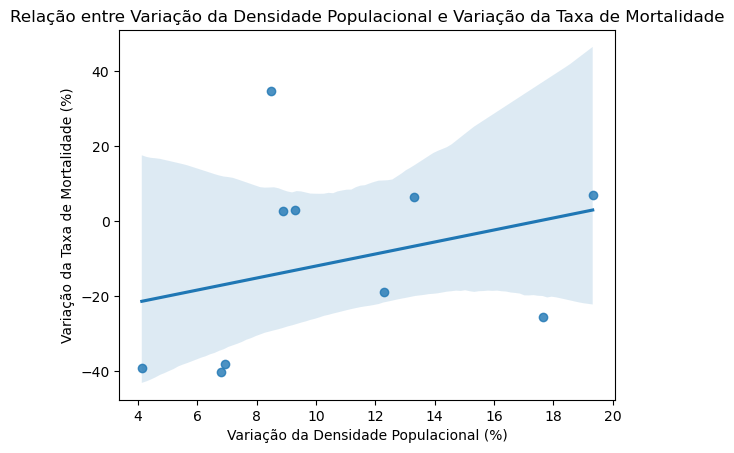

In [15]:

df_region_variations_antes_pd['periodo'] = '2007-2013'
df_region_variations_depois_pd['periodo'] = '2014-2023'


df_combined = pd.concat([df_region_variations_antes_pd, df_region_variations_depois_pd])

# Preparando os dados para a regressão
# Variável independente (X): Variação da densidade populacional
# Variável dependente (y): Variação da taxa de mortalidade
X = df_combined['mean_var_densidade_populacional']
y = df_combined['mean_var_100.000_habitantes']

# Adicionando uma constante ao modelo (intercepto)
X = sm.add_constant(X)

# Ajustando o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibindo os resultados da regressão
print(model.summary())

# Interpretação dos resultados:
# - O coeficiente da variável 'mean_var_densidade_populacional' indica a relação entre o aumento da densidade populacional e a variação na taxa de mortalidade.
# - O valor de R² indica o quanto da variação na taxa de mortalidade é explicada pela variação na densidade populacional.
# - O p-valor associado ao coeficiente indica se a relação é estatisticamente significativa (p < 0.05).



sns.regplot(x='mean_var_densidade_populacional', y='mean_var_100.000_habitantes', data=df_combined)
plt.title('Relação entre Variação da Densidade Populacional e Variação da Taxa de Mortalidade')
plt.xlabel('Variação da Densidade Populacional (%)')
plt.ylabel('Variação da Taxa de Mortalidade (%)')
plt.show()

---

# Teste de Normalidade e Escolha do Teste de Significância

Para testar a normalidade das distribuições dos grupos de controle e tratamento, realizaremos dois testes:

## Testes de Normalidade:

- **Teste de Shapiro-Wilk**: Indicado para amostras pequenas ou médias.
- **Teste de Anderson-Darling**: Mais recomendado para amostras maiores, com volume de dados considerável.

Com o resultado desses testes de normalidade, escolheremos o teste de significância adequado:

## Testes de Significância:

- **Teste T de Student**: Será utilizado caso os grupos apresentem distribuição normal. Ou seja, se a hipótese nula de normalidade **não for rejeitada**.
  
- **Teste de Mann-Whitney**: Será utilizado caso as distribuições dos grupos **não sejam normais**, conforme indicado pelos testes de Shapiro-Wilk e Anderson-Darling. Esse teste irá comparar as medianas entre os dois grupos independentes.

A escolha do teste de significância depende diretamente dos resultados dos testes de normalidade aplicados.


### Teste de Shapiro-Wilk para as distribuições dos grupos de controle e tratamento ('grupo_antes', 'grupo_depois'):

O teste de Shapiro-Wilk foi aplicado para verificar a normalidade das distribuições das métricas nos grupos de **controle** e **tratamento**. Os resultados indicaram que nenhuma das distribuições segue uma normalidade, pois todos os p-valores foram **0.0**, indicando que rejeitamos a hipótese de normalidade para ambas as distribuições. Isso sugere que as distribuições das métricas nos dois grupos não são normais e, portanto, a análise subsequente deverá considerar testes não paramétricos, como o **Teste de Mann-Whitney**.


In [18]:
# Avaliando as distribuições dos dois grupos com teste de Shapiro-Wilk
# Métricas para testar
metrics = [
    'total de acidentes',
    'total de mortes',
    'total de sobreviventes',
    'taxa de mortalidade por 100.000 habitantes',
    'taxa de mortalidade por 100.000 veículos'
]
# Testando normalidade
resultados_normalidade = {}
for metric in metrics:
    stat_antes, p_antes = shapiro(grupo_antes[metric])
    stat_depois, p_depois = shapiro(grupo_depois[metric])
    resultados_normalidade[metric] = {
        'p-valor Antes': p_antes,
        'p-valor Depois': p_depois,
        'Normal Antes': p_antes > 0.05,  # Se p > 0.05, assume-se normalidade
        'Normal Depois': p_depois > 0.05
    }

# Exibindo resultados
import pandas as pd
df_resultados_normalidade = pd.DataFrame(resultados_normalidade).T
print(df_resultados_normalidade)

                                           p-valor Antes p-valor Depois  \
total de acidentes                                   0.0            0.0   
total de mortes                                      0.0            0.0   
total de sobreviventes                               0.0            0.0   
taxa de mortalidade por 100.000 habitantes      0.023284       0.002231   
taxa de mortalidade por 100.000 veículos        0.000215       0.000019   

                                           Normal Antes Normal Depois  
total de acidentes                                False         False  
total de mortes                                   False         False  
total de sobreviventes                            False         False  
taxa de mortalidade por 100.000 habitantes        False         False  
taxa de mortalidade por 100.000 veículos          False         False  


---

### Teste de Anderson-Darling para as distribuições dos grupos de controle e tratamento ('grupo_antes', 'grupo_depois'):

O teste de Anderson-Darling foi realizado para verificar a normalidade das distribuições das métricas nos grupos de **controle** e **tratamento**. Os resultados mostraram que todas as distribuições nos dois grupos não seguem uma distribuição normal, pois todas as estatísticas indicam um desvio significativo da normalidade, indicando que rejeitamos a hipótese de normalidade para ambos os grupos.

Esses resultados reforçam a necessidade de utilizar testes não paramétricos na análise subsequente.


In [21]:
# Testando Anderson-Darling para as métricas
resultados_ad = {}

for metric in metrics:
    # Convertemos a coluna para uma lista ou array para evitar o erro com Series.mean
    ad_antes = anderson(grupo_antes[metric].to_numpy(), dist='norm')
    ad_depois = anderson(grupo_depois[metric].to_numpy(), dist='norm')
    
    # O teste de Anderson retorna a estatística e os valores críticos para diferentes níveis de significância
    ad_antes_stat = ad_antes.statistic
    crit_antes = ad_antes.critical_values[2]  # Nível de significância de 5%
    
    ad_depois_stat = ad_depois.statistic
    crit_depois = ad_depois.critical_values[2]  # Nível de significância de 5%
    
    # Verificando se a estatística é maior que o valor crítico para rejeitar a normalidade
    normal_antes = ad_antes_stat < crit_antes
    normal_depois = ad_depois_stat < crit_depois
    
    resultados_ad[metric] = {
        'Estatística Anderson Antes': ad_antes_stat,
        'Estatística Anderson Depois': ad_depois_stat,
        'Normal Antes': normal_antes,
        'Normal Depois': normal_depois
    }

# Exibindo resultados
df_resultados_ad = pd.DataFrame(resultados_ad).T
print(df_resultados_ad)

                                           Estatística Anderson Antes  \
total de acidentes                                          12.747134   
total de mortes                                              7.717574   
total de sobreviventes                                      12.622524   
taxa de mortalidade por 100.000 habitantes                    0.71433   
taxa de mortalidade por 100.000 veículos                     0.878991   

                                           Estatística Anderson Depois  \
total de acidentes                                           18.826588   
total de mortes                                               9.576589   
total de sobreviventes                                       16.651755   
taxa de mortalidade por 100.000 habitantes                    0.876856   
taxa de mortalidade por 100.000 veículos                      1.364342   

                                           Normal Antes Normal Depois  
total de acidentes                          

---

# Teste de Mann-Whitney para os Grupos de Controle e Tratamento

Como a distribuição dos dois grupos não é normal, optamos por usar o **Teste de Mann-Whitney**. Antes de realizar o teste, é importante garantir que as seguintes premissas sejam atendidas:

## Premissas para o Teste de Mann-Whitney:

1. **Independência das amostras**: Os dois grupos devem ser independentes entre si. No nosso caso, os dados são de dois períodos distintos , então essa premissa está atendida.
   
2. **Variáveis Ordinais ou Intervalares**: O teste de Mann-Whitney é adequado para comparar distribuições de dados ordinais ou intervalares. Nossas métricas (como o total de acidentes e mortes) são variáveis quantitativas, então o teste é apropriado.

3. **Distribuições não paramétricas**: O teste de Mann-Whitney não assume normalidade nas distribuições dos dados. Ele é ideal para dados com distribuições assimétricas ou desconhecidas.

4. **Tamanho das amostras**: O teste pode ser aplicado em amostras pequenas (geralmente a partir de 5 amostras por grupo), mas seu poder aumenta com amostras maiores.

5. **Homogeneidade das variâncias (opcional)**: Embora o teste de Mann-Whitney seja menos sensível à variância, é desejável verificar a homogeneidade das variâncias para uma interpretação mais robusta, **mas não é estritamente necessário** para este teste.

## Hipóteses do Teste de Mann-Whitney:
- **Hipótese nula (H0)**: As distribuições dos dois grupos são iguais.
- **Hipótese alternativa (H1)**: As distribuições dos dois grupos são diferentes.

Se o **p-valor** for **menor que 0,05**, rejeitamos a hipótese nula, indicando que as distribuições dos dois grupos são diferentes.

## Teste de Levene para Homogeneidade das Variâncias:

Antes de realizar o Teste de Mann-Whitney, vamos avaliar a homogeneidade das variâncias com o **Teste de Levene**, que verifica se as variâncias dos dois grupos são iguais, independentemente das distribuições serem normais.

### Hipóteses do Teste de Levene:
- **Hipótese nula (H0)**: As variâncias dos grupos são iguais.
- **Hipótese alternativa (H1)**: As variâncias dos grupos são diferentes.

## Interpretação do Teste de Levene:
1. Se o **p-valor** for **menor que 0,05**, rejeitamos a hipótese nula, indicando que as variâncias dos dois grupos são diferentes.
2. Se o **p-valor** for **maior que 0,05**, não rejeitamos a hipótese nula, concluindo que as variâncias dos dois grupos são semelhantes (homogêneas).

Esses testes ajudarão a definir se podemos seguir com o **Teste de Mann-Whitney** para comparar as distribuições dos dois grupos.


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Análise dos resultados do Teste de Levene:
#### Total de acidentes
- Estatística de teste: 29.5383
- p-valor: 0.0000 (< 0.05)
- Conclusão: As variâncias são diferentes (não homogêneas).

#### Total de mortes
- Estatística de teste: 7.5263
- p-valor: 0.0063 (< 0.05)
- Conclusão: As variâncias são diferentes (não homogêneas).

#### Total de sobreviventes
- Estatística de teste: 1.7289
- p-valor: 0.1892 (≥ 0.05)
- Conclusão: As variâncias são homogêneas.

#### Taxa de mortalidade por 100.000 habitantes
- Estatística de teste: 25.7507
- p-valor: 0.0000 (< 0.05)
- Conclusão: As variâncias são diferentes (não homogêneas).

#### Taxa de mortalidade por 100.000 veículos
- Estatística de teste: 102.5557
- p-valor: 0.0000 (< 0.05)
- Conclusão: As variâncias são diferentes (não homogêneas).

### Resumo final:
- As variâncias das métricas total de acidentes, total de mortes, taxa de mortalidade por 100.000 habitantes e taxa de mortalidade por 100.000 veículos são diferentes (não homogêneas).
- A variância da métrica total de sobreviventes é homogênea.

In [22]:
# Laço para aplicar o teste de Levene para cada métrica
for metrica in metrics:
    # Realizando o teste de Levene
    stat, p_value = levene(grupo_antes[metrica], grupo_depois[metrica])
    
    # Exibindo os resultados
    print(f"Teste de Levene para {metrica}:")
    print(f"Estatística de teste: {stat:.4f}")
    print(f"p-valor: {p_value:.4f}")
    print()

Teste de Levene para total de acidentes:
Estatística de teste: 29.5383
p-valor: 0.0000

Teste de Levene para total de mortes:
Estatística de teste: 7.5197
p-valor: 0.0063

Teste de Levene para total de sobreviventes:
Estatística de teste: 1.7275
p-valor: 0.1894

Teste de Levene para taxa de mortalidade por 100.000 habitantes:
Estatística de teste: 25.7082
p-valor: 0.0000

Teste de Levene para taxa de mortalidade por 100.000 veículos:
Estatística de teste: 102.2533
p-valor: 0.0000



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Análise dos Resultados do Teste de Mann-Whitney**  

Para avaliar se houve mudanças significativas nas métricas analisadas antes e depois das intervenções do Governo Federal, realizamos o **Teste de Mann-Whitney**, um teste não paramétrico indicado para comparar duas distribuições independentes quando não há garantia de normalidade dos dados.  

### **Resultados Obtidos**  

| Métrica | Estatística de Teste | p-valor | Coeficiente r | Cliff's Delta | Diferença Significativa? |
|---------|---------------------|---------|---------------|---------------|--------------------------|
| **Total de acidentes** | 32.782,0 | 2.04e-07 | 0.6424 (grande) | 0.2848 (pequeno) | ✅ Sim |
| **Total de mortes** | 29.241,5 | 0.0077 | 0.5730 (grande) | 0.1461 (negligível) | ✅ Sim |
| **Total de sobreviventes** | 28.333,5 | 0.0439 | 0.5552 (grande) | 0.1105 (negligível) | ✅ Sim |
| **Taxa de mortalidade por 100.000 habitantes** | 34.729,5 | 4.46e-11 | 0.6806 (grande) | 0.3611 (médio) | ✅ Sim |
| **Taxa de mortalidade por 100.000 veículos** | 42.690,0 | 1.16e-34 | 0.8365 (grande) | 0.6730 (grande) | ✅ Sim |

### **Interpretação**  
- Todos os **p-valores são baixos** (**< 0.05**), indicando que há **diferenças estatisticamente significativas** entre os grupos "antes" e "depois" para todas as métricas analisadas.  
- O **Coeficiente r** indica que todas as métricas têm um efeito grande, sugerindo uma diferença substancial entre os grupos.  
- O **Cliff's Delta** varia de pequeno a grande, com a taxa de mortalidade por 100.000 veículos apresentando o maior efeito (grande).  

### **Conclusão**  
Os resultados sugerem que houve **uma mudança estatisticamente relevante** nos dados após as intervenções em série. Entre as métricas analisadas, a **taxa de mortalidade por 100.000 veículos** se mostrou a mais robusta e sensível, com os valores de p-valor, coeficiente r e Cliff's Delta indicando uma diferença significativa e de grande magnitude entre os grupos.

In [16]:
import cliffs_delta
# Laço para realizar o teste de Mann-Whitney
for metrica in metrics:
    stat, p_value = mannwhitneyu(grupo_antes[metrica], grupo_depois[metrica])

    n1, n2 = len(grupo_antes[metrica]), len(grupo_depois[metrica])
    r = stat / (n1 * n2)

    delta, size = cliffs_delta.cliffs_delta(grupo_antes[metrica], grupo_depois[metrica])   

    print(f'Teste de Mann-Whitney para {metrica}:')
    print(f'Estatística de teste: {stat}')
    print(f'P-valor: {p_value}')
    print(f'Coeficiente r: {r:.4f} (interpretação: pequeno <0.3, médio 0.3-0.5, grande >0.5)')
    print(f'Cliff\'s Delta: {delta:.4f} (interpretação: {size})\n')


    

Teste de Mann-Whitney para total de acidentes:
Estatística de teste: 32782.0
P-valor: 2.0420743151115677e-07
Coeficiente r: 0.6424 (interpretação: pequeno <0.3, médio 0.3-0.5, grande >0.5)
Cliff's Delta: 0.2848 (interpretação: small)

Teste de Mann-Whitney para total de mortes:
Estatística de teste: 29241.5
P-valor: 0.007720066853059787
Coeficiente r: 0.5730 (interpretação: pequeno <0.3, médio 0.3-0.5, grande >0.5)
Cliff's Delta: 0.1461 (interpretação: negligible)

Teste de Mann-Whitney para total de sobreviventes:
Estatística de teste: 28333.5
P-valor: 0.04392162879696025
Coeficiente r: 0.5552 (interpretação: pequeno <0.3, médio 0.3-0.5, grande >0.5)
Cliff's Delta: 0.1105 (interpretação: negligible)

Teste de Mann-Whitney para taxa de mortalidade por 100.000 habitantes:
Estatística de teste: 34729.5
P-valor: 4.459897306695929e-11
Coeficiente r: 0.6806 (interpretação: pequeno <0.3, médio 0.3-0.5, grande >0.5)
Cliff's Delta: 0.3611 (interpretação: medium)

Teste de Mann-Whitney para tax

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Análise da Mortalidade por 100.000 Habitantes por Região e Tipo do Veículo
## Dados por Região Geográfica

### Período de 2007 a 2013

| Região       | Tipo de Veículo | Mortalidade Média 2007-2013 |
|--------------|-----------------|-----------------------------|
| Centro-Oeste | AUTOMÓVEL       | 3.202857                    |
| Centro-Oeste | CAMINHÃO        | 0.818214                    |
| Centro-Oeste | MOTOCICLETA     | 1.233214                    |
| Centro-Oeste | ÔNIBUS          | 0.187500                    |
| Nordeste     | AUTOMÓVEL       | 1.530476                    |
| Nordeste     | CAMINHÃO        | 0.369683                    |
| Nordeste     | MOTOCICLETA     | 1.503016                    |
| Nordeste     | ÔNIBUS          | 0.154762                    |
| Norte        | AUTOMÓVEL       | 1.826122                    |
| Norte        | CAMINHÃO        | 0.333061                    |
| Norte        | MOTOCICLETA     | 1.304898                    |
| Norte        | ÔNIBUS          | 0.194286                    |
| Sudeste      | AUTOMÓVEL       | 1.957143                    |
| Sudeste      | CAMINHÃO        | 0.603929                    |
| Sudeste      | MOTOCICLETA     | 0.799286                    |
| Sudeste      | ÔNIBUS          | 0.125714                    |
| Sul          | AUTOMÓVEL       | 2.932381                    |
| Sul          | CAMINHÃO        | 0.540952                    |
| Sul          | MOTOCICLETA     | 1.214762                    |
| Sul          | ÔNIBUS          | 0.125238                    |

### Período de 2014 a 2023

| Região       | Tipo de Veículo | Mortalidade Média 2014-2023 |
|--------------|-----------------|-----------------------------|
| Centro-Oeste | AUTOMÓVEL       | 2.269500                    |
| Centro-Oeste | CAMINHÃO        | 0.625250                    |
| Centro-Oeste | MOTOCICLETA     | 1.057250                    |
| Centro-Oeste | ÔNIBUS          | 0.091000                    |
| Nordeste     | AUTOMÓVEL       | 0.987667                    |
| Nordeste     | CAMINHÃO        | 0.215889                    |
| Nordeste     | MOTOCICLETA     | 1.343889                    |
| Nordeste     | ÔNIBUS          | 0.058556                    |
| Norte        | AUTOMÓVEL       | 1.156571                    |
| Norte        | CAMINHÃO        | 0.258000                    |
| Norte        | MOTOCICLETA     | 1.220571                    |
| Norte        | ÔNIBUS          | 0.049429                    |
| Sudeste      | AUTOMÓVEL       | 1.083250                    |
| Sudeste      | CAMINHÃO        | 0.286250                    |
| Sudeste      | MOTOCICLETA     | 0.629000                    |
| Sudeste      | ÔNIBUS          | 0.089000                    |
| Sul          | AUTOMÓVEL       | 2.283000                    |
| Sul          | CAMINHÃO        | 0.379667                    |
| Sul          | MOTOCICLETA     | 0.955667                    |
| Sul          | ÔNIBUS          | 0.064667                    |

### Variação nas Taxas de Mortalidade

| Região       | Tipo de Veículo | Variação  |
|--------------|-----------------|-----------|
| Centro-Oeste | AUTOMÓVEL       | -0.933357 |
| Centro-Oeste | CAMINHÃO        | -0.192964 |
| Centro-Oeste | MOTOCICLETA     | -0.175964 |
| Centro-Oeste | ÔNIBUS          | -0.096500 |
| Nordeste     | AUTOMÓVEL       | -0.542810 |
| Nordeste     | CAMINHÃO        | -0.153794 |
| Nordeste     | MOTOCICLETA     | -0.159127 |
| Nordeste     | ÔNIBUS          | -0.096206 |
| Norte        | AUTOMÓVEL       | -0.669551 |
| Norte        | CAMINHÃO        | -0.075061 |
| Norte        | MOTOCICLETA     | -0.084327 |
| Norte        | ÔNIBUS          | -0.144857 |
| Sudeste      | AUTOMÓVEL       | -0.873893 |
| Sudeste      | CAMINHÃO        | -0.317679 |
| Sudeste      | MOTOCICLETA     | -0.170286 |
| Sudeste      | ÔNIBUS          | -0.036714 |
| Sul          | AUTOMÓVEL       | -0.649381 |
| Sul          | CAMINHÃO        | -0.161286 |
| Sul          | MOTOCICLETA     | -0.259095 |
| Sul          | ÔNIBUS          | -0.060571 |

## Conclusão

A análise dos dados de mortalidade por 100.000 habitantes revelou variações significativas nas taxas de mortalidade entre os períodos de 2007 a 2013 e de 2014 a 2023. Essas variações foram observadas tanto por UF quanto por região geográfica, destacando a importância de políticas públicas direcionadas para a redução de acidentes e mortalidade no trânsito.

- **Centro-Oeste**: Houve uma redução significativa na taxa de mortalidade para todos os tipos de veículos, com destaque para automóveis (-0.933357) e motocicletas (-0.175964).
- **Nordeste**: A região apresentou uma redução na taxa de mortalidade para todos os tipos de veículos, com destaque para automóveis (-0.542810) e caminhões (-0.153794).
- **Norte**: A região também apresentou uma redução na taxa de mortalidade para todos os tipos de veículos, com destaque para automóveis (-0.669551) e motocicletas (-0.084327).
- **Sudeste**: Houve uma redução significativa na taxa de mortalidade para todos os tipos de veículos, com destaque para automóveis (-0.873893) e caminhões (-0.317679).
- **Sul**: A região apresentou uma redução na taxa de mortalidade para todos os tipos de veículos, com destaque para automóveis (-0.649381) e motocicletas (-0.259095).

In [17]:
# Gerando a tabela sumarizada por ano
df = df_rodovias_federais.filter(~pl.col('tipo_veiculo').is_in(["BICICLETA", "PEDESTRE"])).group_by('ano', 'uf', 'regiao', 'tipo_veiculo').agg(
    pl.col('id').n_unique().alias('total de acidentes'),
    pl.col('morreu').sum().alias('total de mortes'),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total de sobreviventes')
).sort(['ano', 'uf', 'tipo_veiculo'], descending=[False, False, False]).filter(
    (pl.col('tipo_veiculo') != pl.lit("OUTROS")) & 
    (pl.col('tipo_veiculo') != pl.lit("N.I")) & 
    (pl.col('uf') != pl.lit(""))
)

df_densidade_populacional_ano = pl.DataFrame(df_densidade_populacional_ano)

# Realizando o join com a base de densidade populacional
df_completo = df.join(
    df_densidade_populacional_ano, 
    on=['ano', 'uf'], 
    how='left',
    coalesce=True
).filter(pl.col('uf').is_not_null() & (pl.col('uf') != ""))

# Calculando a taxa de mortalidade por 100.000 habitantes
df_completo = df_completo.with_columns(
    (
        (pl.col('total de mortes') / pl.col('populacao')) * 100_000
    ).alias('taxa de mortalidade por 100.000 habitantes').round(2)
)

# Separando os dados em dois grupos: antes (2007-2013) e depois (2014-2023)
grupo_antes = df_completo.filter(pl.col('ano').is_between(2007, 2013))
grupo_depois = df_completo.filter(pl.col('ano').is_between(2014, 2023))


# Capturando a média por estado (UF) e tipo de veículo nos dois períodos
df_mortalidade_uf_antes = grupo_antes.group_by(['uf', 'tipo_veiculo']).agg([
    pl.col('taxa de mortalidade por 100.000 habitantes').mean().alias('mean_mortalidade_por_100k_habitantes')
]).sort(['uf', 'tipo_veiculo'])


df_mortalidade_uf_depois = grupo_depois.group_by(['uf', 'tipo_veiculo']).agg([
    pl.col('taxa de mortalidade por 100.000 habitantes').mean().alias('mean_mortalidade_por_100k_habitantes')
]).sort(['uf', 'tipo_veiculo'])


#df_mortalidade_uf_antes.write_excel('df_mortalidade_uf_antes.xlsx')
#df_mortalidade_uf_depois.write_excel('df_mortalidade_uf_depois.xlsx')
# Convertendo para pandas para plotar
df_mortalidade_uf_antes_pd = df_mortalidade_uf_antes.to_pandas()
df_mortalidade_uf_depois_pd = df_mortalidade_uf_depois.to_pandas()

# Plotando os dados usando Plotly Express em gráficos de barras verticais por estado (UF) para os dois períodos
fig_uf_antes = px.bar(df_mortalidade_uf_antes_pd, x='uf', y='mean_mortalidade_por_100k_habitantes', color='tipo_veiculo',
                      labels={'mean_mortalidade_por_100k_habitantes': 'Mortalidade por 100.000 Habitantes', 'tipo_veiculo': 'Tipo de Veículo'},
                      title='Mortalidade por 100.000 Habitantes por Estado (UF) e Tipo de Veículo (2007-2013)', barmode='group')

fig_uf_antes.show()

fig_uf_depois = px.bar(df_mortalidade_uf_depois_pd, x='uf', y='mean_mortalidade_por_100k_habitantes', color='tipo_veiculo',
                       labels={'mean_mortalidade_por_100k_habitantes': 'Mortalidade por 100.000 Habitantes', 'tipo_veiculo': 'Tipo de Veículo'},
                       title='Mortalidade por 100.000 Habitantes por Estado (UF) e Tipo de Veículo (2014-2023)', barmode='group')

fig_uf_depois.show()

# Capturando a média por região geográfica e tipo de veículo nos dois períodos
df_mortalidade_regiao_antes = grupo_antes.group_by(['regiao', 'tipo_veiculo']).agg([
    pl.col('taxa de mortalidade por 100.000 habitantes').mean().alias('mean_mortalidade_por_100k_habitantes')
]).sort(['regiao', 'tipo_veiculo'])

df_mortalidade_regiao_depois = grupo_depois.group_by(['regiao', 'tipo_veiculo']).agg([
    pl.col('taxa de mortalidade por 100.000 habitantes').mean().alias('mean_mortalidade_por_100k_habitantes')
]).sort(['regiao', 'tipo_veiculo'])

df_mortalidade_regiao_antes.write_excel('df_mortalidade_regiao_antes.xlsx')
df_mortalidade_regiao_depois.write_excel('df_mortalidade_regiao_depois.xlsx')
# Convertendo para pandas para plotar
df_mortalidade_regiao_antes_pd = df_mortalidade_regiao_antes.to_pandas()
df_mortalidade_regiao_depois_pd = df_mortalidade_regiao_depois.to_pandas()

# Plotando os dados usando Plotly Express em gráficos de barras verticais por região geográfica para os dois períodos
fig_regiao_antes = px.bar(df_mortalidade_regiao_antes_pd, x='regiao', y='mean_mortalidade_por_100k_habitantes', color='tipo_veiculo',
                          labels={'mean_mortalidade_por_100k_habitantes': 'Mortalidade por 100.000 Habitantes', 'tipo_veiculo': 'Tipo de Veículo'},
                          title='Mortalidade por 100.000 Habitantes por Região e Tipo de Veículo (2007-2013)', barmode='group')

fig_regiao_antes.show()

fig_regiao_depois = px.bar(df_mortalidade_regiao_depois_pd, x='regiao', y='mean_mortalidade_por_100k_habitantes', color='tipo_veiculo',
                           labels={'mean_mortalidade_por_100k_habitantes': 'Mortalidade por 100.000 Habitantes', 'tipo_veiculo': 'Tipo de Veículo'},
                           title='Mortalidade por 100.000 Habitantes por Região e Tipo de Veículo (2014-2023)', barmode='group')

fig_regiao_depois.show()

c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



---

# Análise da Mortalidade por 100.000 Veículos por Região e Tipo do Veículo

## Introdução

Esta análise tem como objetivo avaliar a taxa de mortalidade por 100.000 veículos nos estados brasileiros (UF) e nas regiões geográficas, considerando os períodos de 2007 a 2013 e de 2014 a 2023. A análise foi realizada com base em dados agregados por UF e por região, fornecendo uma visão detalhada das variações nas taxas de mortalidade ao longo do tempo.

## Dados por Região Geográfica

### Período de 2007 a 2013

Os dados de mortalidade por 100.000 veículos para o período de 2007 a 2013 foram analisados para cada região geográfica e tipo de veículo. Aqui estão os resultados:

| Região       | Tipo de Veículo | Mortalidade Média 2007-2013 |
|--------------|-----------------|-----------------------------|
| Centro-Oeste | AUTOMÓVEL       | 1.256625                    |
| Centro-Oeste | CAMINHÃO        | 3.505336                    |
| Centro-Oeste | MOTOCICLETA     | 0.905361                    |
| Centro-Oeste | ÔNIBUS          | 4.797321                    |
| Nordeste     | AUTOMÓVEL       | 1.515701                    |
| Nordeste     | CAMINHÃO        | 5.344071                    |
| Nordeste     | MOTOCICLETA     | 1.855275                    |
| Nordeste     | ÔNIBUS          | 6.678723                    |
| Norte        | AUTOMÓVEL       | 1.459606                    |
| Norte        | CAMINHÃO        | 2.683706                    |
| Norte        | MOTOCICLETA     | 0.993129                    |
| Norte        | ÔNIBUS          | 6.681078                    |
| Sudeste      | AUTOMÓVEL       | 0.744012                    |
| Sudeste      | CAMINHÃO        | 3.512371                    |
| Sudeste      | MOTOCICLETA     | 0.907698                    |
| Sudeste      | ÔNIBUS          | 2.432817                    |
| Sul          | AUTOMÓVEL       | 0.728475                    |
| Sul          | CAMINHÃO        | 1.894487                    |
| Sul          | MOTOCICLETA     | 0.941956                    |
| Sul          | ÔNIBUS          | 2.596296                    |

### Período de 2014 a 2023

Os dados de mortalidade por 100.000 veículos para o período de 2014 a 2023 foram analisados para cada região geográfica e tipo de veículo. Aqui estão os resultados:

| Região       | Tipo de Veículo | Mortalidade Média 2014-2023 |
|--------------|-----------------|-----------------------------|
| Centro-Oeste | AUTOMÓVEL       | 0.593710                    |
| Centro-Oeste | CAMINHÃO        | 1.961783                    |
| Centro-Oeste | MOTOCICLETA     | 0.516226                    |
| Centro-Oeste | ÔNIBUS          | 1.584025                    |
| Nordeste     | AUTOMÓVEL       | 0.613346                    |
| Nordeste     | CAMINHÃO        | 2.077507                    |
| Nordeste     | MOTOCICLETA     | 0.828891                    |
| Nordeste     | ÔNIBUS          | 1.509088                    |
| Norte        | AUTOMÓVEL       | 0.595864                    |
| Norte        | CAMINHÃO        | 1.497397                    |
| Norte        | MOTOCICLETA     | 0.575934                    |
| Norte        | ÔNIBUS          | 1.278070                    |
| Sudeste      | AUTOMÓVEL       | 0.290237                    |
| Sudeste      | CAMINHÃO        | 1.372063                    |
| Sudeste      | MOTOCICLETA     | 0.466378                    |
| Sudeste      | ÔNIBUS          | 1.311645                    |
| Sul          | AUTOMÓVEL       | 0.410697                    |
| Sul          | CAMINHÃO        | 1.069358                    |
| Sul          | MOTOCICLETA     | 0.577685                    |
| Sul          | ÔNIBUS          | 1.030892                    |

### Variação nas Taxas de Mortalidade

A variação nas taxas de mortalidade média por 100.000 veículos entre os dois períodos foi calculada para cada região geográfica e tipo de veículo. Aqui estão os resultados:

| Região       | Tipo de Veículo | Variação  |
|--------------|-----------------|-----------|
| Centro-Oeste | AUTOMÓVEL       | -0.662915 |
| Centro-Oeste | CAMINHÃO        | -1.543553 |
| Centro-Oeste | MOTOCICLETA     | -0.389135 |
| Centro-Oeste | ÔNIBUS          | -3.213296 |
| Nordeste     | AUTOMÓVEL       | -0.902355 |
| Nordeste     | CAMINHÃO        | -3.266564 |
| Nordeste     | MOTOCICLETA     | -1.026384 |
| Nordeste     | ÔNIBUS          | -5.169635 |
| Norte        | AUTOMÓVEL       | -0.863743 |
| Norte        | CAMINHÃO        | -1.186309 |
| Norte        | MOTOCICLETA     | -0.417194 |
| Norte        | ÔNIBUS          | -5.403008 |
| Sudeste      | AUTOMÓVEL       | -0.453775 |
| Sudeste      | CAMINHÃO        | -2.140308 |
| Sudeste      | MOTOCICLETA     | -0.441320 |
| Sudeste      | ÔNIBUS          | -1.121172 |
| Sul          | AUTOMÓVEL       | -0.317779 |
| Sul          | CAMINHÃO        | -0.825129 |
| Sul          | MOTOCICLETA     | -0.364271 |
| Sul          | ÔNIBUS          | -1.565405 |


## Conclusão

A análise dos dados de mortalidade por 100.000 veículos revelou variações significativas nas taxas de mortalidade entre os períodos de 2007 a 2013 e de 2014 a 2023. Essas variações foram observadas tanto por UF quanto por região geográfica, destacando a importância de políticas públicas direcionadas para a redução de acidentes e mortalidade no trânsito.

### Insights Acionáveis

- **Centro-Oeste**: Houve uma redução significativa na taxa de mortalidade para todos os tipos de veículos, com destaque para ônibus (-3.213296) e caminhões (-1.543553).
- **Nordeste**: A região apresentou uma redução na taxa de mortalidade para todos os tipos de veículos, com destaque para ônibus (-5.169635) e caminhões (-3.266564).
- **Norte**: A região também apresentou uma redução na taxa de mortalidade para todos os tipos de veículos, com destaque para ônibus (-5.403008) e caminhões (-1.186309).
- **Sudeste**: Houve uma redução significativa na taxa de mortalidade para todos os tipos de veículos, com destaque para ônibus (-1.121172) e caminhões (-2.140308).
- **Sul**: A região apresentou uma redução na taxa de mortalidade para todos os tipos de veículos, com destaque para ônibus (-1.565405) e caminhões (-0.825129).

In [18]:
# Gerando a tabela sumarizada por ano
df = df_rodovias_federais.filter(~pl.col('tipo_veiculo').is_in(["BICICLETA", "PEDESTRE"])).group_by('ano', 'uf', 'regiao', 'tipo_veiculo').agg(
    pl.col('id').n_unique().alias('total de acidentes'),
    pl.col('morreu').sum().alias('total de mortes'),
    (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total de sobreviventes')
    ).sort(['ano', 'uf', 'tipo_veiculo'], descending=[False, False, False]).filter((pl.col('tipo_veiculo') != pl.lit("OUTROS")) & (pl.col('tipo_veiculo') != pl.lit("N.I")) & (pl.col('uf') != pl.lit("")) )


# Agregadno os dados de frotas veiculares por ano e UF
df_frotas_agg = df_dados_frotas.group_by(['ano', 'uf', 'tipo_veiculo']).agg(
    pl.col('quantidade').sum().alias('total_veiculos')
)

# Realizando o join com a base de frotas veiculares
df_completo = df.join(
    df_frotas_agg, 
    left_on=['ano', 'uf', 'tipo_veiculo'], 
    right_on=['ano', 'uf', 'tipo_veiculo'], 
    how='left',
    coalesce=True
)

# Separando os dados em dois grupos: antes (2007-2013) e depois (2014-2023)
grupo_antes = df_completo.filter(pl.col('ano').is_between(2007, 2013))
grupo_depois = df_completo.filter(pl.col('ano').is_between(2014, 2023))

# Calculando a mortalidade por 100.000 veículos de cada tipo para cada estado nos dois períodos
df_mortalidade_antes = grupo_antes.with_columns([
    (pl.col('total de mortes') / pl.col('total_veiculos') * 100000).alias('mortalidade_por_100k_veiculos')
])

df_mortalidade_depois = grupo_depois.with_columns([
    (pl.col('total de mortes') / pl.col('total_veiculos') * 100000).alias('mortalidade_por_100k_veiculos')
])

# Capturano a média por estado (UF) e tipo de veículo nos dois períodos
df_mortalidade_uf_antes = df_mortalidade_antes.group_by(['uf', 'tipo_veiculo']).agg([
    pl.col('mortalidade_por_100k_veiculos').mean().alias('mean_mortalidade_por_100k_veiculos')
]).sort(['uf', 'tipo_veiculo'])

df_mortalidade_uf_depois = df_mortalidade_depois.group_by(['uf', 'tipo_veiculo']).agg([
    pl.col('mortalidade_por_100k_veiculos').mean().alias('mean_mortalidade_por_100k_veiculos')
]).sort(['uf', 'tipo_veiculo'])

#df_mortalidade_uf_antes.write_excel('df_mortalidade_uf_antes.xlsx')
#df_mortalidade_uf_depois.write_excel('df_mortalidade_uf_depois.xlsx')
# Convertendo para pandas para plotar
df_mortalidade_uf_antes_pd = df_mortalidade_uf_antes.to_pandas()
df_mortalidade_uf_depois_pd = df_mortalidade_uf_depois.to_pandas()

# Plotando os dados usando Plotly Express em gráficos de barras verticais por estado (UF) para os dois períodos
fig_uf_antes = px.bar(df_mortalidade_uf_antes_pd, x='uf', y='mean_mortalidade_por_100k_veiculos', color='tipo_veiculo',
                      labels={'mean_mortalidade_por_100k_veiculos': 'Mortalidade por 100.000 Veículos', 'tipo_veiculo': 'Tipo de Veículo'},
                      title='Mortalidade por 100.000 Veículos por Estado (UF) e Tipo de Veículo (2007-2013)', barmode='group')

fig_uf_antes.show()

fig_uf_depois = px.bar(df_mortalidade_uf_depois_pd, x='uf', y='mean_mortalidade_por_100k_veiculos', color='tipo_veiculo',
                       labels={'mean_mortalidade_por_100k_veiculos': 'Mortalidade por 100.000 Veículos', 'tipo_veiculo': 'Tipo de Veículo'},
                       title='Mortalidade por 100.000 Veículos por Estado (UF) e Tipo de Veículo (2014-2023)', barmode='group')

fig_uf_depois.show()

# Capturando a média por região geográfica e tipo de veículo nos dois períodos
df_mortalidade_regiao_antes = df_mortalidade_antes.group_by(['regiao', 'tipo_veiculo']).agg([
    pl.col('mortalidade_por_100k_veiculos').mean().alias('mean_mortalidade_por_100k_veiculos')
]).sort(['regiao', 'tipo_veiculo'])

df_mortalidade_regiao_depois = df_mortalidade_depois.group_by(['regiao', 'tipo_veiculo']).agg([
    pl.col('mortalidade_por_100k_veiculos').mean().alias('mean_mortalidade_por_100k_veiculos')
]).sort(['regiao', 'tipo_veiculo'])

#df_mortalidade_regiao_antes.write_excel('df_mortalidade_regiao_antes.xlsx')
#df_mortalidade_regiao_depois.write_excel('df_mortalidade_regiao_depois.xlsx')
# Convertendo para pandas para plotar
df_mortalidade_regiao_antes_pd = df_mortalidade_regiao_antes.to_pandas()
df_mortalidade_regiao_depois_pd = df_mortalidade_regiao_depois.to_pandas()

# Plotando os dados usando Plotly Express em gráficos de barras verticais por região geográfica para os dois períodos
fig_regiao_antes = px.bar(df_mortalidade_regiao_antes_pd, x='regiao', y='mean_mortalidade_por_100k_veiculos', color='tipo_veiculo',
                          labels={'mean_mortalidade_por_100k_veiculos': 'Mortalidade por 100.000 Veículos', 'tipo_veiculo': 'Tipo de Veículo'},
                          title='Mortalidade por 100.000 Veículos por Região e Tipo de Veículo (2007-2013)', barmode='group')

fig_regiao_antes.show()

fig_regiao_depois = px.bar(df_mortalidade_regiao_depois_pd, x='regiao', y='mean_mortalidade_por_100k_veiculos', color='tipo_veiculo',
                           labels={'mean_mortalidade_por_100k_veiculos': 'Mortalidade por 100.000 Veículos', 'tipo_veiculo': 'Tipo de Veículo'},
                           title='Mortalidade por 100.000 Veículos por Região e Tipo de Veículo (2014-2023)', barmode='group')

fig_regiao_depois.show()


c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\gafel\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



---

# Análise da Diferença entre Proporção de Mortes e Proporção de Acidentes

## Período de 2007 a 2013

Os estados com a maior diferença positiva entre a proporção de mortes e a proporção de acidentes são:

| UF  | Diferença Proporção |
|-------|------------------------|
| 🔴 BA  | 3.88                   |
| 🔴 MA  | 2.10                   |
| 🔴 PE  | 1.41                   |
| 🔴 PI  | 1.05                   |
| 🔴 MT  | 0.93                   |
| 🔴 GO  | 1.46                   |
| 🔴 TO  | 0.76                   |
| 🔴 CE  | 0.71                   |
| 🔴 SE  | 0.39                   |
| 🔴 RN  | 0.10                   |

## Período de 2014 a 2023

Os estados com a maior diferença positiva entre a proporção de mortes e a proporção de acidentes são:

| UF  | Diferença Proporção |
|-------|------------------------|
| 🔴 BA  | 3.86                   |
| 🔴 MA  | 2.39                   |
| 🔴 PE  | 1.52                   |
| 🔴 PA  | 1.16                   |
| 🔴 PI  | 0.97                   |
| 🔴 MT  | 0.68                   |
| 🔴 CE  | 0.85                   |
| 🔴 TO  | 0.67                   |
| 🔴 AL  | 0.65                   |
| 🔴 GO  | 0.71                   |

## Insights

- **Bahia (BA)** apresenta a maior diferença positiva em ambos os períodos, indicando uma mortalidade relativamente alta em relação ao número de acidentes.
- **Maranhão (MA)** e **Pernambuco (PE)** também apresentam diferenças significativas em ambos os períodos, sugerindo uma mortalidade elevada.
- **Piauí (PI)** e **Mato Grosso (MT)** têm diferenças menores, mas ainda assim notáveis, indicando uma mortalidade relativamente alta.
- **Pará (PA)** aparece entre os estados com maior diferença positiva no período de 2014 a 2023, enquanto não estava entre os principais no período anterior.
- **Alagoas (AL)** também aparece entre os estados com maior diferença positiva no período de 2014 a 2023.

Essas diferenças podem indicar áreas onde a mortalidade é mais alta em relação ao número de acidentes, sugerindo a necessidade de intervenções específicas para reduzir a mortalidade nesses estados.

In [19]:

ano_intervencao = 2014

# Filtrando os grupos antes e depois da intervenção
grupo_antes = df_rodovias_federais.filter(pl.col('ano') < ano_intervencao)
grupo_depois = df_rodovias_federais.filter(pl.col('ano') >= ano_intervencao)

# Função para calcular as métricas secundárias e gerar a tabela sumarizada
def calcular_resumo(df):
    total_acidentes = df.select(pl.col('id').n_unique()).item()
    total_mortes = df.select(pl.col('morreu').sum()).item()
    total_sobreviventes = df.select((pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum()).item()


    # Gerando a tabela sumarizada das informações
    df_resumo = df.group_by('uf', 'regiao').agg(
        pl.col('id').n_unique().alias('total de acidentes'),
        pl.col('morreu').sum().alias('total de mortes'),
        (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('total de sobreviventes')
    ).sort(
        'total de acidentes', descending=True
    ).with_columns(
        (pl.col('total de mortes') / (pl.col('total de mortes') + pl.col('total de sobreviventes'))).alias('taxa fatalidade (%)').round(4) *100,
        (pl.col('total de acidentes') / total_acidentes).alias('proporção dos acidentes (%)').round(4) * 100,
        (pl.col('total de mortes') / total_mortes).alias('proporção das mortes (%)').round(4) * 100,
        (pl.col('total de sobreviventes') / total_sobreviventes).alias('proporção dos sobreviventes (%)').round(4) * 100
    ).with_columns(
        (pl.col('proporção das mortes (%)') - pl.col('proporção dos sobreviventes (%)')).alias('% mortes - sobreviventes').round(2),
        (pl.col('proporção das mortes (%)') - pl.col('proporção dos acidentes (%)')).alias('% mortes - acidentes').round(2)
    )
    return df_resumo

# Calculando as tabelas resumo para ambos os grupos
resumo_antes = calcular_resumo(grupo_antes)
resumo_depois = calcular_resumo(grupo_depois)

# Salvando as tabelas resumo em arquivos Excel
#resumo_antes.drop_nulls().write_excel('resumo_antes.xlsx')
#resumo_depois.drop_nulls().write_excel('resumo_depois.xlsx')

# Convertendso para pandas e exibindo as tabelas resumo
resumo_antes_pd = resumo_antes.drop_nulls()#.to_pandas()
resumo_depois_pd = resumo_depois.drop_nulls()#.to_pandas()

print("Resumo Antes da Intervenção:")
print(resumo_antes_pd)
print("Resumo Depois da Intervenção:")
print(resumo_depois_pd)

Resumo Antes da Intervenção:
shape: (27, 11)
┌─────┬─────────┬─────────┬─────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ uf  ┆ regiao  ┆ total   ┆ total   ┆ total  ┆ taxa   ┆ propor ┆ propor ┆ propor ┆ %      ┆ %      │
│ --- ┆ ---     ┆ de acid ┆ de      ┆ de sob ┆ fatali ┆ ção    ┆ ção    ┆ ção    ┆ mortes ┆ mortes │
│ str ┆ str     ┆ entes   ┆ mortes  ┆ revive ┆ dade   ┆ dos    ┆ das    ┆ dos    ┆ - sobr ┆ - acid │
│     ┆         ┆ ---     ┆ ---     ┆ ntes   ┆ (%)    ┆ aciden ┆ mortes ┆ sobrev ┆ eviven ┆ entes  │
│     ┆         ┆ u32     ┆ i32     ┆ ---    ┆ ---    ┆ tes    ┆ (%)    ┆ ivente ┆ tes    ┆ ---    │
│     ┆         ┆         ┆         ┆ u32    ┆ f64    ┆ (%)    ┆ ---    ┆ s (%…  ┆ ---    ┆ f64    │
│     ┆         ┆         ┆         ┆        ┆        ┆ ---    ┆ f64    ┆ ---    ┆ f64    ┆        │
│     ┆         ┆         ┆         ┆        ┆        ┆ f64    ┆        ┆ f64    ┆        ┆        │
╞═════╪═════════╪═════════╪═════════╪════════╪

---

## Leitura dos dados referentes aos indicadores sociais (*Dados obtidos do site do Ipea*).

In [20]:
idhm = pl.read_excel('C:\\Users\\gafel\\OneDrive\\Documentos\\Python\\estudos\\dados_socio_economicos\\IDHM.xls')
ivs = pl.read_excel('C:\\Users\\gafel\\OneDrive\\Documentos\\Python\\estudos\\dados_socio_economicos\\IVS.xls')
media_anos_estudo_adultos = pl.read_excel('C:\\Users\\gafel\\OneDrive\\Documentos\\Python\\estudos\\dados_socio_economicos\\Média de anos de estudo - pessoas com 25 anos ou mais.xls')
populacao_pobres = pl.read_excel('C:\\Users\\gafel\\OneDrive\\Documentos\\Python\\estudos\\dados_socio_economicos\\Pobres  Atlas DH - Pnad ContínuaA.xls')
renda_per_capita = pl.read_excel('C:\\Users\\gafel\\OneDrive\\Documentos\\Python\\estudos\\dados_socio_economicos\\Renda per capita   Atlas DH - Pnad ContínuaA.xls')

# Convertendo os dados para formato longo (long format)
def transformar_long(df, nome_variavel):
    return (
        df.melt(id_vars=["Sigla", "Codigo", "Estado"], variable_name="ano", value_name=nome_variavel)
        .with_columns(pl.col("ano").cast(pl.Int64))  # Garantir que "ano" seja inteiro
    )

idhm_longo = transformar_long(idhm, "IDHM")
ivs_longo = transformar_long(ivs, "IVS")
media_anos_estudo_adultos_longo = transformar_long(media_anos_estudo_adultos, "MediaAnosEstudo")
populacao_pobres_longo = transformar_long(populacao_pobres, "PopulacaoPobres")
renda_per_capita_longo = transformar_long(renda_per_capita, "RendaPerCapita")

# Crianod DataFrame unificado de dados socioeconômicos
dados_socioeconomicos = (
    idhm_longo.join(ivs_longo, on=["Sigla", "Codigo", "Estado", "ano"], how="left")
    .join(media_anos_estudo_adultos_longo, on=["Sigla", "Codigo", "Estado", "ano"], how="left")
    .join(populacao_pobres_longo, on=["Sigla", "Codigo", "Estado", "ano"], how="left")
    .join(renda_per_capita_longo, on=["Sigla", "Codigo", "Estado", "ano"], how="left")
)

# Processando dados de mortes por ano e estado
mortes_ano_estado = (
    df_rodovias_federais
    .filter(pl.col('uf').is_not_null())
    .group_by(["ano", "uf"])
    .agg(
        pl.col("id").n_unique().alias("num_acidentes"),
        pl.col("morreu").sum().alias("num_mortes"),
        (pl.col('estado_fisico') == pl.lit('SOBREVIVENTE')).sum().alias('num_sobreviventes'),
    )
    .with_columns(
        (pl.col("num_mortes") / pl.col("num_acidentes")).alias("taxa_mortalidade"),
        (pl.col("num_mortes") / (pl.col("num_mortes") + pl.col("num_sobreviventes"))).alias("taxa_fatalidade"),
    )
    .sort(["uf", "ano"])
)

# Ajustando nome da coluna "uf" para "Sigla" e garantir tipo de "ano"
mortes_ano_estado = mortes_ano_estado.rename({"uf": "Sigla"}).with_columns(pl.col("ano").cast(pl.Int64))

# Join dos dados socioeconômicos com dados de mortes
dados_finais = dados_socioeconomicos.join(
    mortes_ano_estado,
    on=["Sigla", "ano"],
    how="left"
).drop('Codigo').sort('Sigla', 'ano')

dados_finais.write_excel('dados_finais.xlsx')

dados_finais.head()

C:\Users\gafel\AppData\Local\Temp\ipykernel_5104\3658998423.py:22: DeprecationWarning:

The default coalesce behavior of left join will change to `False` in the next breaking release. Pass `coalesce=True` to keep the current behavior and silence this warning.

C:\Users\gafel\AppData\Local\Temp\ipykernel_5104\3658998423.py:23: DeprecationWarning:

The default coalesce behavior of left join will change to `False` in the next breaking release. Pass `coalesce=True` to keep the current behavior and silence this warning.

C:\Users\gafel\AppData\Local\Temp\ipykernel_5104\3658998423.py:24: DeprecationWarning:

The default coalesce behavior of left join will change to `False` in the next breaking release. Pass `coalesce=True` to keep the current behavior and silence this warning.

C:\Users\gafel\AppData\Local\Temp\ipykernel_5104\3658998423.py:25: DeprecationWarning:

The default coalesce behavior of left join will change to `False` in the next breaking release. Pass `coalesce=True` to keep the 

shape: (5, 13)
┌─────┬─────┬─────┬───────┬───────┬────────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│ Sig ┆ Est ┆ ano ┆ IDHM  ┆ IVS   ┆ MediaA ┆ Popul ┆ Renda ┆ num_a ┆ num_m ┆ num_s ┆ taxa_ ┆ taxa_ │
│ la  ┆ ado ┆ --- ┆ ---   ┆ ---   ┆ nosEst ┆ acaoP ┆ PerCa ┆ ciden ┆ ortes ┆ obrev ┆ morta ┆ fatal │
│ --- ┆ --- ┆ i64 ┆ f64   ┆ f64   ┆ udo    ┆ obres ┆ pita  ┆ tes   ┆ ---   ┆ ivent ┆ lidad ┆ idade │
│ str ┆ str ┆     ┆       ┆       ┆ ---    ┆ ---   ┆ ---   ┆ ---   ┆ i32   ┆ es    ┆ e     ┆ ---   │
│     ┆     ┆     ┆       ┆       ┆ f64    ┆ f64   ┆ f64   ┆ u32   ┆       ┆ ---   ┆ ---   ┆ f64   │
│     ┆     ┆     ┆       ┆       ┆        ┆       ┆       ┆       ┆       ┆ u32   ┆ f64   ┆       │
╞═════╪═════╪═════╪═══════╪═══════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ AC  ┆ Acr ┆ 201 ┆ 0.701 ┆ 0.356 ┆ 7.72   ┆ 23.77 ┆ 516.7 ┆ 503   ┆ 21    ┆ 501   ┆ 0.041 ┆ 0.040 │
│     ┆ e   ┆ 2   ┆       ┆       ┆        ┆       ┆ 5     ┆       ┆       ┆       ┆ 75    ┆ 23    │
│ AC  ┆ Acr ┆ 201 ┆ 0.706 ┆ 0.292 ┆ 7.61   ┆ 21.65 ┆ 517.6 ┆ 448   ┆ 23    ┆ 352   ┆ 0.051 ┆ 0.061 │
│     ┆ e   ┆ 3   ┆       ┆       ┆        ┆       ┆ 4     ┆       ┆       ┆       ┆ 339   ┆ 333   │
│ AC  ┆ Acr ┆ 201 ┆ 0.715 ┆ 0.361 ┆ 7.78   ┆ 19.87 ┆ 514.5 ┆ 457   ┆ 32    ┆ 396   ┆ 0.070 ┆ 0.074 │
│     ┆ e   ┆ 4   ┆       ┆       ┆        ┆       ┆ 9     ┆       ┆       ┆       ┆ 022   ┆ 766   │
│ AC  ┆ Acr ┆ 201 ┆ 0.718 ┆ 0.354 ┆ 7.95   ┆ 20.72 ┆ 531.3 ┆ 468   ┆ 20    ┆ 427   ┆ 0.042 ┆ 0.044 │
│     ┆ e   ┆ 5   ┆       ┆       ┆        ┆       ┆ 5     ┆       ┆       ┆       ┆ 735   ┆ 743   │
│ AC  ┆ Acr ┆ 201 ┆ 0.723 ┆ 0.341 ┆ 7.98   ┆ 25.42 ┆ 485.7 ┆ 330   ┆ 23    ┆ 346   ┆ 0.069 ┆ 0.062 │
│     ┆ e   ┆ 6   ┆       ┆       ┆        ┆       ┆ 1     ┆       ┆       ┆       ┆ 697   ┆ 331   │
└─────┴─────┴─────┴───────┴───────┴────────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┘

---

# Teste de Hipótese de Normalidade das Métricas

Para verificar se as métricas seguem uma distribuição normal, foram realizados três testes de normalidade: **Shapiro-Wilk**, **Kolmogorov-Smirnov** e **Anderson-Darling**. Abaixo estão os resultados para cada métrica:

## IDHM (Índice de Desenvolvimento Humano Municipal)
- **Shapiro-Wilk p-valor**: 2.4081071387627162e-05
- **Kolmogorov-Smirnov p-valor**: 0.07407485514047163
- **Anderson-Darling Estatística**: 2.3340207089997875

Os p-valores do teste Shapiro-Wilk e Anderson-Darling indicam que a hipótese nula de normalidade pode ser rejeitada, sugerindo que a distribuição do IDHM não é normal. O p-valor do teste Kolmogorov-Smirnov é maior que 0.05, o que não rejeita a normalidade, mas os outros testes indicam o contrário.

## IVS (Índice de Vulnerabilidade Social)
- **Shapiro-Wilk p-valor**: 0.03227105364203453
- **Kolmogorov-Smirnov p-valor**: 0.39882067546949507
- **Anderson-Darling Estatística**: 0.708162899651029

O p-valor do teste Shapiro-Wilk é menor que 0.05, indicando que a distribuição do IVS não é normal. No entanto, os p-valores dos testes Kolmogorov-Smirnov e Anderson-Darling não rejeitam a hipótese de normalidade.

## Média de Anos de Estudo
- **Shapiro-Wilk p-valor**: 0.019931094720959663
- **Kolmogorov-Smirnov p-valor**: 0.3010112667126077
- **Anderson-Darling Estatística**: 0.7064183101348931

Os p-valores do teste Shapiro-Wilk indicam que a distribuição da média de anos de estudo não é normal. Os outros testes não rejeitam a hipótese de normalidade.

## População de Pobres
- **Shapiro-Wilk p-valor**: 3.7040707415343654e-13
- **Kolmogorov-Smirnov p-valor**: 9.040162331130913e-08
- **Anderson-Darling Estatística**: 11.729204590380789

Todos os testes indicam que a distribuição da população de pobres não é normal, com p-valores extremamente baixos.

## Renda Per Capita
- **Shapiro-Wilk p-valor**: 1.2882035992054799e-15
- **Kolmogorov-Smirnov p-valor**: 1.2942433368665492e-08
- **Anderson-Darling Estatística**: 11.077359715564398

Assim como a população de pobres, todos os testes indicam que a distribuição da renda per capita não é normal.

## Taxa de Mortalidade
- **Shapiro-Wilk p-valor**: 6.837113340762979e-12
- **Kolmogorov-Smirnov p-valor**: 0.006470967923322569
- **Anderson-Darling Estatística**: 5.819652758208349

Os p-valores dos três testes indicam que a distribuição da taxa de mortalidade não é normal.

## Taxa de Fatalidade
- **Shapiro-Wilk p-valor**: 5.7884950166453564e-08
- **Kolmogorov-Smirnov p-valor**: 0.01861012048597785
- **Anderson-Darling Estatística**: 3.3306100721435996

Os p-valores dos três testes indicam que a distribuição da taxa de fatalidade não é normal.

Em resumo, a maioria das métricas não segue uma distribuição normal, conforme indicado pelos p-valores dos testes de Shapiro-Wilk, Kolmogorov-Smirnov e Anderson-Darling. É importante considerar esses resultados ao realizar análises estatísticas subsequentes.

{'Métrica': 'IDHM', 'Média': 0.7409413580246913, 'Mediana': 0.73525, 'Desvio Padrão': 0.04574195308285677, 'Variância': 0.00209232627183427, 'Assimetria': 0.3711067410247494, 'Curtose': -0.6228169876294274}
{'Métrica': 'IVS', 'Média': 0.2595833333333334, 'Mediana': 0.26, 'Desvio Padrão': 0.057366961452162246, 'Variância': 0.0032909682662538692, 'Assimetria': -0.12000873121542396, 'Curtose': -0.3726859644770739}
{'Métrica': 'MediaAnosEstudo', 'Média': 8.853111111111112, 'Mediana': 8.83, 'Desvio Padrão': 1.08184940838125, 'Variância': 1.1703981424148606, 'Assimetria': 0.2708943823565024, 'Curtose': -0.29904973114408273}
{'Métrica': 'PopulacaoPobres', 'Média': 13.661333333333333, 'Mediana': 13.415, 'Desvio Padrão': 8.13589443782339, 'Variância': 66.19277830340558, 'Assimetria': 0.15570138488886726, 'Curtose': -1.3954893358940965}
{'Métrica': 'RendaPerCapita', 'Média': 680.9335925925926, 'Mediana': 581.91, 'Desvio Padrão': 246.1702628932201, 'Variância': 60599.7983329171, 'Assimetria': 1.3

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



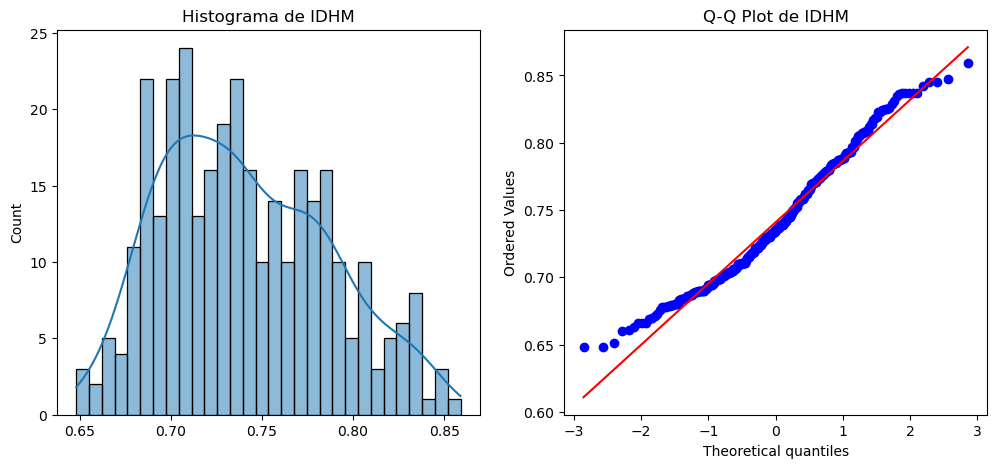

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



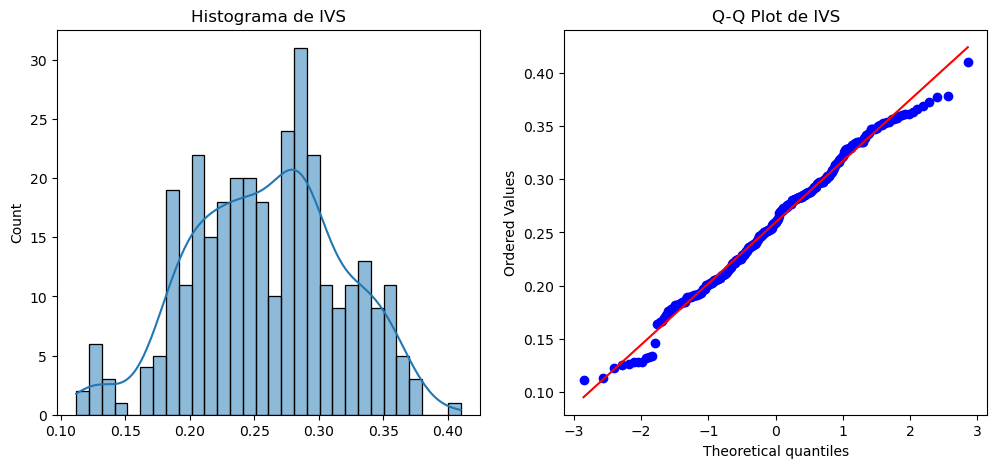

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



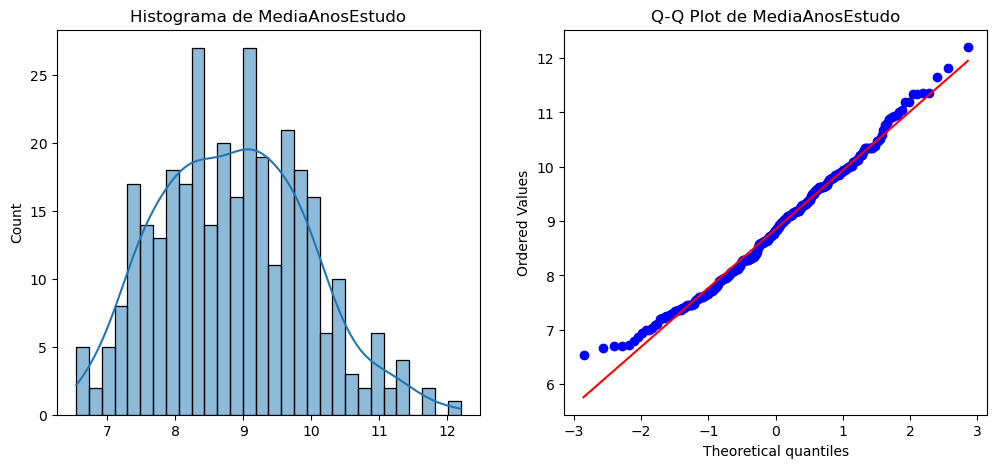

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



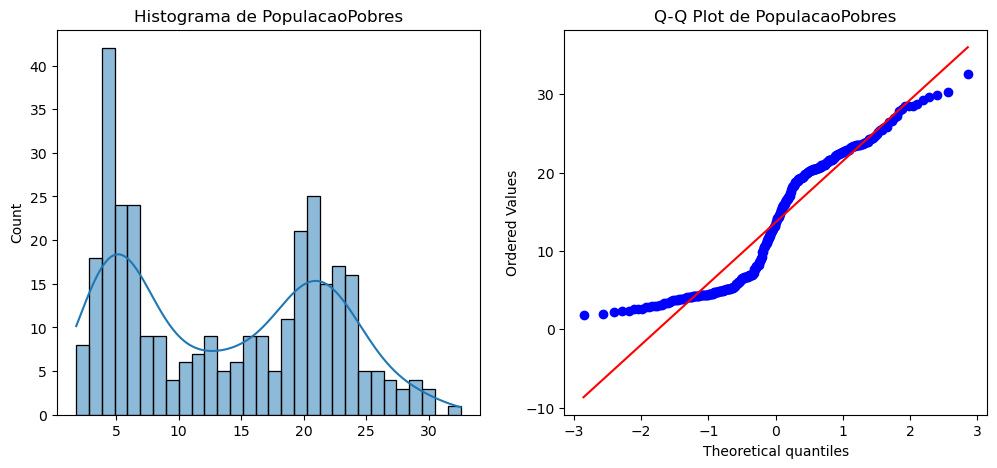

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



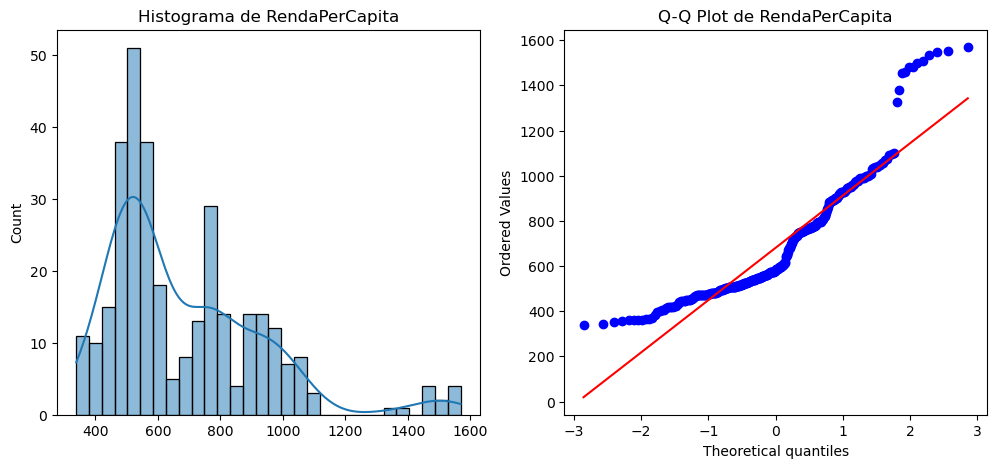

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



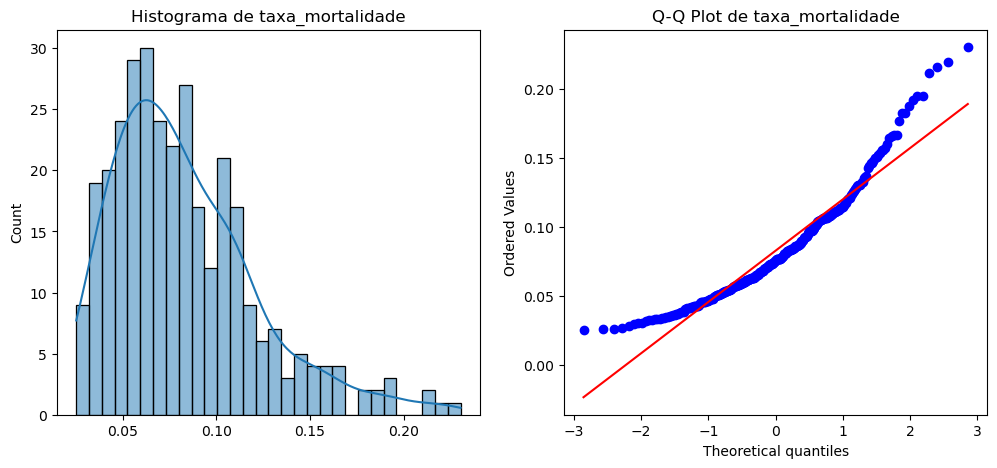

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



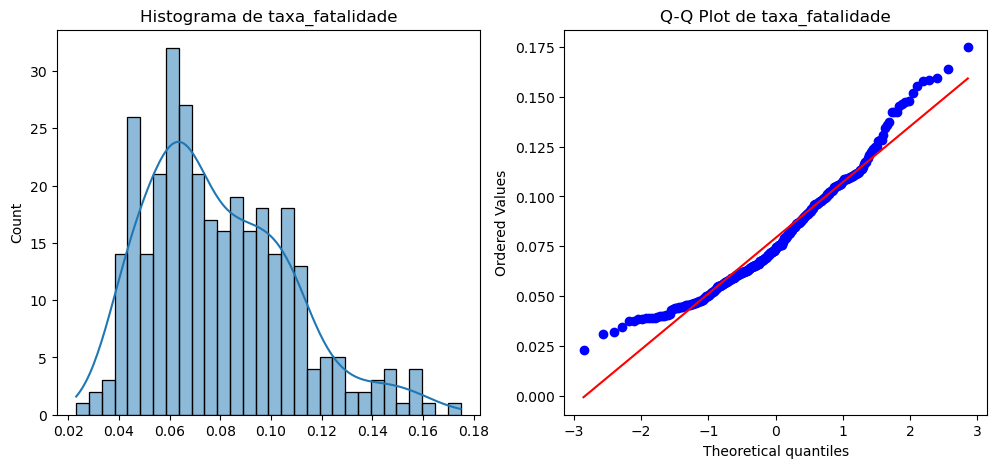

{'Métrica': 'IDHM', 'Shapiro-Wilk p-valor': 2.4081071387627162e-05, 'Kolmogorov-Smirnov p-valor': 0.07407485514047163, 'Anderson-Darling Estatística': 2.3340207089997875}
{'Métrica': 'IVS', 'Shapiro-Wilk p-valor': 0.03227105364203453, 'Kolmogorov-Smirnov p-valor': 0.39882067546949507, 'Anderson-Darling Estatística': 0.708162899651029}
{'Métrica': 'MediaAnosEstudo', 'Shapiro-Wilk p-valor': 0.019931094720959663, 'Kolmogorov-Smirnov p-valor': 0.3010112667126077, 'Anderson-Darling Estatística': 0.7064183101348931}
{'Métrica': 'PopulacaoPobres', 'Shapiro-Wilk p-valor': 3.7040707415343654e-13, 'Kolmogorov-Smirnov p-valor': 9.040162331130913e-08, 'Anderson-Darling Estatística': 11.729204590380789}
{'Métrica': 'RendaPerCapita', 'Shapiro-Wilk p-valor': 1.2882035992054799e-15, 'Kolmogorov-Smirnov p-valor': 1.2942433368665492e-08, 'Anderson-Darling Estatística': 11.077359715564398}
{'Métrica': 'taxa_mortalidade', 'Shapiro-Wilk p-valor': 6.837113340762979e-12, 'Kolmogorov-Smirnov p-valor': 0.00647

In [ ]:
from scipy.stats import shapiro, ks_1samp, anderson, norm, probplot

df = dados_finais

# Selecionando as métricas de interesse
metricas = ["IDHM", "IVS", "MediaAnosEstudo", "PopulacaoPobres", "RendaPerCapita", "taxa_mortalidade", "taxa_fatalidade"]

# Função para calcular estatísticas descritivas
def calcular_estatisticas(df, colunas):
    estatisticas = []
    for col in colunas:
        serie = df[col].drop_nulls().to_numpy()
        estatisticas.append({
            "Métrica": col,
            "Média": np.mean(serie),
            "Mediana": np.median(serie),
            "Desvio Padrão": np.std(serie, ddof=1),
            "Variância": np.var(serie, ddof=1),
            "Assimetria": pl.Series(serie).skew(),
            "Curtose": pl.Series(serie).kurtosis()
        })
    return estatisticas

# Calculanod estatísticas descritivas
estatisticas = calcular_estatisticas(dados_finais, metricas)
for estatistica in estatisticas:
    print(estatistica)

# Função para plotar distribuições (Histograma + Q-Q Plot)
def plotar_distribuicoes(df, colunas):
    for col in colunas:
        serie = df[col].drop_nulls().to_numpy()

        plt.figure(figsize=(12, 5))

        # Histograma
        plt.subplot(1, 2, 1)
        sns.histplot(serie, kde=True, bins=30)
        plt.title(f'Histograma de {col}')

        # Q-Q Plot correto
        plt.subplot(1, 2, 2)
        probplot(serie, dist="norm", plot=plt)
        plt.title(f'Q-Q Plot de {col}')         

        plt.show()

plotar_distribuicoes(dados_finais, metricas)

# Função para testar normalidade
def testar_normalidade(df, colunas):
    resultados = []
    for col in colunas:
        serie = df[col].drop_nulls().to_numpy()
        
        # Teste de Shapiro-Wilk
        shapiro_test = shapiro(serie)
        
        # Teste de Kolmogorov-Smirnov
        ks_test = ks_1samp(serie, norm.cdf, args=(np.mean(serie), np.std(serie, ddof=1)))

        # Teste de Anderson-Darling
        anderson_test = anderson(serie)

        resultados.append({
            "Métrica": col,
            "Shapiro-Wilk p-valor": shapiro_test.pvalue,
            "Kolmogorov-Smirnov p-valor": ks_test.pvalue,
            "Anderson-Darling Estatística": anderson_test.statistic
        })

    return resultados

# Executando os testes de normalidade
resultados_normalidade = testar_normalidade(dados_finais, metricas)
for resultado in resultados_normalidade:
    print(resultado)

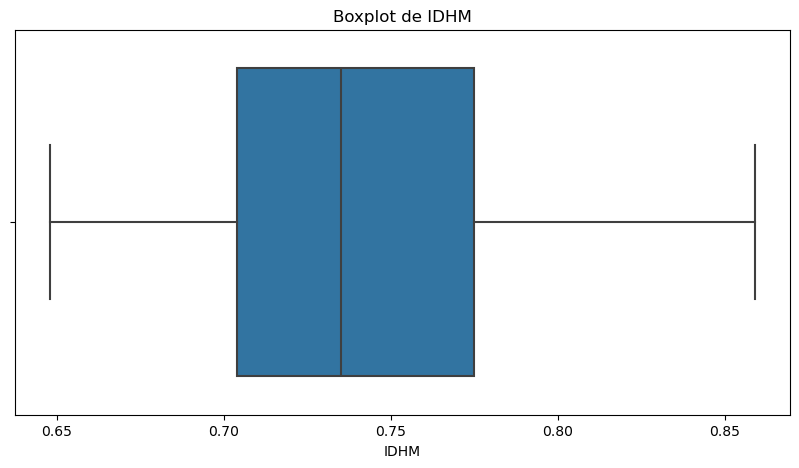

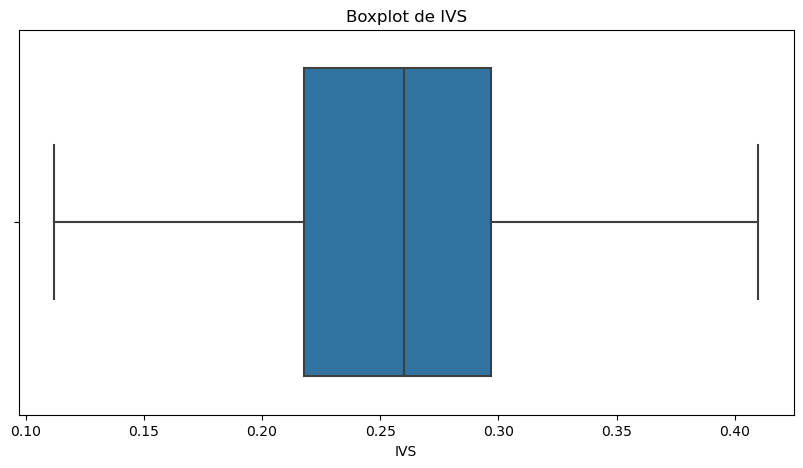

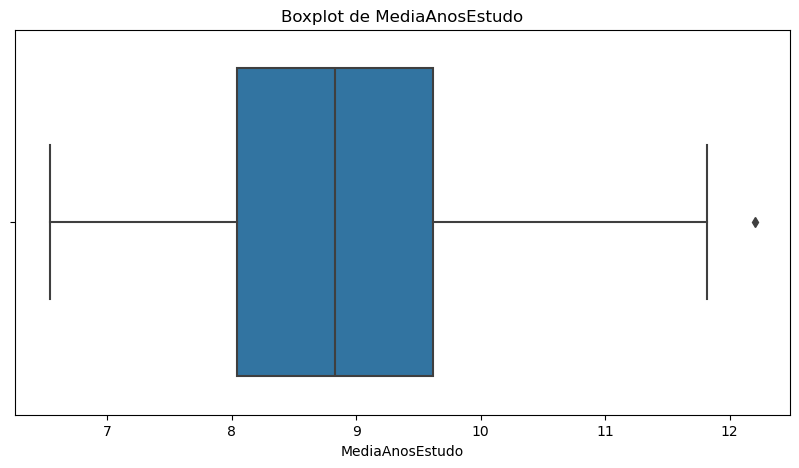

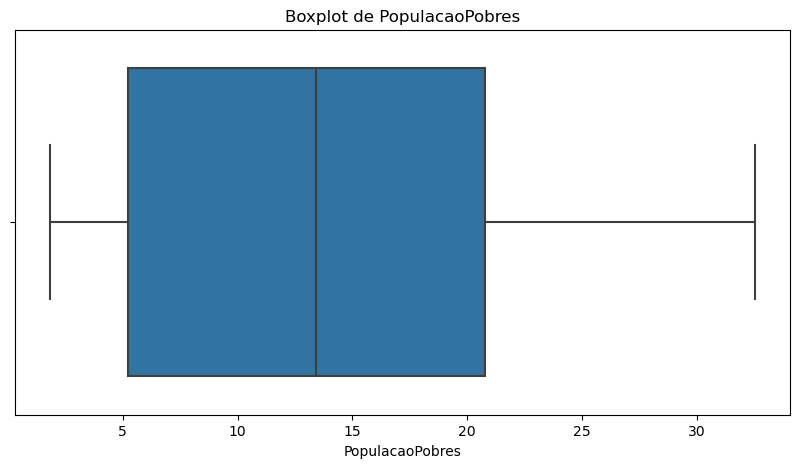

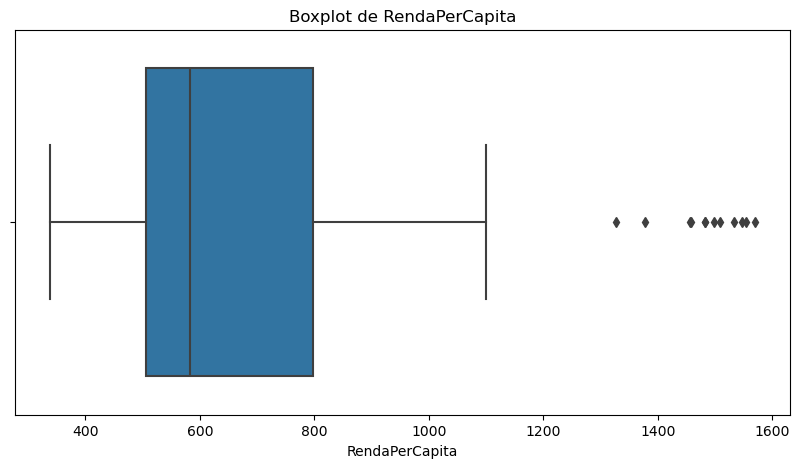

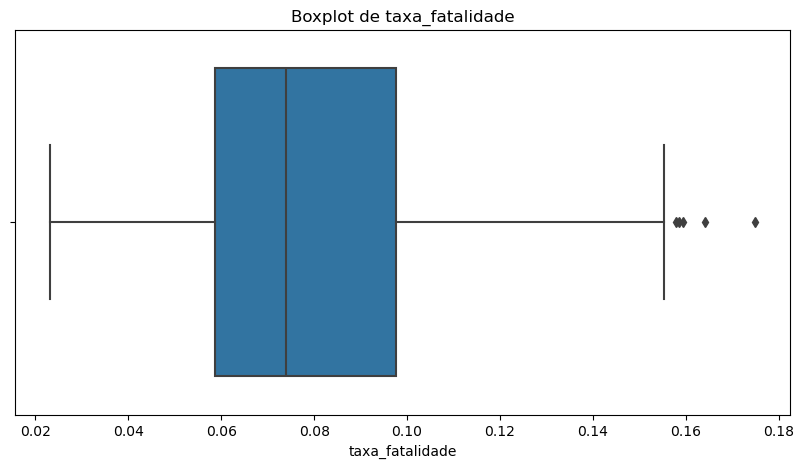

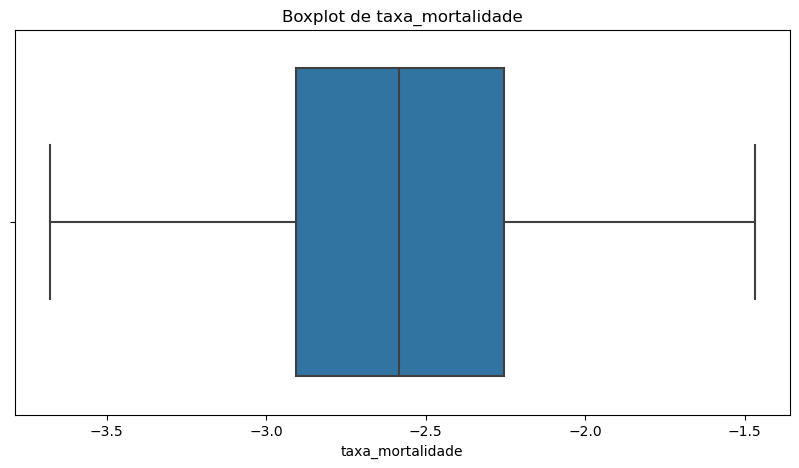

In [ ]:
# Lista de variáveis para verificar outliers
variaveis = ['IDHM', 'IVS', 'MediaAnosEstudo', 'PopulacaoPobres', 'RendaPerCapita', 'taxa_fatalidade', 'taxa_mortalidade']

# Função para visualizar outliers usando boxplots
def visualizar_outliers(df, variaveis):
    for var in variaveis:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[var])
        plt.title(f'Boxplot de {var}')
        plt.xlabel(var)
        plt.show()

visualizar_outliers(df, variaveis)

# Análise de Correlação entre Indicadores Sociais e Taxas de Mortalidade e Fatalidade

Para garantir uma análise mais confiável, avaliamos a correlação entre os indicadores sociais e as taxas de fatalidade (total de óbitos / (total de óbitos + total de sobreviventes)) e mortalidade (total de óbitos / total de acidentes). Como nenhuma das variáveis apresentou distribuição normal nos testes estatísticos (Shapiro-Wilk, Kolmogorov-Smirnov e Anderson-Darling), optamos pela correlação de Spearman, que é mais adequada para dados não paramétricos.

## Resultados da Análise de Correlação

### Taxa de Mortalidade
- **IDHM**: Coeficiente = -0.495715, p-valor = 1.697893e-21
- **IVS**: Coeficiente = 0.415800, p-valor = 5.627921e-15
- **Média de Anos de Estudo**: Coeficiente = -0.289530, p-valor = 1.123919e-07
- **População de Pobres**: Coeficiente = 0.615251, p-valor = 3.951097e-35

### Taxa de Fatalidade
- **IDHM**: Coeficiente = -0.646277, p-valor = 1.064446e-39
- **IVS**: Coeficiente = 0.517369, p-valor = 1.406147e-23
- **Média de Anos de Estudo**: Coeficiente = -0.550011, p-valor = 5.171659e-27
- **População de Pobres**: Coeficiente = 0.584024, p-valor = 5.133120e-31

Os resultados indicam que há correlações significativas entre os indicadores sociais e as taxas de mortalidade e fatalidade. Em particular, o IDHM e a Média de Anos de Estudo apresentam correlações negativas com ambas as taxas, sugerindo que melhores condições sociais estão associadas a menores taxas de mortalidade e fatalidade. Por outro lado, o IVS e a População de Pobres apresentam correlações positivas, indicando que maiores vulnerabilidades sociais estão associadas a maiores taxas de mortalidade e fatalidade.

Esses achados são importantes para direcionar políticas públicas e intervenções sociais visando a redução das taxas de mortalidade e fatalidade.

In [ ]:


df = dados_finais

# Variáveis explicativas e dependentes
variaveis_explicativas = ['IDHM', 'IVS', 'MediaAnosEstudo', 'PopulacaoPobres']
variaveis_dependentes = ['taxa_mortalidade', 'taxa_fatalidade']

# Calcular a correlação de Spearman
resultados = []

for dep in variaveis_dependentes:
    for exp in variaveis_explicativas:
        coef, p_valor = spearmanr(df[exp], df[dep])
        resultados.append({
            'Métrica': exp,
            'Variável Dependente': dep,
            'Coeficiente': coef,
            'p-valor': p_valor
        })

# Criar DataFrame com os resultados
resultado_df = pd.DataFrame(resultados)

# Exibindo os resultados
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', None)        # Ajuste a largura da tabela
print(resultado_df)

           Métrica Variável Dependente  Coeficiente       p-valor
0             IDHM    taxa_mortalidade    -0.495715  1.697893e-21
1              IVS    taxa_mortalidade     0.415800  5.627921e-15
2  MediaAnosEstudo    taxa_mortalidade    -0.289530  1.123919e-07
3  PopulacaoPobres    taxa_mortalidade     0.615251  3.951097e-35
4             IDHM     taxa_fatalidade    -0.646277  1.064446e-39
5              IVS     taxa_fatalidade     0.517369  1.406147e-23
6  MediaAnosEstudo     taxa_fatalidade    -0.550011  5.171659e-27
7  PopulacaoPobres     taxa_fatalidade     0.584024  5.133120e-31


In [25]:
df_indices = dados_finais.to_pandas()

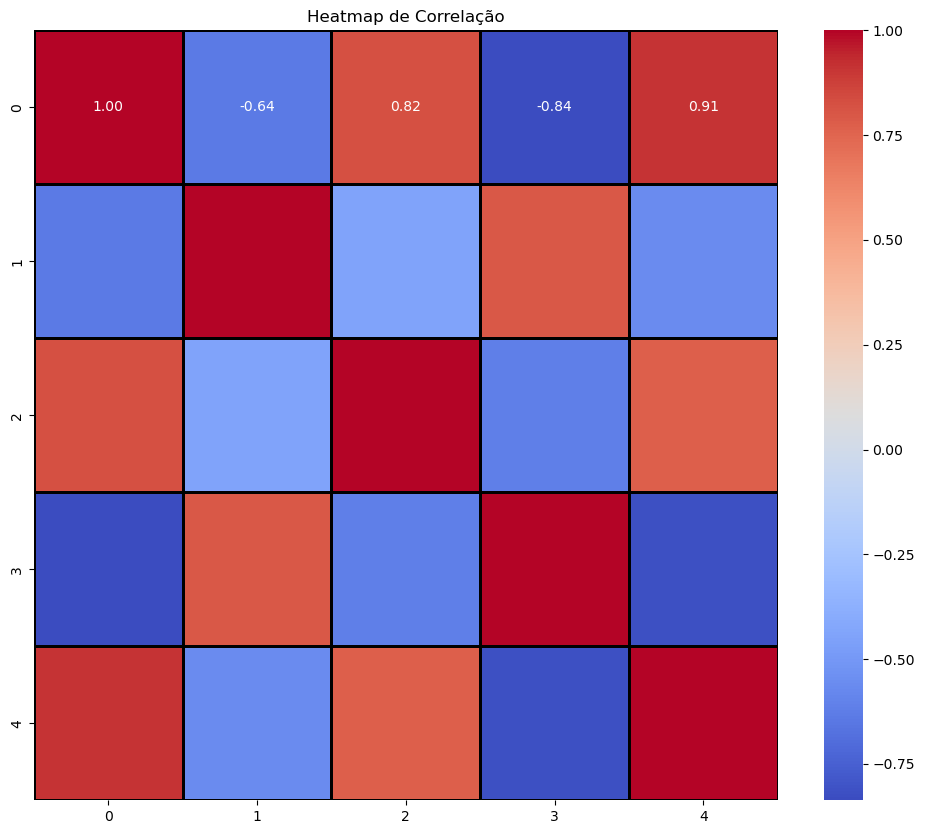

shape: (5, 5)
┌───────────┬───────────┬─────────────────┬─────────────────┬────────────────┐
│ IDHM      ┆ IVS       ┆ MediaAnosEstudo ┆ PopulacaoPobres ┆ RendaPerCapita │
│ ---       ┆ ---       ┆ ---             ┆ ---             ┆ ---            │
│ f64       ┆ f64       ┆ f64             ┆ f64             ┆ f64            │
╞═══════════╪═══════════╪═════════════════╪═════════════════╪════════════════╡
│ 1.0       ┆ -0.642661 ┆ 0.823152        ┆ -0.836709       ┆ 0.908646       │
│ -0.642661 ┆ 1.0       ┆ -0.449215       ┆ 0.793601        ┆ -0.556989      │
│ 0.823152  ┆ -0.449215 ┆ 1.0             ┆ -0.621045       ┆ 0.773817       │
│ -0.836709 ┆ 0.793601  ┆ -0.621045       ┆ 1.0             ┆ -0.819858      │
│ 0.908646  ┆ -0.556989 ┆ 0.773817        ┆ -0.819858       ┆ 1.0            │
└───────────┴───────────┴─────────────────┴─────────────────┴────────────────┘

In [41]:
# Calculando a matriz de correlação
correlation_matrix = df[['IDHM', 'IVS',	'MediaAnosEstudo',	'PopulacaoPobres',	'RendaPerCapita']].corr()



# Plotando o heatmap
plt.figure(figsize=(12,10))
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      cmap='coolwarm',
                      fmt='.2f',
                      linewidths=2,
                      linecolor='black')

# Ajustando o layout para melhor visualização
plt.title('Heatmap de Correlação')
plt.show()
correlation_matrix.head()

Ao avaliar o comportamento entre as variáveis explicativas e as taxas de mortalidade, é possível observar claramente a presença de correlações significativas. Por exemplo, Estados com maior IDHM e maior Média de Anos de Estudo da População Adulta tendem a apresentar menores taxas de mortalidade. Em contraste, Estados com maior IVS e maior População de Pobres tendem a apresentar maiores taxas de mortalidade. Esses resultados destacam a importância dos indicadores sociais na determinação das condições de saúde da população.

Visualizando a relação entre as variáveis explicativas (indicadores sociais) e a taxa de mortalidade.

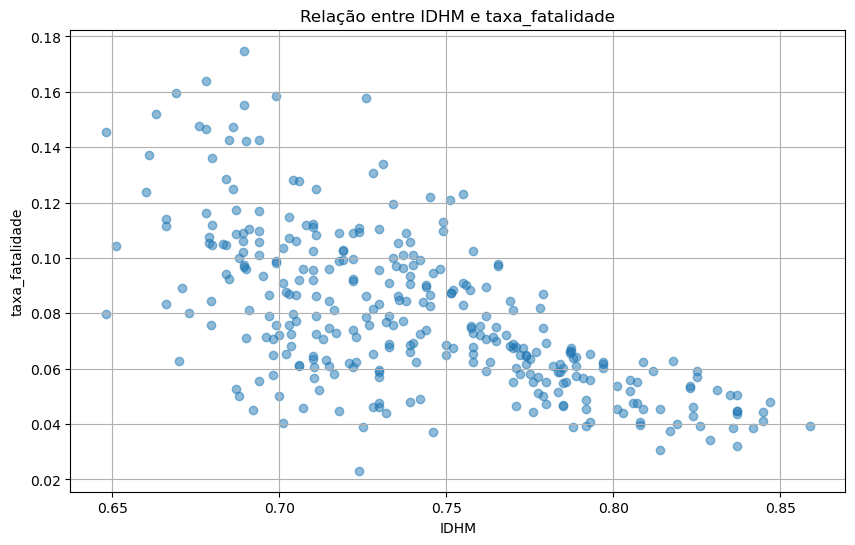

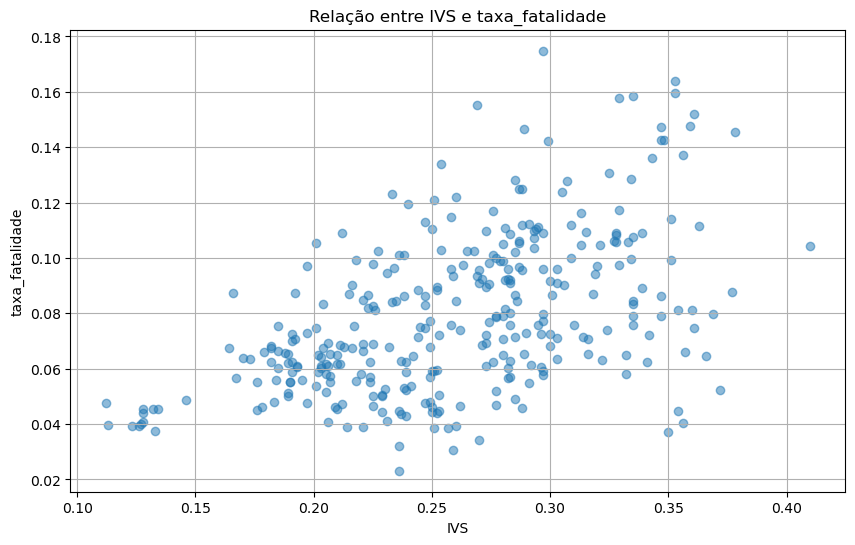

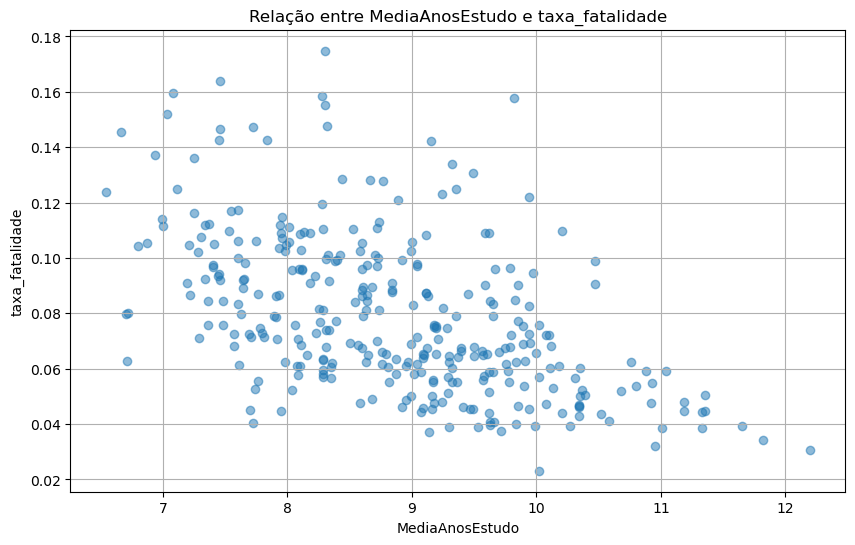

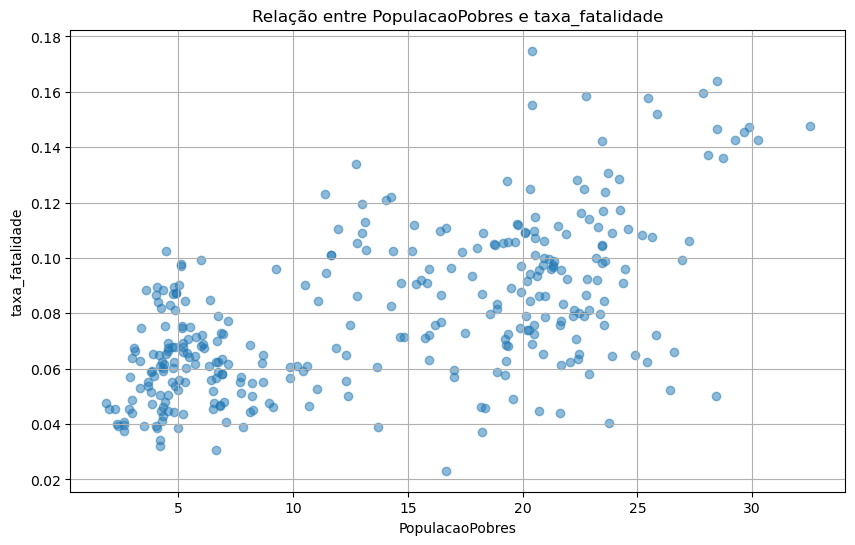

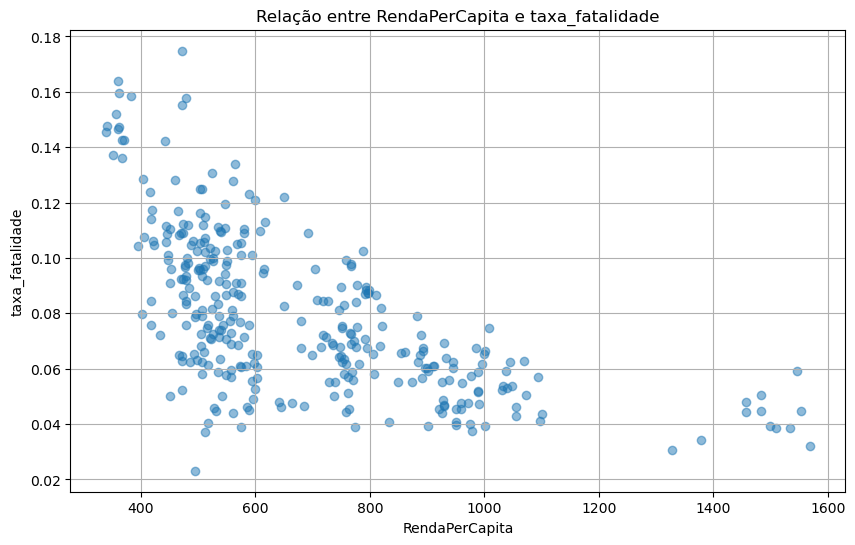

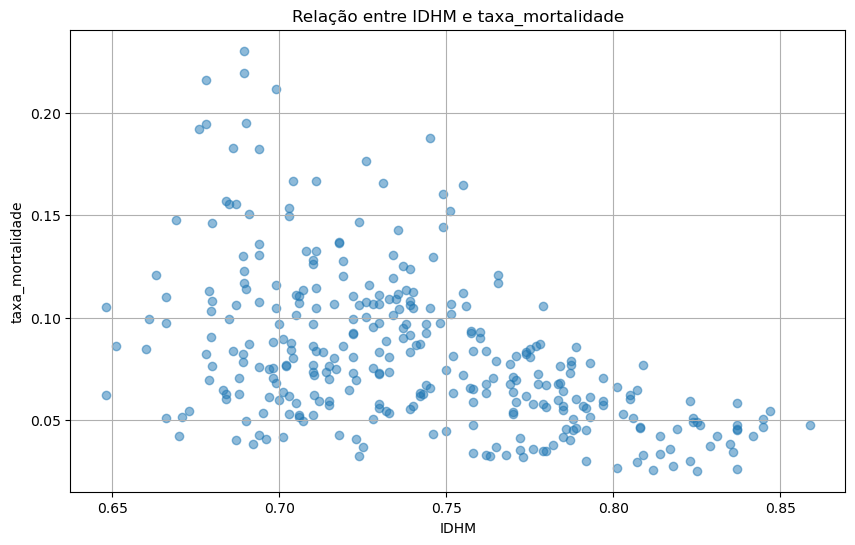

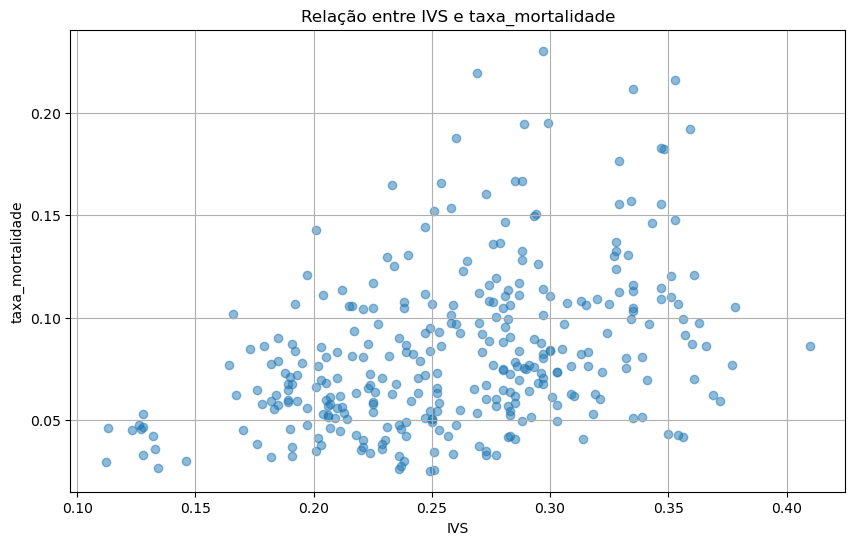

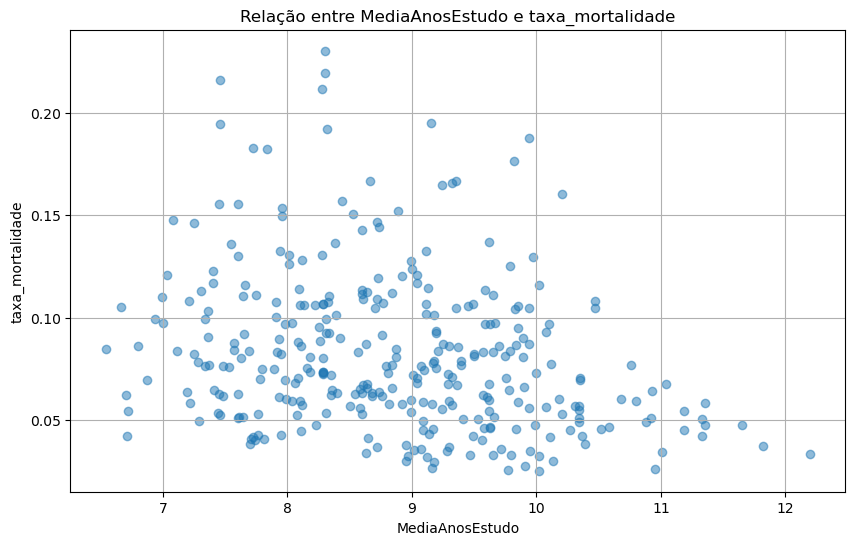

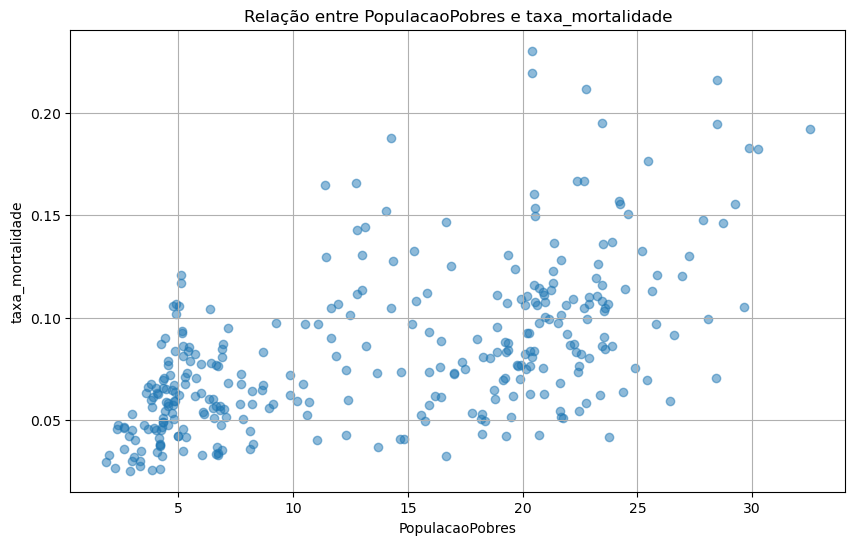

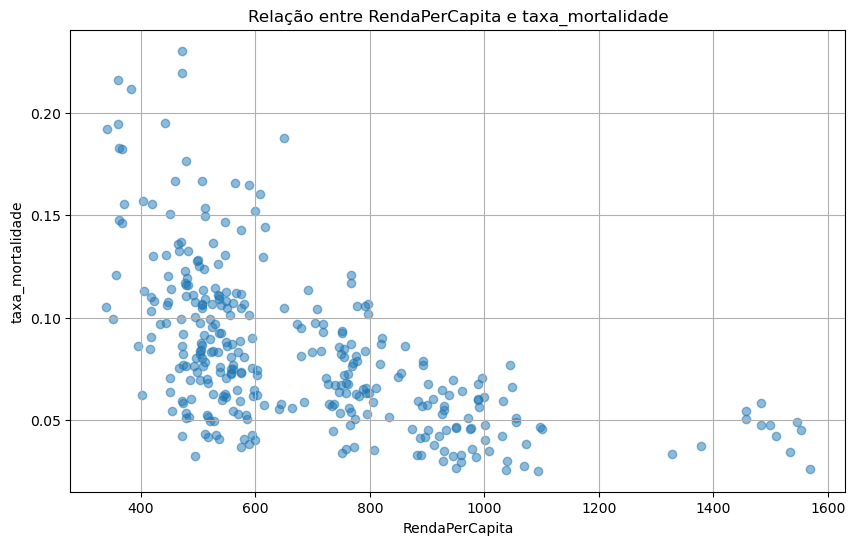

In [24]:
# Lista de variáveis independentes e dependentes
variaveis = ['IDHM', 'IVS', 'MediaAnosEstudo', 'PopulacaoPobres', 'RendaPerCapita']
dependentes = ['taxa_fatalidade', 'taxa_mortalidade']

df = df_indices.copy()

# Gerar scatterplots para cada combinação de variável dependente e independente
for dep in dependentes:
    for var in variaveis:
        plt.figure(figsize=(10, 6))
        plt.scatter(df[var], df[dep], alpha=0.5)
        plt.title(f'Relação entre {var} e {dep}')
        plt.xlabel(var)
        plt.ylabel(dep)
        plt.grid(True)
        plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Para garantir a normalidade dos resíduos em nosso modelo de regressão, aplicamos a transformação de Box-Cox à variável dependente. Entre as taxas analisadas, apenas a taxa de mortalidade (definida como o total de óbitos dividido pelo total de acidentes) apresentou resíduos com distribuição aproximadamente normal.

Por outro lado, a taxa de fatalidade (calculada como o total de óbitos dividido pela soma de óbitos e sobreviventes, excluindo os ilesos) não atendeu ao critério de normalidade dos resíduos, mesmo após a transformação.

Embora a normalidade tenha sido alcançada na taxa de mortalidade, a análise dos resíduos indicou a presença de autocorrelação. Para corrigir esse problema, introduzimos uma variável defasada (lag) da taxa de mortalidade no modelo. Com essa modificação, os resíduos resultantes deixaram de apresentar evidências de autocorrelação, mas também perderam a característica de normalidade.


Regressão Linear: IDHM explicando taxa_fatalidade
                            OLS Regression Results                            
Dep. Variable:        taxa_fatalidade   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     249.2
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           5.59e-42
Time:                        17:01:10   Log-Likelihood:                 1087.0
No. Observations:                 324   AIC:                            -2170.
Df Residuals:                     322   BIC:                            -2162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

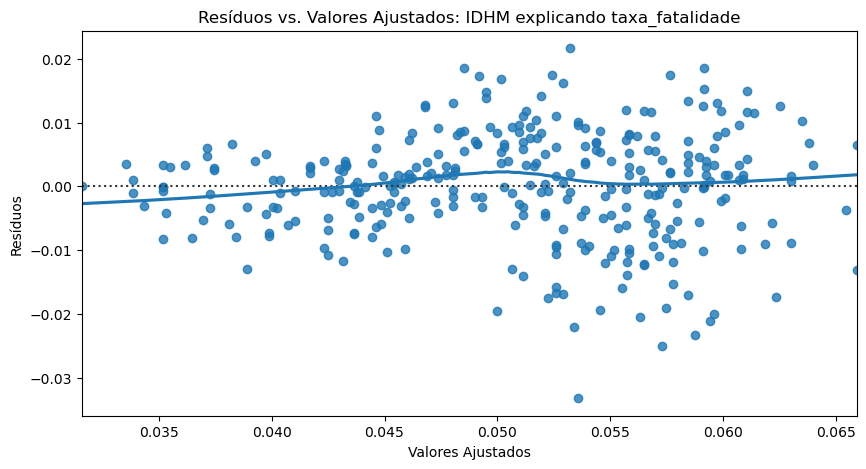

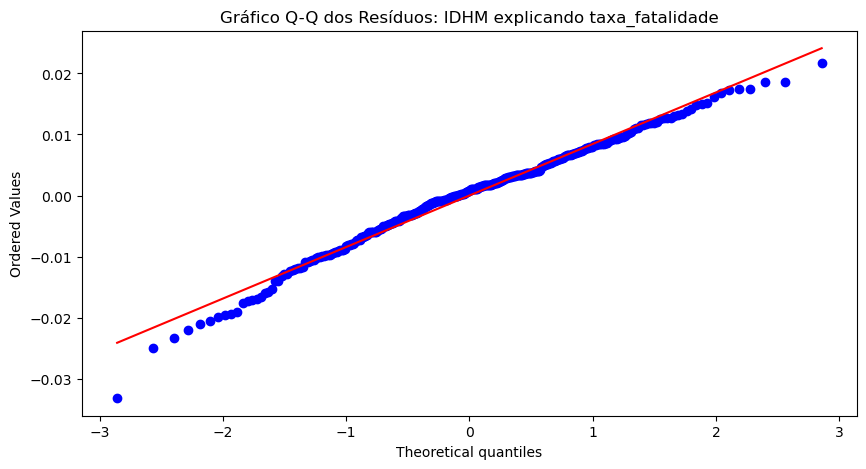

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



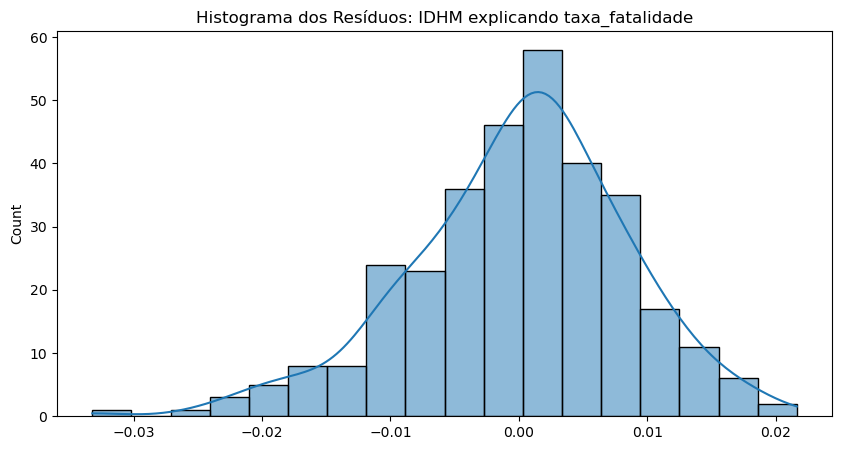

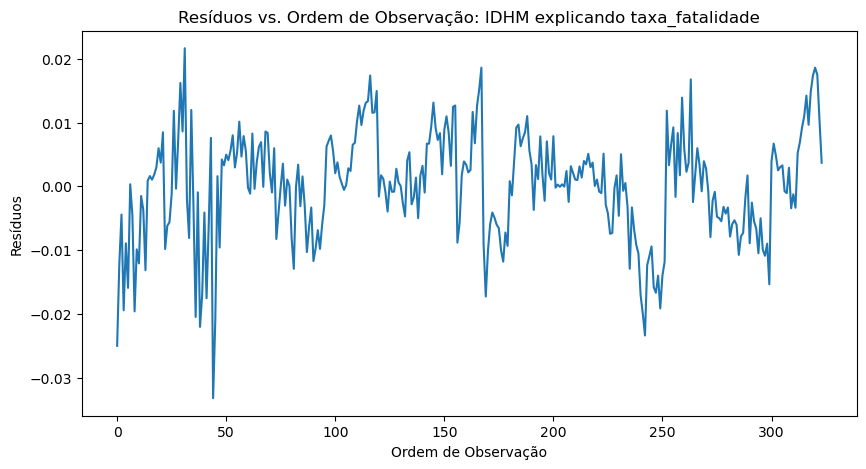

Teste de Durbin-Watson (IDHM explicando taxa_fatalidade): 0.7435420049202887
{'LM Statistic': 18.515118078223008, 'LM-Test p-value': 1.685619430232838e-05, 'F-Statistic': 19.516082051858845, 'F-Test p-value': 1.3644015544296272e-05}

Regressão Linear: IDHM explicando taxa_mortalidade
                            OLS Regression Results                            
Dep. Variable:       taxa_mortalidade   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     122.2
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           2.71e-24
Time:                        17:01:10   Log-Likelihood:                 992.68
No. Observations:                 324   AIC:                            -1981.
Df Residuals:                     322   BIC:                            -1974.
Df Model:                           1                                         
Cova

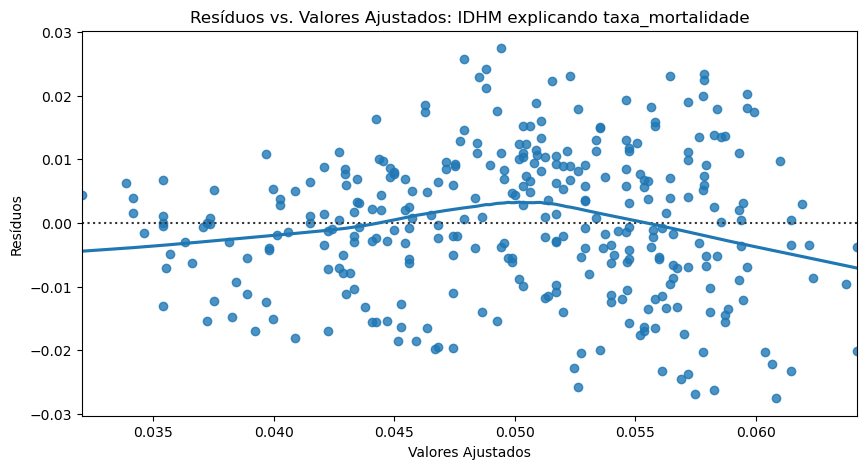

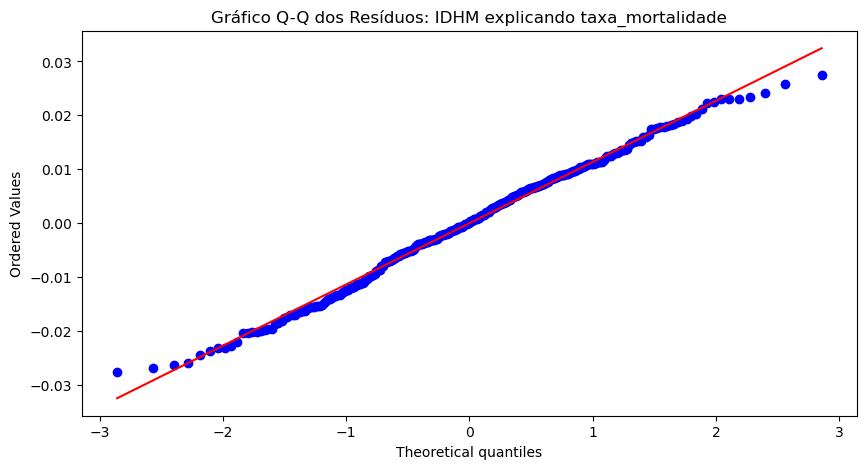

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



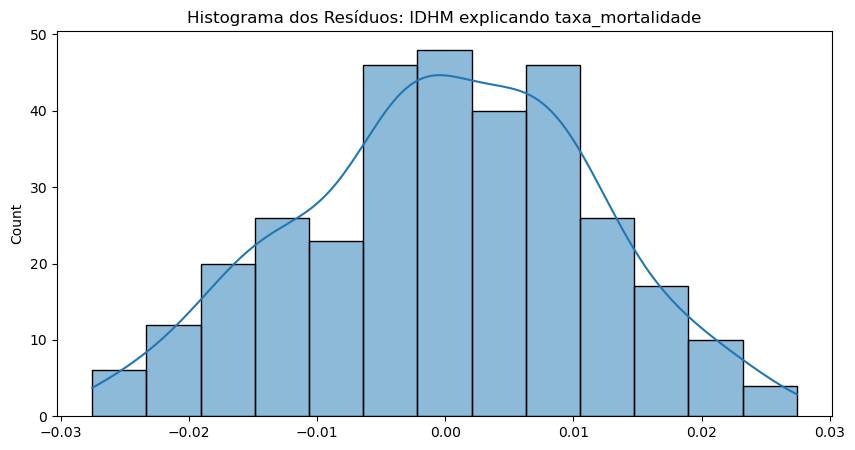

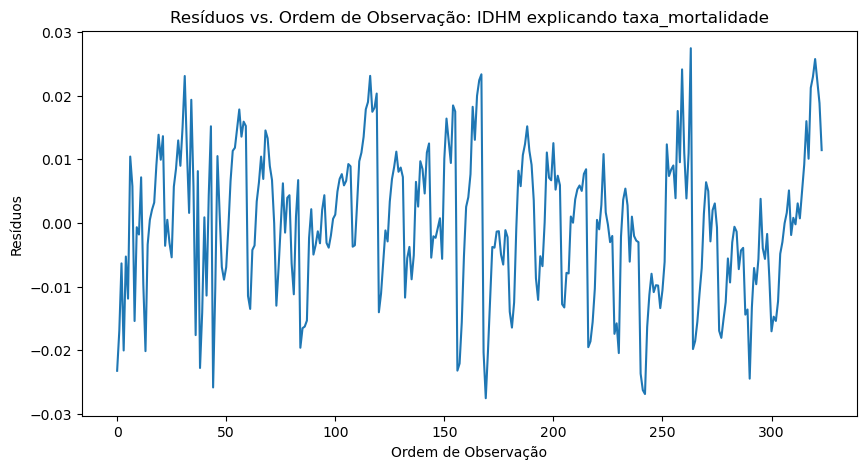

Teste de Durbin-Watson (IDHM explicando taxa_mortalidade): 0.7079769652114762
{'LM Statistic': 20.28274581109386, 'LM-Test p-value': 6.680028486831906e-06, 'F-Statistic': 21.50369813072931, 'F-Test p-value': 5.1410815561191235e-06}

Regressão Linear: IVS explicando taxa_fatalidade
                            OLS Regression Results                            
Dep. Variable:        taxa_fatalidade   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     118.5
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           1.04e-23
Time:                        17:01:11   Log-Likelihood:                 1044.9
No. Observations:                 324   AIC:                            -2086.
Df Residuals:                     322   BIC:                            -2078.
Df Model:                           1                                         
Covaria

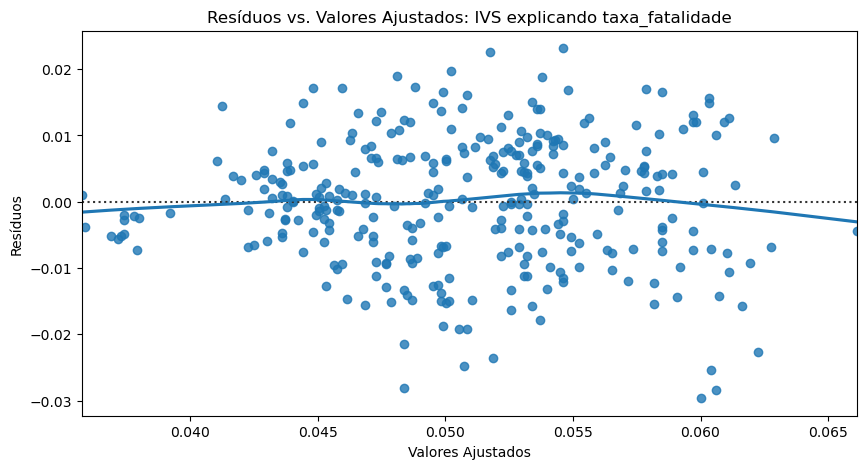

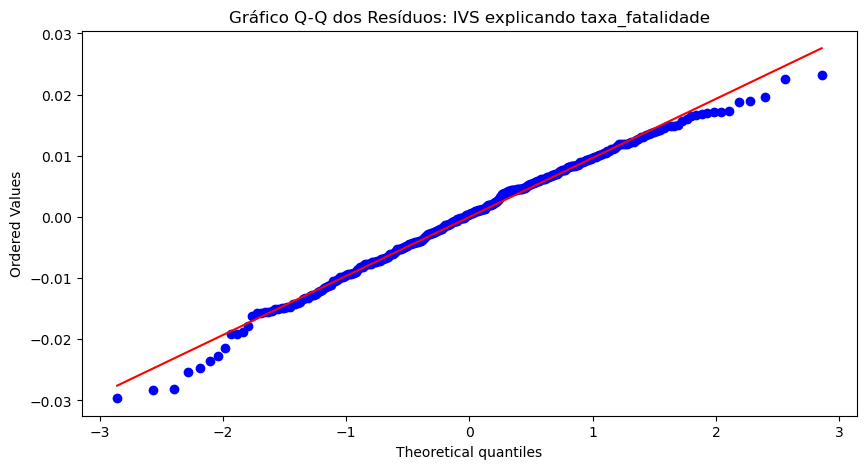

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



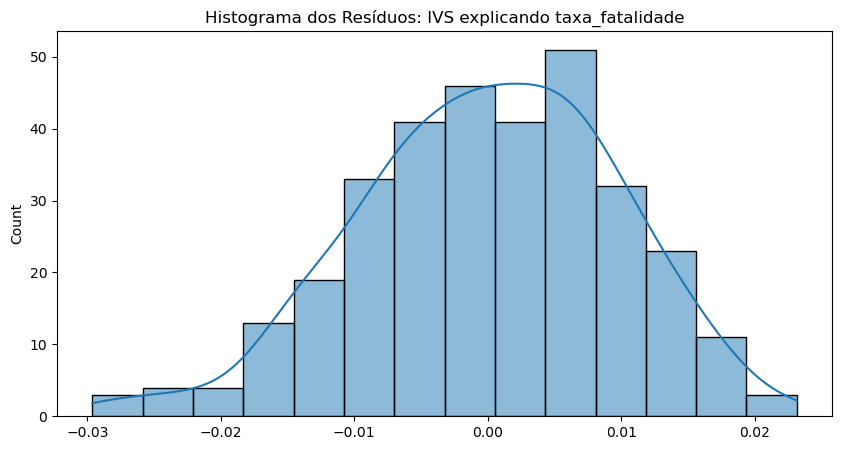

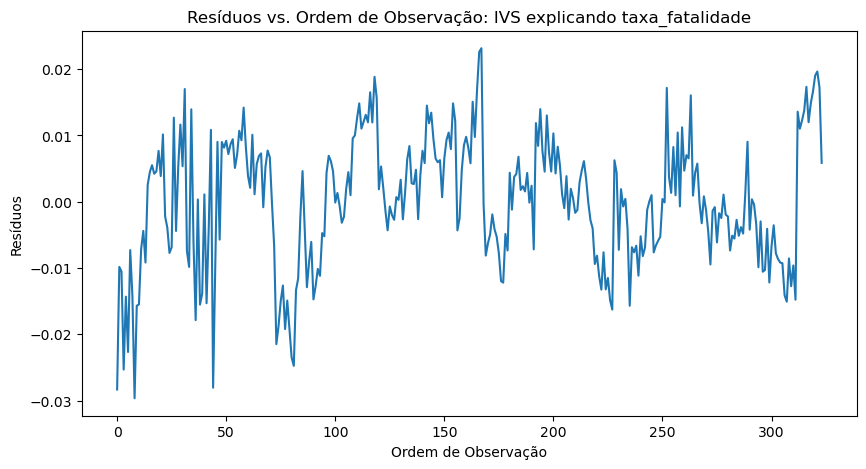

Teste de Durbin-Watson (IVS explicando taxa_fatalidade): 0.6117638650773356
{'LM Statistic': 15.079455664698141, 'LM-Test p-value': 0.00010307904892077052, 'F-Statistic': 15.717908093424047, 'F-Test p-value': 9.062515572579395e-05}

Regressão Linear: IVS explicando taxa_mortalidade
                            OLS Regression Results                            
Dep. Variable:       taxa_mortalidade   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     71.51
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           9.74e-16
Time:                        17:01:12   Log-Likelihood:                 973.06
No. Observations:                 324   AIC:                            -1942.
Df Residuals:                     322   BIC:                            -1935.
Df Model:                           1                                         
Covari

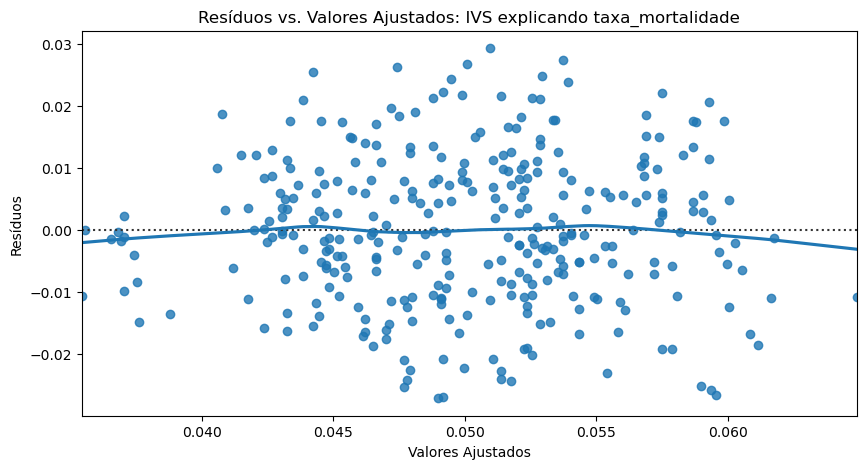

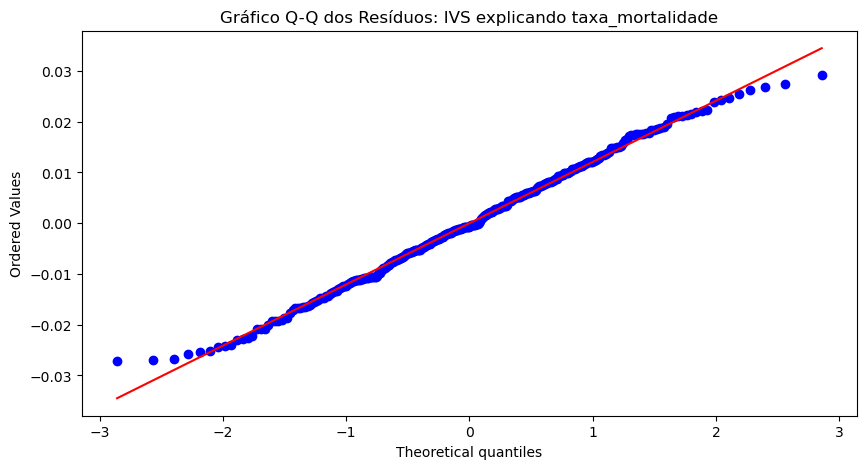

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



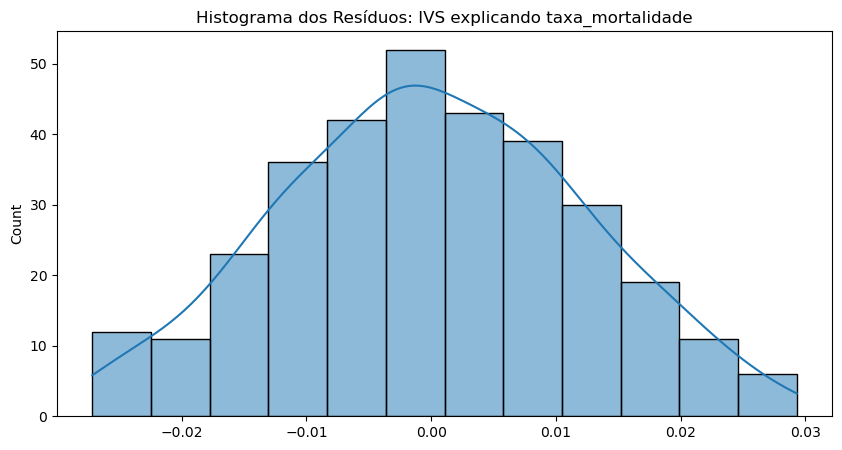

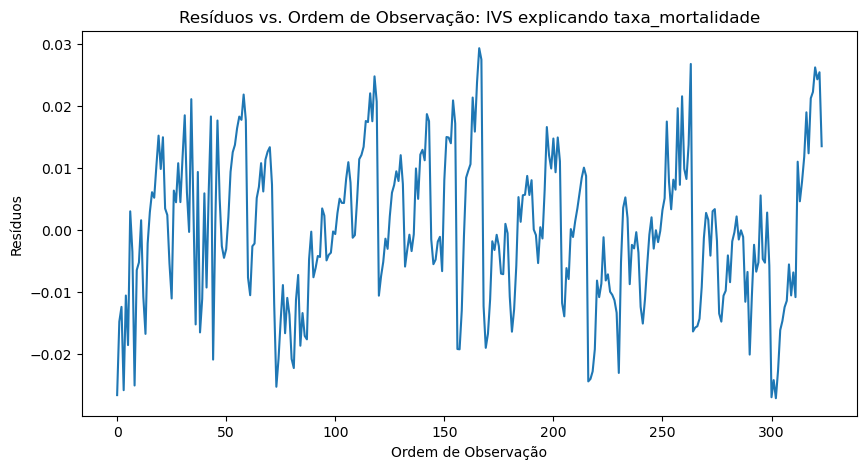

Teste de Durbin-Watson (IVS explicando taxa_mortalidade): 0.5936389108067363
{'LM Statistic': 3.5081163314053407, 'LM-Test p-value': 0.06106885199789378, 'F-Statistic': 3.5246242300494686, 'F-Test p-value': 0.06136736889934233}

Regressão Linear: MediaAnosEstudo explicando taxa_fatalidade
                            OLS Regression Results                            
Dep. Variable:        taxa_fatalidade   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     150.1
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           1.40e-28
Time:                        17:01:13   Log-Likelihood:                 1056.1
No. Observations:                 324   AIC:                            -2108.
Df Residuals:                     322   BIC:                            -2101.
Df Model:                           1                                         

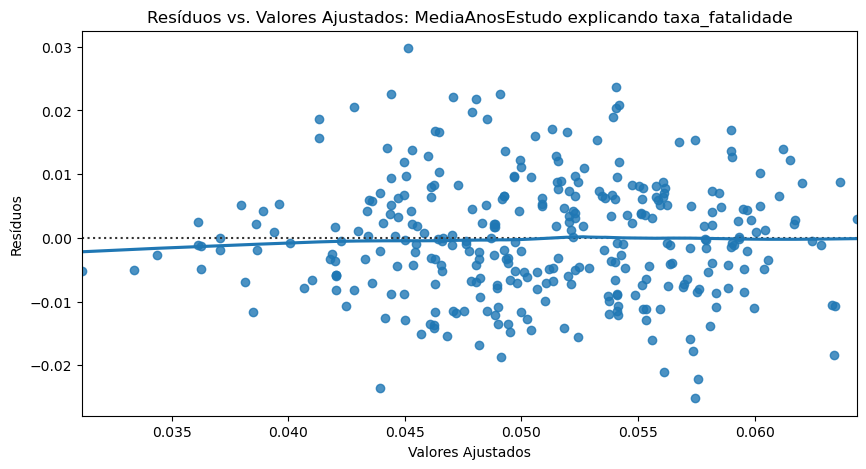

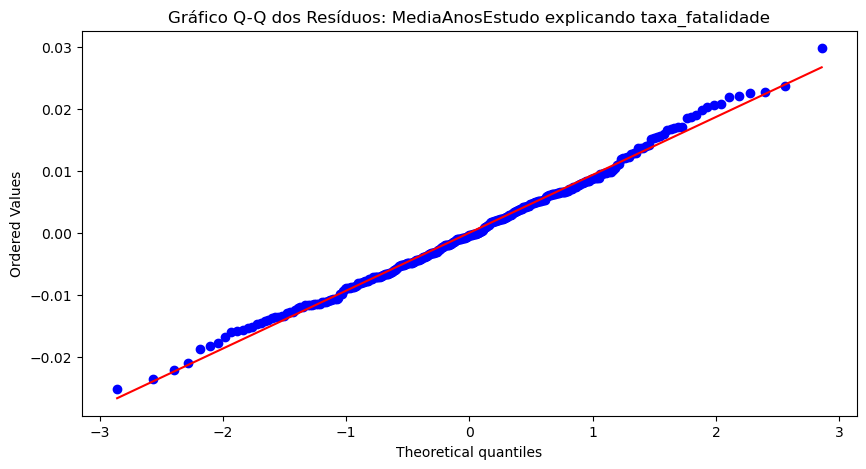

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



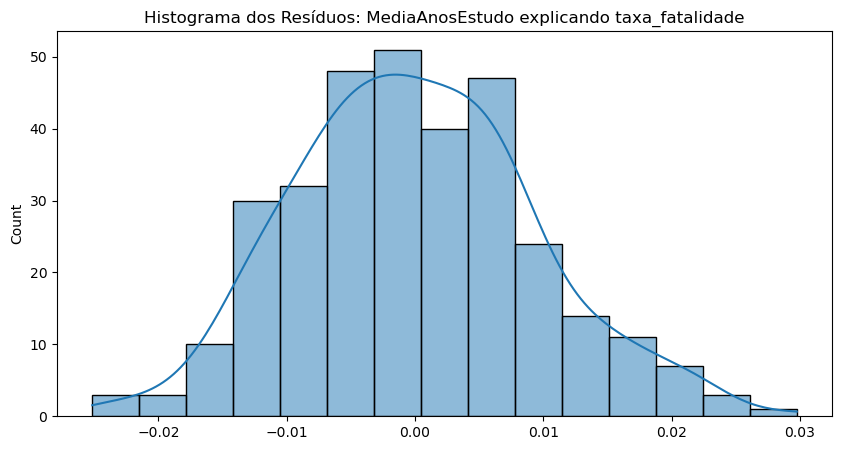

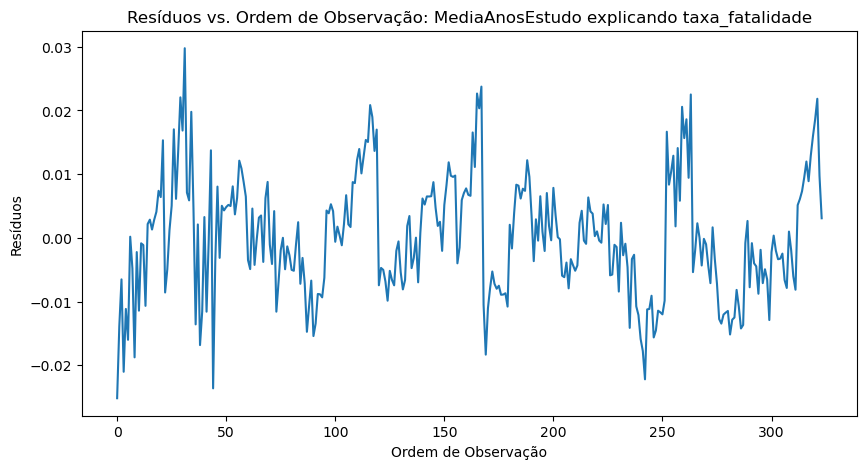

Teste de Durbin-Watson (MediaAnosEstudo explicando taxa_fatalidade): 0.6534528732572875
{'LM Statistic': 0.08631316962611546, 'LM-Test p-value': 0.7689175893853452, 'F-Statistic': 0.08580323014927801, 'F-Test p-value': 0.7697705361936814}

Regressão Linear: MediaAnosEstudo explicando taxa_mortalidade
                            OLS Regression Results                            
Dep. Variable:       taxa_mortalidade   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     33.22
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           1.93e-08
Time:                        17:01:14   Log-Likelihood:                 956.48
No. Observations:                 324   AIC:                            -1909.
Df Residuals:                     322   BIC:                            -1901.
Df Model:                           1                             

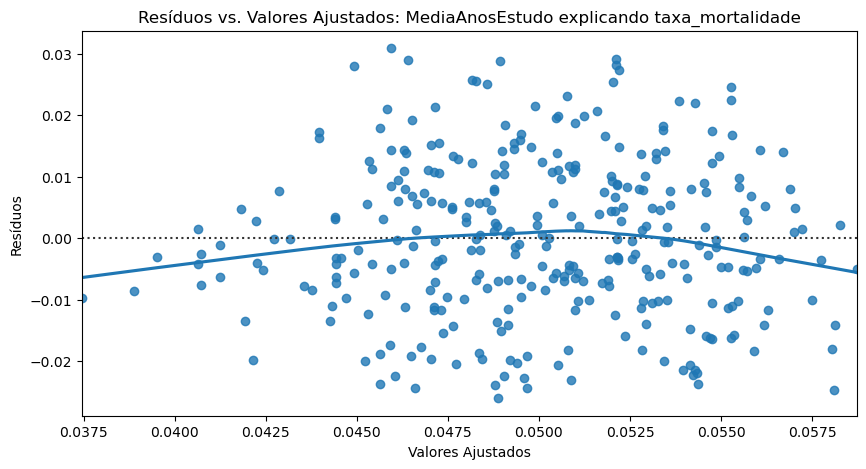

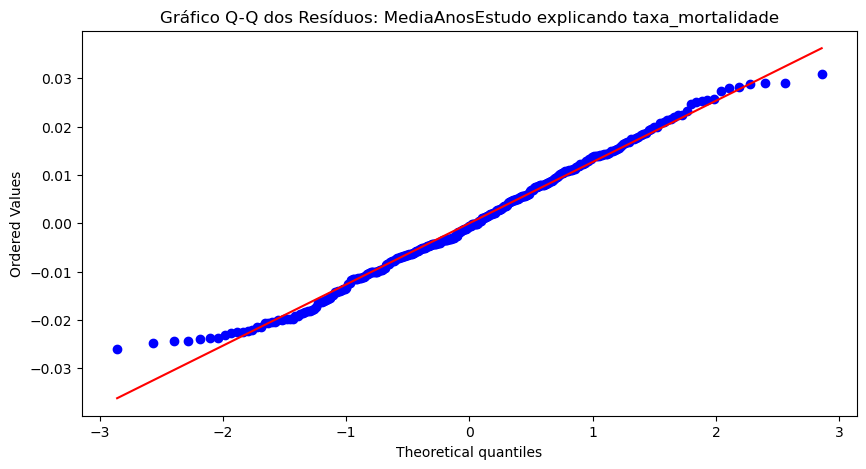

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



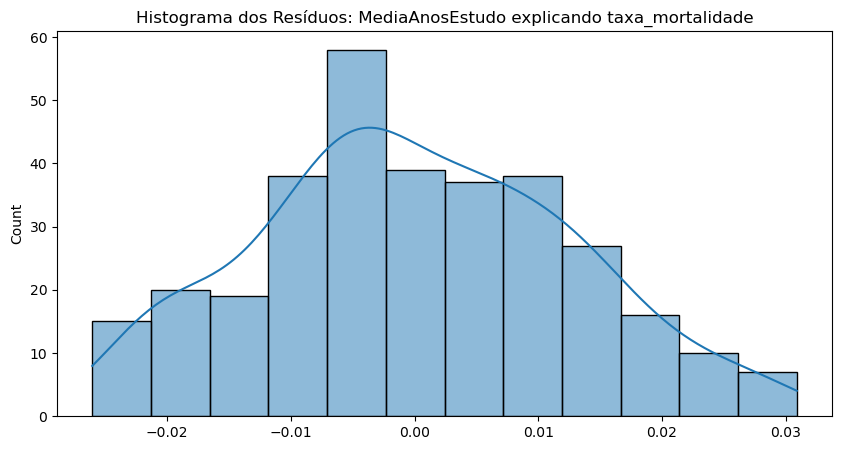

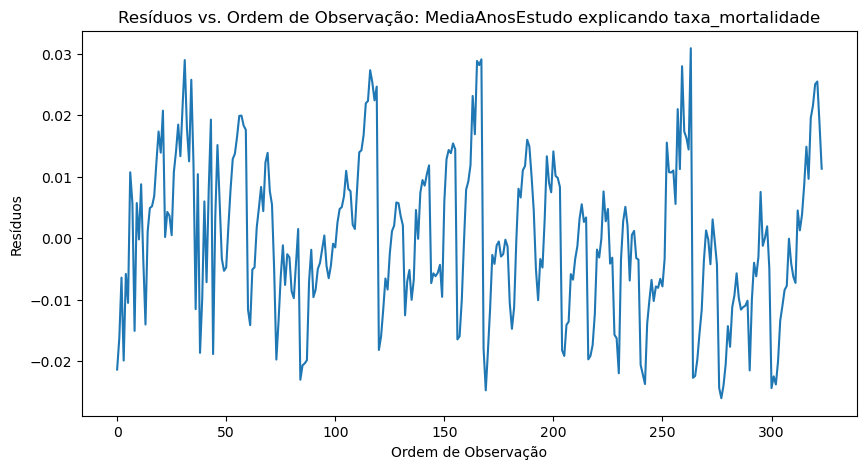

Teste de Durbin-Watson (MediaAnosEstudo explicando taxa_mortalidade): 0.5665577252368349
{'LM Statistic': 0.21905622193295704, 'LM-Test p-value': 0.639759972664375, 'F-Statistic': 0.21785131218458867, 'F-Test p-value': 0.6409976485262308}

Regressão Linear: PopulacaoPobres explicando taxa_fatalidade
                            OLS Regression Results                            
Dep. Variable:        taxa_fatalidade   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     177.4
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           1.55e-32
Time:                        17:01:16   Log-Likelihood:                 1065.2
No. Observations:                 324   AIC:                            -2126.
Df Residuals:                     322   BIC:                            -2119.
Df Model:                           1                              

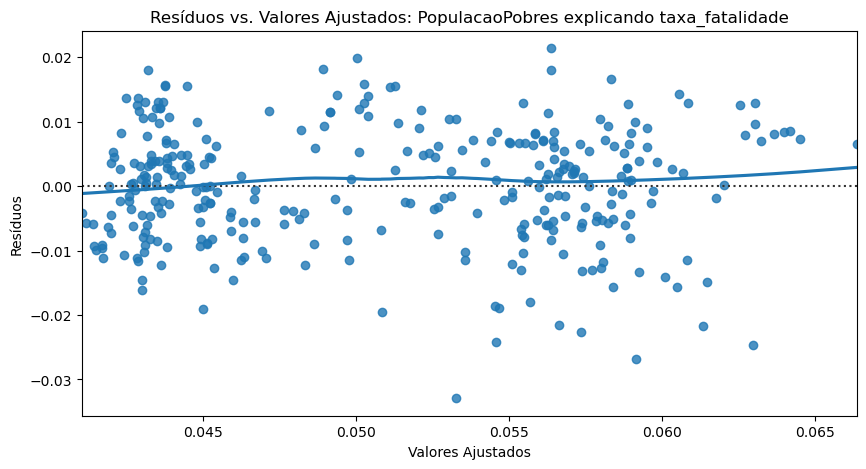

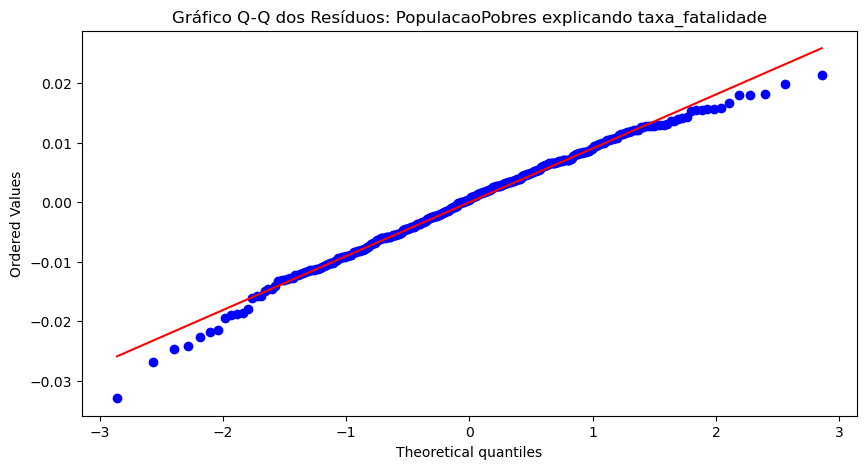

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



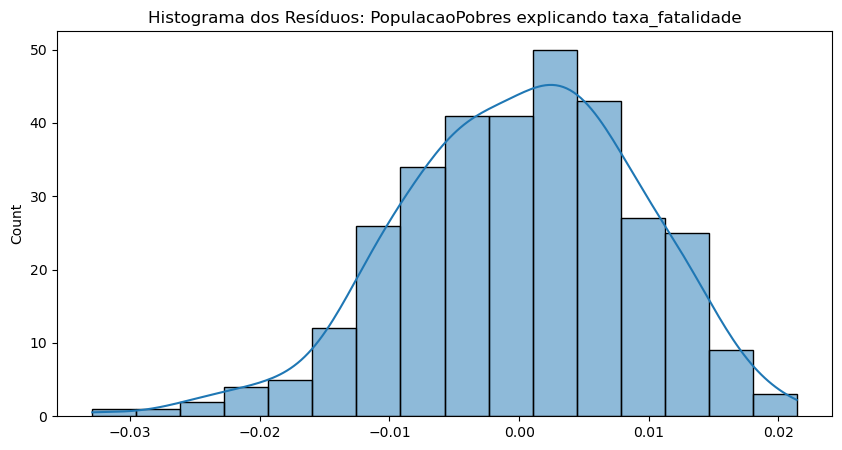

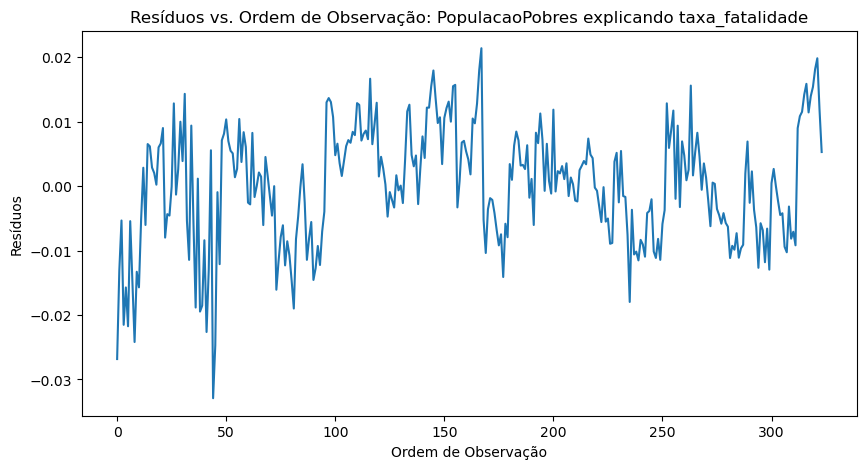

Teste de Durbin-Watson (PopulacaoPobres explicando taxa_fatalidade): 0.6567691426810461
{'LM Statistic': 4.87755188837524, 'LM-Test p-value': 0.027208182374614445, 'F-Statistic': 4.921533152401292, 'F-Test p-value': 0.027221106865044174}

Regressão Linear: PopulacaoPobres explicando taxa_mortalidade
                            OLS Regression Results                            
Dep. Variable:       taxa_mortalidade   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     184.7
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           1.48e-33
Time:                        17:01:17   Log-Likelihood:                 1014.0
No. Observations:                 324   AIC:                            -2024.
Df Residuals:                     322   BIC:                            -2016.
Df Model:                           1                              

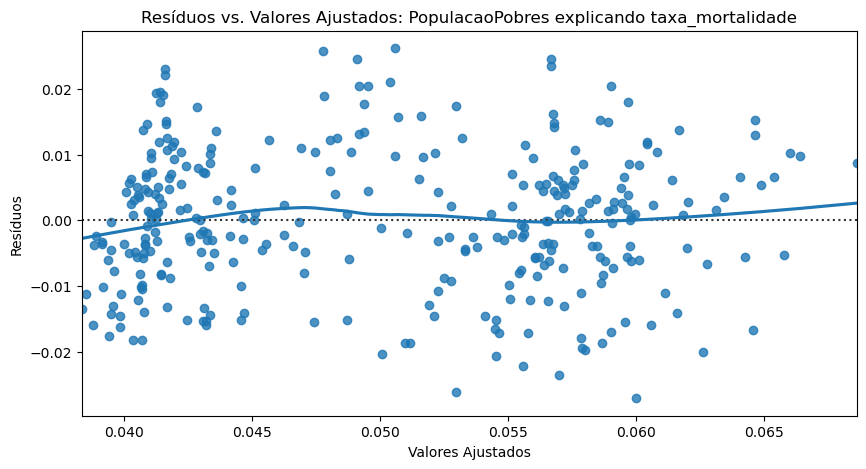

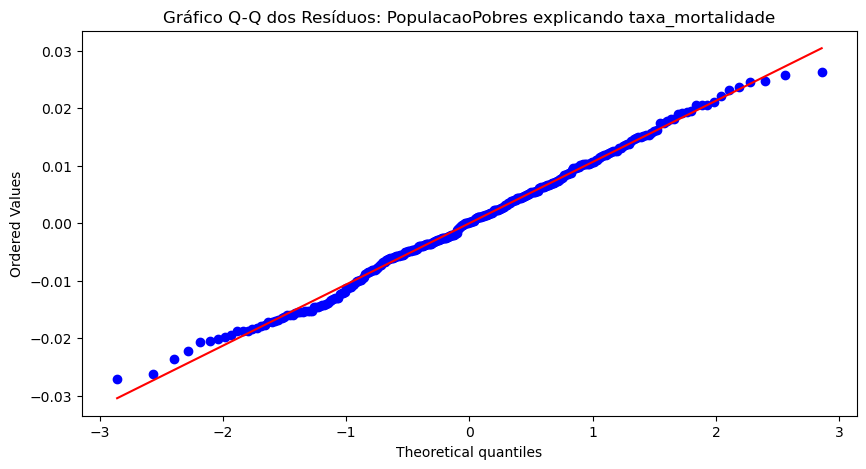

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



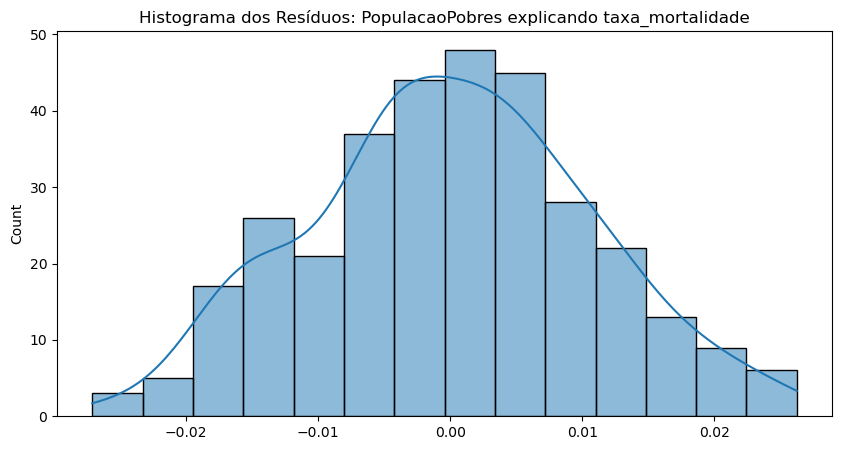

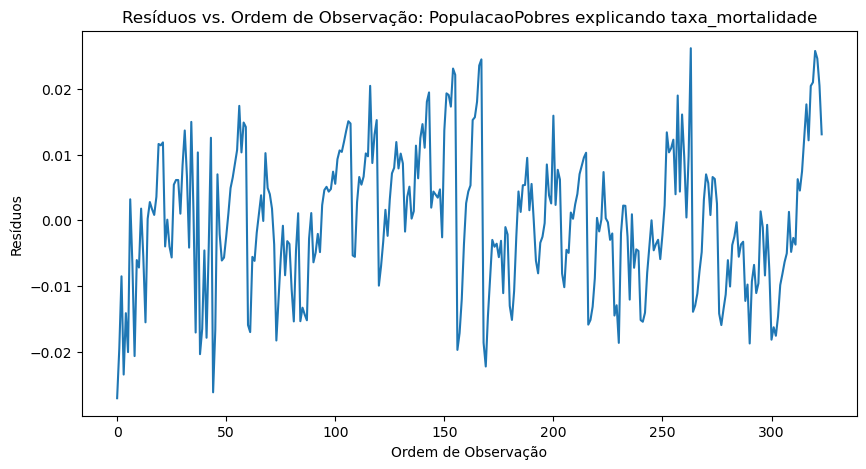

Teste de Durbin-Watson (PopulacaoPobres explicando taxa_mortalidade): 0.715627322597693
{'LM Statistic': 0.47489778508023006, 'LM-Test p-value': 0.4907425454606401, 'F-Statistic': 0.4726591097535742, 'F-Test p-value': 0.4922612833173461}

Regressão Linear: RendaPerCapita explicando taxa_fatalidade
                            OLS Regression Results                            
Dep. Variable:        taxa_fatalidade   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     227.7
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           2.77e-39
Time:                        17:01:18   Log-Likelihood:                 1080.8
No. Observations:                 324   AIC:                            -2158.
Df Residuals:                     322   BIC:                            -2150.
Df Model:                           1                                

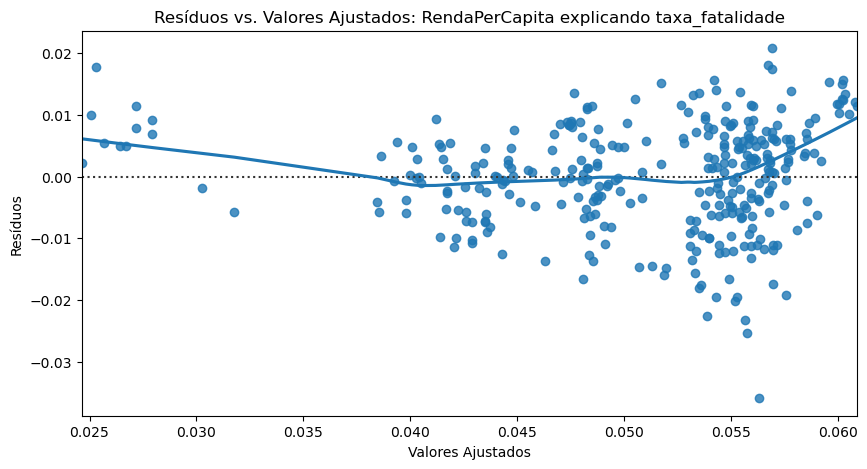

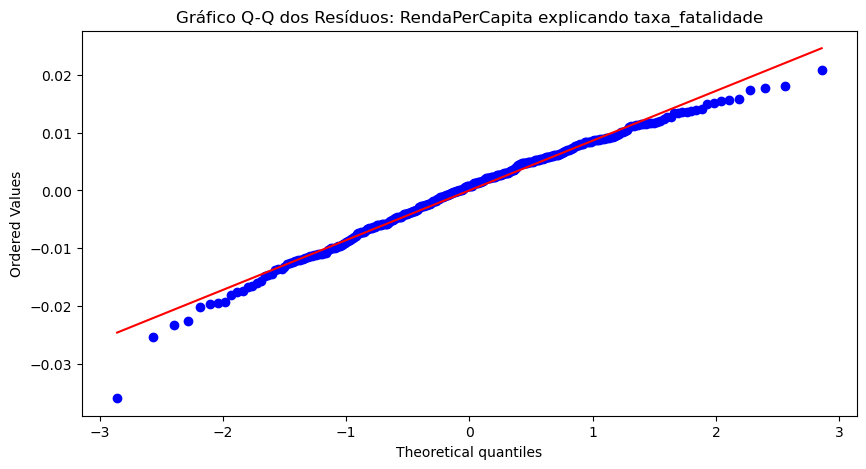

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



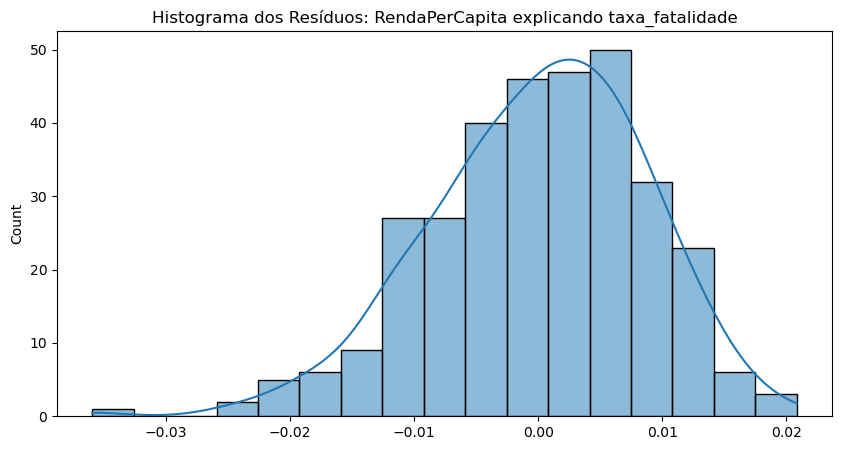

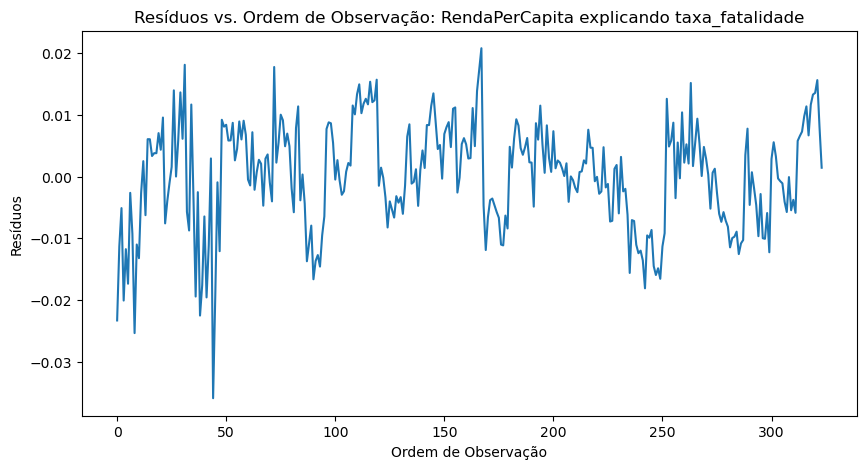

Teste de Durbin-Watson (RendaPerCapita explicando taxa_fatalidade): 0.7146468486725347
{'LM Statistic': 9.261804137215659, 'LM-Test p-value': 0.002339824140090458, 'F-Statistic': 9.475497322490947, 'F-Test p-value': 0.002261345913063455}

Regressão Linear: RendaPerCapita explicando taxa_mortalidade
                            OLS Regression Results                            
Dep. Variable:       taxa_mortalidade   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     188.8
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           3.97e-34
Time:                        17:01:20   Log-Likelihood:                 1015.3
No. Observations:                 324   AIC:                            -2027.
Df Residuals:                     322   BIC:                            -2019.
Df Model:                           1                               

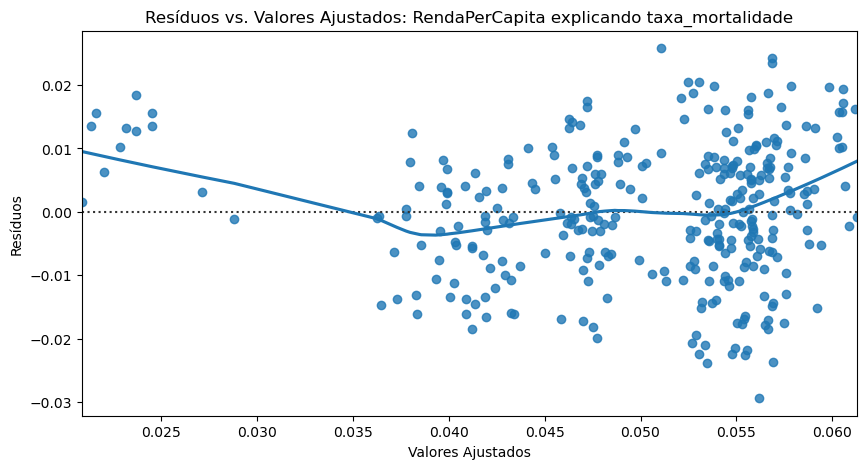

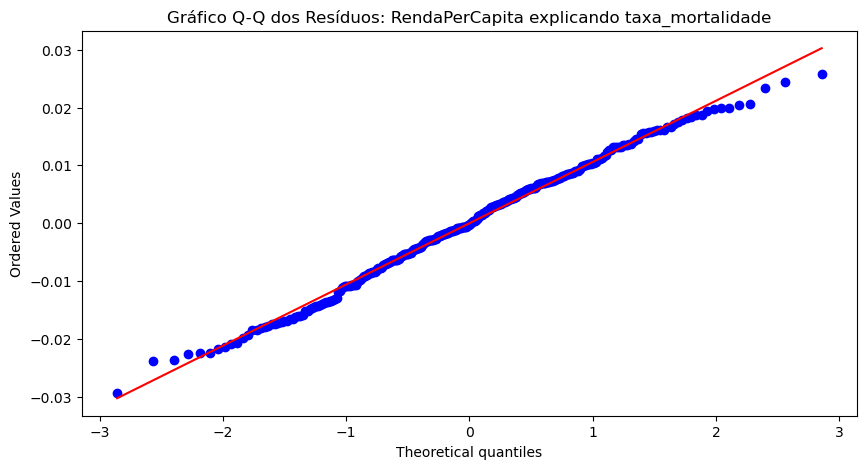

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



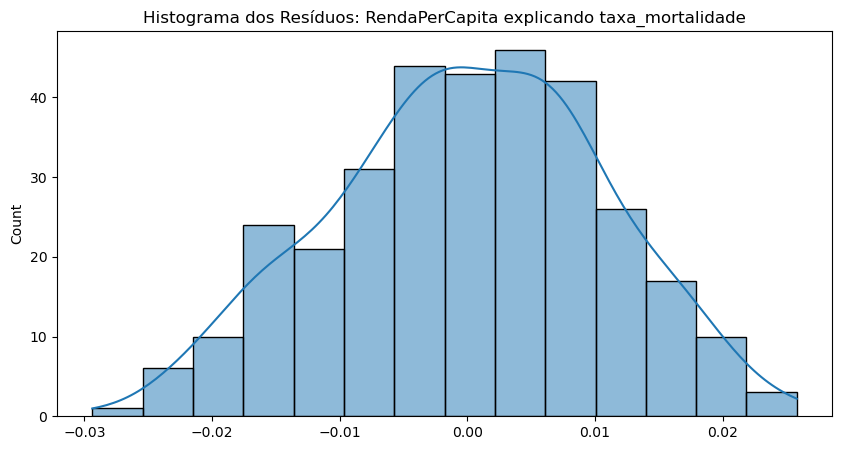

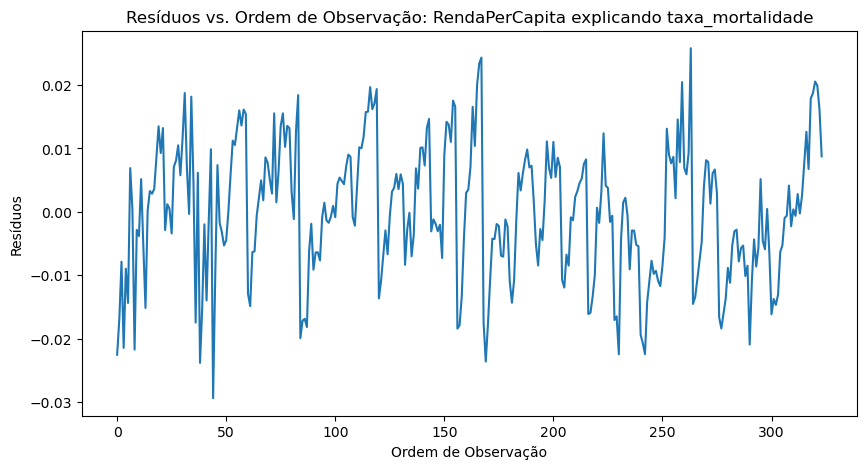

Teste de Durbin-Watson (RendaPerCapita explicando taxa_mortalidade): 0.7318872945026019
{'LM Statistic': 2.6619253781767327, 'LM-Test p-value': 0.10277625839167476, 'F-Statistic': 2.6674086871954326, 'F-Test p-value': 0.1034000468818782}


In [27]:


# Lista de variáveis independentes para a regressão
variaveis = ['IDHM', 'IVS', 'MediaAnosEstudo', 'PopulacaoPobres', 'RendaPerCapita']

# Variáveis dependentes
dependentes = ['taxa_fatalidade', 'taxa_mortalidade']

df = df_indices.copy()

# Transformando variáveis dependentes na escala Box-Cox
for var in dependentes:
    df[var], _ = boxcox(df[var] + 1)

resultados = {}

# Loop para rodar a regressão linear para cada variável independente com as duas dependentes
for var in variaveis:
    for dep in dependentes:
        X = df[[var]]  
        y = df[dep]  
        
        X = sm.add_constant(X)  
        
        modelo = sm.OLS(y, X).fit()  
        
    
        resultados[f"{var} ~ {dep}"] = modelo.summary()
        
        # Exibindo os coeficientes e estatísticas
        print(f"\nRegressão Linear: {var} explicando {dep}")
        print(modelo.summary())

        # 1. Gráfico de Resíduos vs. Valores Ajustados
        plt.figure(figsize=(10, 5))
        sns.residplot(x=modelo.fittedvalues, y=modelo.resid, lowess=True)
        plt.title(f'Resíduos vs. Valores Ajustados: {var} explicando {dep}')
        plt.xlabel('Valores Ajustados')
        plt.ylabel('Resíduos')
        plt.show()

        # 2. Gráfico de Probabilidade Normal (Q-Q Plot)
        plt.figure(figsize=(10, 5))
        stats.probplot(modelo.resid, dist="norm", plot=plt)
        plt.title(f'Gráfico Q-Q dos Resíduos: {var} explicando {dep}')
        plt.show()

        # 3. Histograma de Resíduos
        plt.figure(figsize=(10, 5))
        sns.histplot(modelo.resid, kde=True)
        plt.title(f'Histograma dos Resíduos: {var} explicando {dep}')
        plt.show()

        # 4. Gráfico de Resíduos vs. Ordem de Observação
        plt.figure(figsize=(10, 5))
        plt.plot(modelo.resid)
        plt.title(f'Resíduos vs. Ordem de Observação: {var} explicando {dep}')
        plt.xlabel('Ordem de Observação')
        plt.ylabel('Resíduos')
        plt.show()

        # 5. Teste de Durbin-Watson
        dw = durbin_watson(modelo.resid)
        print(f'Teste de Durbin-Watson ({var} explicando {dep}): {dw}')

        # 6. Teste de Breusch-Pagan (Heterocedasticidade)
        bp_test = het_breuschpagan(modelo.resid, modelo.model.exog)
        labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
        print(dict(zip(labels, bp_test)))

---

In [59]:
resultados = {}

df = df_indices.copy()

# Lista de variáveis independentes e dependentes
variaveis = [ 'IDHM', 'IVS']     #, 'MediaAnosEstudo' , 'PopulacaoPobres'
dependente = 'taxa_mortalidade'


df[dependente], _ = boxcox(df[dependente] + 1)

# Ajustar o modelo de regressão linear
X = df[variaveis]  # Variáveis independentes
y = df[dependente]  # Variável dependente

X = sm.add_constant(X)  # Adiciona uma constante para a regressão

# Verificar e tratar valores infinitos ou nulos
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
y.dropna(inplace=True)

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Guarda os resultados
resultados = modelo.summary()

# Exibir os coeficientes e estatísticas
print(f"\nRegressão Linear: {variaveis} explicando {dependente}")
print(resultados)

# Calcular o VIF para as variáveis independentes
vif_data = pd.DataFrame()
vif_data["Variável"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Regressão Linear: ['IDHM', 'IVS'] explicando taxa_mortalidade
                            OLS Regression Results                            
Dep. Variable:       taxa_mortalidade   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     65.12
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           1.82e-24
Time:                        12:33:58   Log-Likelihood:                 995.74
No. Observations:                 324   AIC:                            -1985.
Df Residuals:                     321   BIC:                            -1974.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

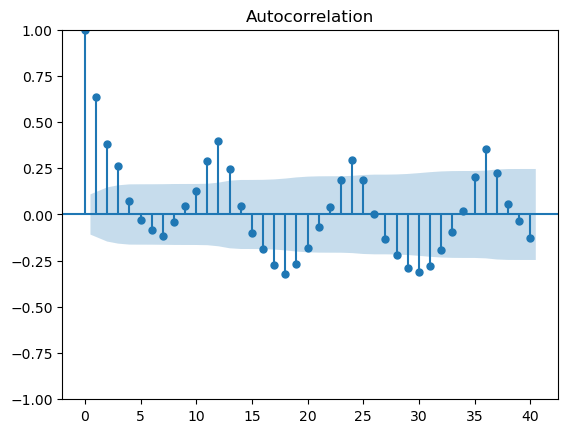

In [60]:
from statsmodels.graphics.tsaplots import plot_acf

# Supondo que 'results' seja o objeto de resultado do seu modelo de regressão
residuos = modelo.resid

# Gerar o correlograma dos resíduos
plot_acf(residuos, lags=40)  # lags é o número de defasagens a serem exibidas
plt.show()

In [61]:
resultados = {}

df = df_indices.copy()

# Criar variáveis defasadas para taxa_mortalidade
df['taxa_mortalidade_lag1'] = df['taxa_mortalidade'].shift(1)

# Remover as primeiras linhas com valores NaN devido aos lags
df = df.dropna()

# Lista de variáveis independentes e dependentes
variaveis = [ 'IDHM', 'IVS', 'taxa_mortalidade_lag1']     #, 'MediaAnosEstudo' , 'PopulacaoPobres'
dependente = 'taxa_mortalidade'



df[dependente], _ = boxcox(df[dependente] + 1)

# Ajustar o modelo de regressão linear
X = df[variaveis]  # Variáveis independentes
y = df[dependente]  # Variável dependente

X = sm.add_constant(X)  # Adiciona uma constante para a regressão

# Verificar e tratar valores infinitos ou nulos
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
y.dropna(inplace=True)

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Guarda os resultados
resultados = modelo.summary()

# Exibir os coeficientes e estatísticas
print(f"\nRegressão Linear: {variaveis} explicando {dependente}")
print(resultados)

# Calcular o VIF para as variáveis independentes
vif_data = pd.DataFrame()
vif_data["Variável"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Regressão Linear: ['IDHM', 'IVS', 'taxa_mortalidade_lag1'] explicando taxa_mortalidade
                            OLS Regression Results                            
Dep. Variable:       taxa_mortalidade   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     128.7
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           1.24e-54
Time:                        12:34:12   Log-Likelihood:                 1064.9
No. Observations:                 323   AIC:                            -2122.
Df Residuals:                     319   BIC:                            -2107.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Para garantir a ausência de autocorrelação, homocedasticidade e normalidade dos resíduos, além de facilitar a interpretação dos coeficientes das variáveis explicativas, optamos por aplicar a transformação logarítmica à variável dependente taxa de mortalidade (definida como o total de óbitos dividido pelo total de acidentes). Em seguida, ajustamos um modelo ARIMA com variáveis exógenas, utilizando o IDHM e o IVS como preditores.

Após a convergência do modelo, a interpretação dos coeficientes das variáveis explicativas pode ser feita utilizando a seguinte fórmula, que converte os efeitos para a escala percentual da taxa de mortalidade: Interpretação do coeficiente = (*e* ^ coef - 1) * 100%, onde "coef" representa o coeficiente estimado da variável explicativa no model

Aviso: O índice de ano não está em ordem crescente. Ordenando...
O DataFrame está no formato adequado para modelagem de séries temporais anuais.
Continuando com a modelagem ARIMAX...
                               SARIMAX Results                                
Dep. Variable:       taxa_mortalidade   No. Observations:                  324
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -69.474
Date:                Thu, 03 Apr 2025   AIC                            148.949
Time:                        11:30:57   BIC                            167.837
Sample:                             0   HQIC                           156.489
                                - 324                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IDHM          -5.3363      

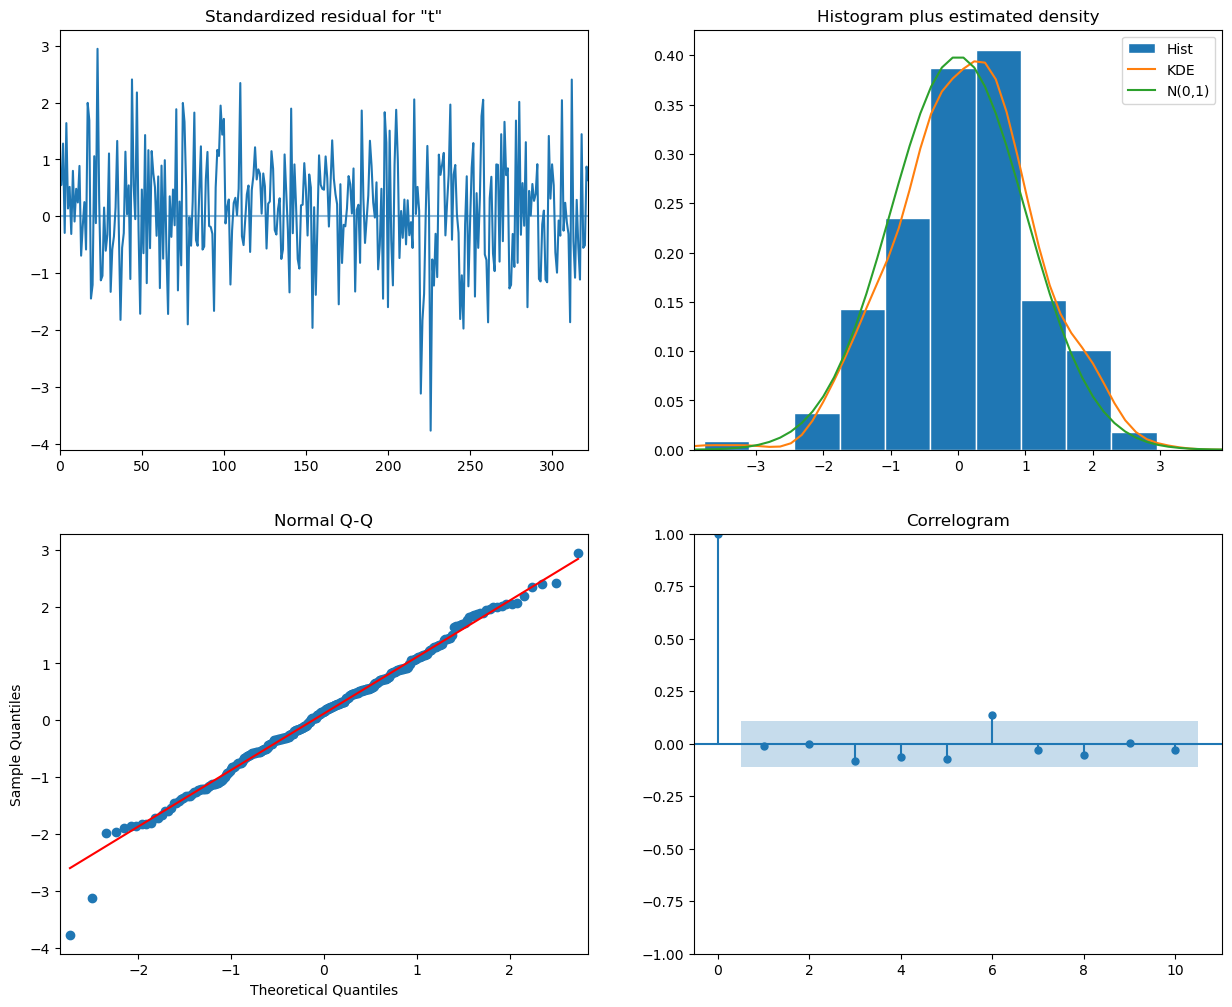

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

df = df_indices.copy()

variaveis = [ 'IDHM', 'IVS']     #, 'MediaAnosEstudo' , 'PopulacaoPobres'
dependente = 'taxa_mortalidade'

# Transformando a variável dependente com função logarítimica
df[dependente] = np.log(df[dependente])


# Função que irá verificar se os dados estão na estrutura de série temporal correta
def verificar_formato_serie_temporal_anual(df, coluna_ano, colunas_numericas):
    try:
        df.index = pd.to_datetime(df[coluna_ano], format='%Y')
        df = df.drop(columns=[coluna_ano])
    except Exception as e:
        print(f"Erro ao converter para DatetimeIndex: {e}")
        return False

    # Verificando colunas numéricas
    for coluna in colunas_numericas:
        if not pd.api.types.is_numeric_dtype(df[coluna]):
            print(f"Erro: A coluna '{coluna}' não é numérica.")
            return False

    # Verificano ordenação temporal
    if not df.index.is_monotonic_increasing:
        print("Aviso: O índice de ano não está em ordem crescente. Ordenando...")
        df = df.sort_index()

    print("O DataFrame está no formato adequado para modelagem de séries temporais anuais.")
    return True


coluna_ano = 'ano'
colunas_numericas = ['IDHM', 'IVS',  'taxa_mortalidade']

if verificar_formato_serie_temporal_anual(df, coluna_ano, colunas_numericas):
    print("Continuando com a modelagem ARIMAX...")
    
else:
    print("Corrija os erros no DataFrame antes de prosseguir.")


df = df.sort_index()

    
y = df['taxa_mortalidade']
exog = df[['IDHM', 'IVS']]




# Ajustando o modelo ARIMAX
model = ARIMA(y, exog=exog, order=(1, 1, 1)) 
results = model.fit()


print(results.summary())

# Diagnóstico dos resíduos
results.plot_diagnostics(figsize=(15, 12))
plt.show()

---

## Observações sobre AIC e BIC na Seleção de Modelos

### AIC (Critério de Informação de Akaike)
O AIC é uma medida usada para comparar diferentes modelos estatísticos, estimando a qualidade de cada modelo em relação aos outros. O AIC equilibra a qualidade do ajuste do modelo com a complexidade do modelo, penalizando modelos com mais parâmetros para evitar o sobreajuste. Valores menores de AIC indicam um modelo melhor. Na seleção do modelo ARIMA, os melhores parâmetros com base no AIC foram (0, 1, 1) com AIC = 147.9712.

### BIC (Critério de Informação Bayesiano)
O BIC é outro critério para seleção de modelos, semelhante ao AIC, mas inclui uma penalidade mais forte para modelos com mais parâmetros. O BIC também equilibra a qualidade do ajuste com a complexidade do modelo, mas penaliza a complexidade mais fortemente que o AIC. Valores menores de BIC indicam um modelo melhor. Na seleção do modelo ARIMA, os melhores parâmetros com base no BIC foram (0, 1, 1) com BIC = 163.0818.

### Significância na Seleção de Modelos
- **AIC vs. BIC**: Ambos os critérios visam encontrar o melhor modelo, mas diferem na forma como penalizam a complexidade. O AIC é mais leniente com a adição de parâmetros, enquanto o BIC é mais rigoroso. Isso significa que o BIC tende a favorecer modelos mais simples quando o tamanho da amostra é grande.
- **Uso Prático**: Na prática, o AIC é frequentemente usado quando o objetivo é prever pontos de dados futuros, pois tende a selecionar modelos que generalizam melhor. O BIC é preferido quando o objetivo é identificar o modelo verdadeiro entre um conjunto de candidatos, especialmente com conjuntos de dados maiores.

## Interpretação dos coeficientes

### IDHM (Índice de Desenvolvimento Humano Municipal)
Para o coeficiente do IDHM:
- Coficiente: -5.3404
- Como o IDHM varia entre 0 e 1 e é lido com até 3 casas decimais, um aumento de 0.001 (ou 0.1 ponto percentual) no IDHM resultaria em uma mudança na taxa de mortalidade logarítmica de aproximadamente -5.3404 * 0.001 = -0.00534. Isso significa que para cada aumento de 0.1 ponto percentual no IDHM, a taxa de mortalidade logarítmica diminui em aproximadamente **0.534%**

### IVS (Índice de Vulnerabilidade Social)
Para o coeficiente do IVS:
- Coficiente: 0.9977
- Como o IVS varia entre 0 e 1 e é lido com até 3 casas decimais, um aumento de 0.001 (ou 0.1 ponto percentual) no IVS resultaria em uma mudança na taxa de mortalidade logarítmica de aproximadamente 0.9977 * 0.001 = 0.0009977. Isso significa que para cada aumento de 0.1 ponto percentual no IVS, a taxa de mortalidade logarítmica aumenta em aproximadamente **0.09977%**.

Aviso: O índice de ano não está em ordem crescente. Ordenando...
O DataFrame está no formato adequado para modelagem de séries temporais anuais.
Continuando com a modelagem ARIMAX...
Melhores parâmetros (AIC): (0, 1, 1)
Melhor AIC: 147.97126619957842
Melhores parâmetros (BIC): (0, 1, 1)
Melhor BIC: 163.08187549246904
                               SARIMAX Results                                
Dep. Variable:       taxa_mortalidade   No. Observations:                  324
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -69.986
Date:                Thu, 03 Apr 2025   AIC                            147.971
Time:                        13:02:06   BIC                            163.082
Sample:                             0   HQIC                           154.003
                                - 324                                         
Covariance Type:                  opg                                         
                 coef    std err          z      

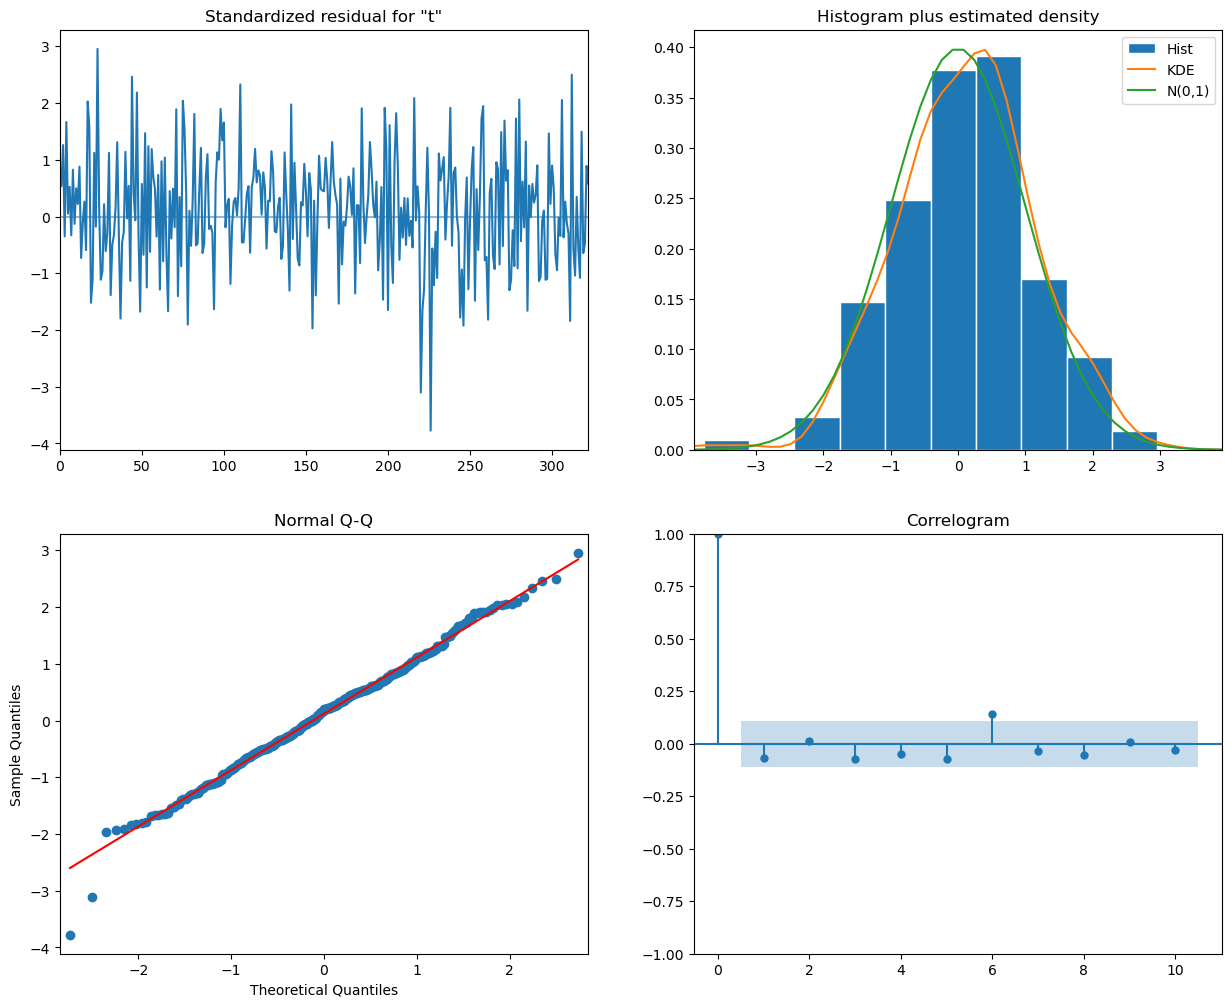

In [ ]:
warnings.filterwarnings("ignore")

df = df_indices.copy()

variaveis = ['IDHM', 'IVS']
dependente = 'taxa_mortalidade'

df[dependente] = np.log(df[dependente])

def verificar_formato_serie_temporal_anual(df, coluna_ano, colunas_numericas):
    try:
        df.index = pd.to_datetime(df[coluna_ano], format='%Y')
        df = df.drop(columns=[coluna_ano])
    except Exception as e:
        print(f"Erro ao converter para DatetimeIndex: {e}")
        return False

    for coluna in colunas_numericas:
        if not pd.api.types.is_numeric_dtype(df[coluna]):
            print(f"Erro: A coluna '{coluna}' não é numérica.")
            return False

    if not df.index.is_monotonic_increasing:
        print("Aviso: O índice de ano não está em ordem crescente. Ordenando...")
        df = df.sort_index()

    print("O DataFrame está no formato adequado para modelagem de séries temporais anuais.")
    return True

coluna_ano = 'ano'
colunas_numericas = ['IDHM', 'IVS', 'taxa_mortalidade']

if verificar_formato_serie_temporal_anual(df, coluna_ano, colunas_numericas):
    print("Continuando com a modelagem ARIMAX...")

    df = df.sort_index()
    y = df['taxa_mortalidade']
    exog = df[['IDHM', 'IVS']]

    param_grid = {
        'order': [(p, d, q) for p in range(0, 3) for d in range(0, 3) for q in range(0, 3)]
    }
    grid = ParameterGrid(param_grid)

    best_aic = float('inf')
    best_bic = float('inf')
    best_params_aic = None
    best_params_bic = None

    for params in grid:
        try:
            model = ARIMA(y, exog=exog, order=params['order'])
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params_aic = params['order']
            if results.bic < best_bic:
                best_bic = results.bic
                best_params_bic = params['order']
        except Exception as e:
            print(f"Erro ao ajustar modelo com parâmetros {params['order']}: {e}")

    print(f"Melhores parâmetros (AIC): {best_params_aic}")
    print(f"Melhor AIC: {best_aic}")
    print(f"Melhores parâmetros (BIC): {best_params_bic}")
    print(f"Melhor BIC: {best_bic}")

    # Ajustando o modelo com os melhores parâmetros (usando BIC)
    best_model = ARIMA(y, exog=exog, order=best_params_bic)
    best_results = best_model.fit()

    print(best_results.summary())

    best_results.plot_diagnostics(figsize=(15, 12))
    plt.show()

else:
    print("Corrija os erros no DataFrame antes de prosseguir.")

---

## Análise dos Testes para Regressão Espúria

### Estacionariedade (Teste ADF)
Os resultados do teste ADF indicam que todas as variáveis são estacionárias, pois os valores de ADF Statistic são menores que os valores críticos em todos os níveis de significância (1%, 5%, 10%), e os p-values são extremamente baixos, indicando rejeição da hipótese nula de não estacionariedade.

### Cointegração
Os resultados do teste de cointegração indicam que há uma relação de longo prazo entre IVS e taxa_mortalidade, pois o valor de Cointegration Statistic é menor que os valores críticos e o p-value é extremamente baixo, indicando rejeição da hipótese nula de não cointegração.

Por outro lado, a ausência de cointegração entre IDHM e taxa_mortalidade sugere que não há uma relação de longo prazo entre essas variáveis, pois o valor de Cointegration Statistic é maior que os valores críticos e o p-value é alto, indicando que não há cointegração.

### Implicações Práticas
- **Modelagem Apropriada:** As variáveis são estacionárias e o IVS cointegra com a variável dependente, indicando que o modelo ARIMAX é apropriado para capturar as relações de longo prazo entre essas variáveis.
- **Previsibilidade:** A cointegração sugere que o IVS tem um impacto consistente na taxa de mortalidade ao longo do tempo, facilitando previsões mais precisas.
- **Planejamento de Políticas:** Melhorias no IVS podem ter impactos significativos na taxa de mortalidade, orientando a formulação de políticas públicas. No entanto, mudanças no IDHM podem não ter um impacto tão consistente na taxa de mortalidade.

In [70]:
from statsmodels.tsa.stattools import adfuller, coint

# Função para realizar o teste de Dickey-Fuller aumentado (ADF)
def adf_test(series):
    result = adfuller(series)
    return {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4]
    }

# Função para realizar o teste de cointegração
def coint_test(series1, series2):
    result = coint(series1, series2)
    return {
        'Cointegration Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[2]
    }

# Testando se as variáveis possuem regressão espúria
adf_results = {}
for column in variaveis + [dependente]:
    adf_results[column] = adf_test(df[column])

# Exibindo os resultados do teste ADF
for variable, result in adf_results.items():
    print(f"Variable: {variable}")
    print(f"ADF Statistic: {result['ADF Statistic']}")
    print(f"p-value: {result['p-value']}")
    print("Critical Values:")
    for key, value in result['Critical Values'].items():
        print(f"   {key}: {value}")
    print("\n")

# Testando se há cointegração entre as variáveis independentes e a variável dependente
coint_results = {}
for column in variaveis:
    coint_results[column] = coint_test(df[column], df[dependente])

# Exibindo os resultados do teste de cointegração
for variable, result in coint_results.items():
    print(f"Cointegration Test between {variable} and {dependente}:")
    print(f"Cointegration Statistic: {result['Cointegration Statistic']}")
    print(f"p-value: {result['p-value']}")
    print("Critical Values:")
    for key, value in zip(['1%', '5%', '10%'], result['Critical Values']):
        print(f"   {key}: {value}")
    print("\n")

Variable: IDHM
ADF Statistic: -17.957256309181485
p-value: 2.8250336633505826e-30
Critical Values:
   1%: -3.4507587628808922
   5%: -2.870530068560499
   10%: -2.5715597727381647


Variable: IVS
ADF Statistic: -17.893700712694038
p-value: 2.9710882437607616e-30
Critical Values:
   1%: -3.4507587628808922
   5%: -2.870530068560499
   10%: -2.5715597727381647


Variable: taxa_mortalidade
ADF Statistic: -4.30789509919888
p-value: 0.0004304342177966466
Critical Values:
   1%: -3.451082300831733
   5%: -2.87067210822307
   10%: -2.5716355136268345


Cointegration Test between IDHM and taxa_mortalidade:
Cointegration Statistic: -2.1401072775680774
p-value: 0.45542897346655137
Critical Values:
   1%: -3.930668169540588
   5%: -3.3551121171486353
   10%: -3.057606721525175


Cointegration Test between IVS and taxa_mortalidade:
Cointegration Statistic: -11.153202646041127
p-value: 3.5662440152120606e-19
Critical Values:
   1%: -3.930668169540588
   5%: -3.3551121171486353
   10%: -3.0576067215

---

## Análise da Taxa de Mortalidade por Faixas de IDHM e IVS

Para o cálculo da taxa de mortalidade média, utilizamos os quartis das distribuições das variáveis explicativas, dividindo os dados em quatro grupos de 25% cada.

### Taxa de Mortalidade Média por Faixa de IDHM:
- **Baixo (<= 0.704):** ~ 10.24%
- **Médio Baixo (0.704 - 0.735):** ~ 9,09%
- **Médio Alto (0.735 - 0.775):** ~ 8,42%
- **Alto (> 0.775):** ~ 5,27%

### Taxa de Mortalidade Média por Faixa de IVS:
- **Baixo (<= 0.218):** ~ 6,39%
- **Médio Baixo (0.218 - 0.260):** ~ 7,42
- **Médio Alto (0.260 - 0.297):** ~ 9,22%
- **Alto (> 0.297):** ~ 10,12%

### Análise Preliminar

Os resultados indicam uma relação inversa entre o IDHM e a taxa de mortalidade. Conforme o IDHM aumenta, a taxa de mortalidade média diminui. Isso é consistente com a análise anterior, onde observamos que melhorias no IDHM estão associadas a uma redução na taxa de mortalidade. Especificamente, a faixa "Alto" (> 0.775) apresenta a menor taxa de mortalidade média (5,27%), enquanto a faixa "Baixo" (<= 0.704) apresenta a maior taxa de mortalidade média (10.24%).

Por outro lado, a relação entre o IVS e a taxa de mortalidade é direta. Conforme o IVS aumenta, a taxa de mortalidade média também aumenta. Isso também é consistente com a análise anterior, onde observamos que aumentos no IVS estão associados a um aumento na taxa de mortalidade. Especificamente, a faixa "Alto" (> 0.297) apresenta a maior taxa de mortalidade média (10,12%), enquanto a faixa "Baixo" (<= 0.218) apresenta a menor taxa de mortalidade média (6,39%).

C:\Users\gafel\AppData\Local\Temp\ipykernel_5616\2299209607.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_mortalidade_media_por_faixa_idhm = df.groupby('Faixa_IDHM')['taxa_mortalidade'].mean().reset_index()
C:\Users\gafel\AppData\Local\Temp\ipykernel_5616\2299209607.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_mortalidade_media_por_faixa_ivs = df.groupby('Faixa_IVS')['taxa_mortalidade'].mean().reset_index()
c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of

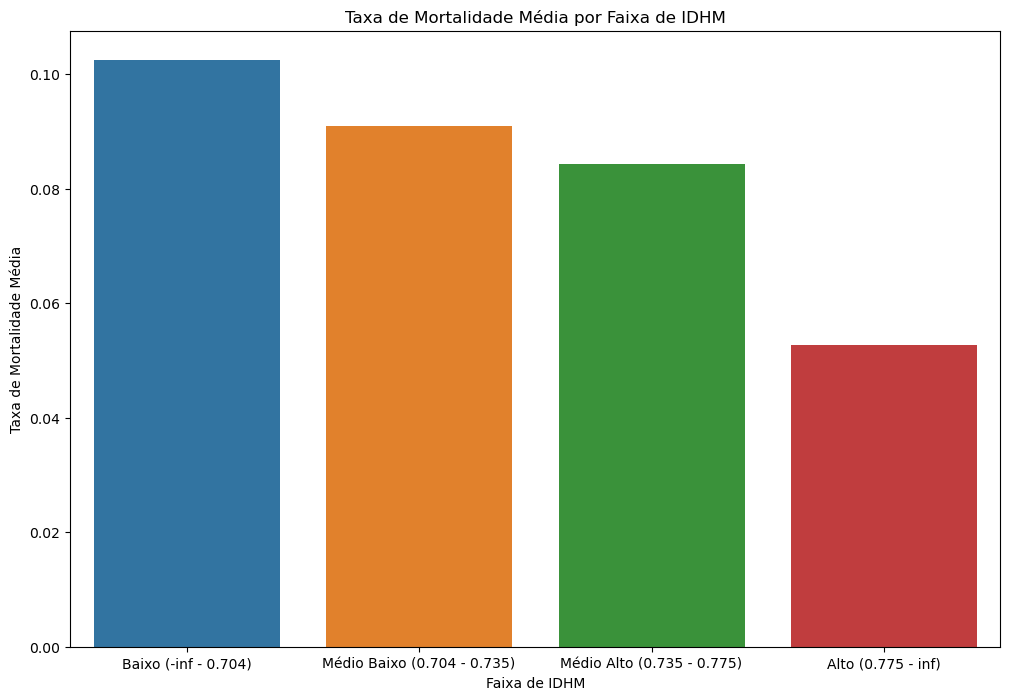

c:\Users\gafel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


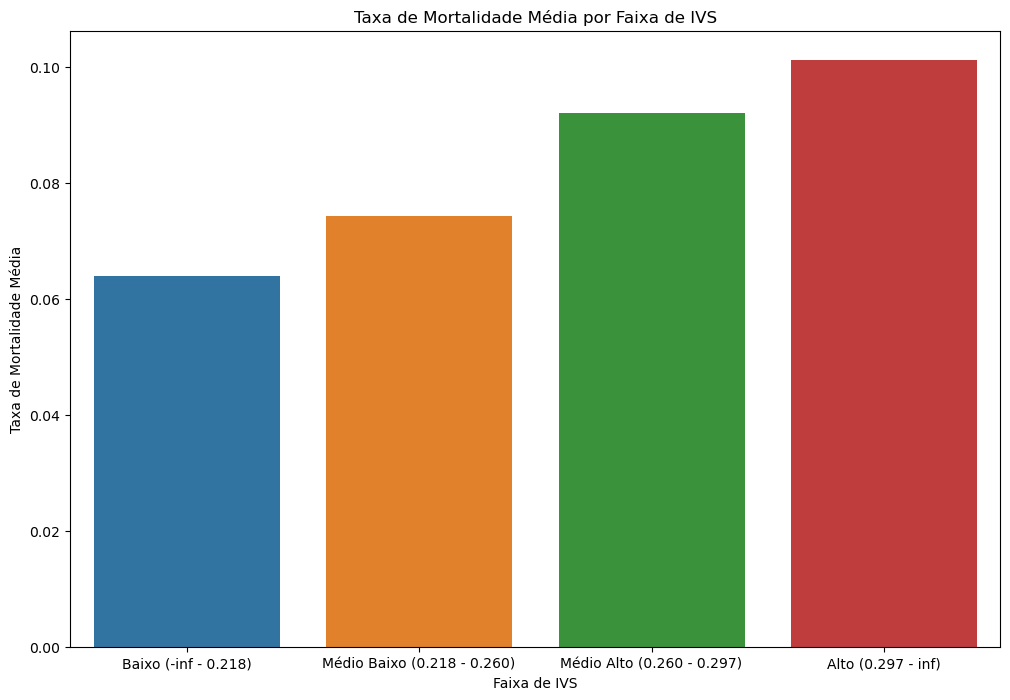

Taxa de Mortalidade Média por Faixa de IDHM:
                    Faixa_IDHM  taxa_mortalidade
0         Baixo (-inf - 0.704)          0.102470
1  Médio Baixo (0.704 - 0.735)          0.090890
2   Médio Alto (0.735 - 0.775)          0.084239
3           Alto (0.775 - inf)          0.052694

Taxa de Mortalidade Média por Faixa de IVS:
                     Faixa_IVS  taxa_mortalidade
0         Baixo (-inf - 0.218)          0.063949
1  Médio Baixo (0.218 - 0.260)          0.074349
2   Médio Alto (0.260 - 0.297)          0.092175
3           Alto (0.297 - inf)          0.101242


In [8]:
df = df_indices.copy()

# Função para criar faixas de acordo com a distribuição das variáveis explicativas
def criar_faixas(df, coluna):
    # Calculando os quartis
    quartis = df[coluna].quantile([0.25, 0.5, 0.75])
    
    # Criando faixas com base nos quartis
    faixas = pd.cut(df[coluna], bins=[-np.inf] + list(quartis) + [np.inf], labels=[
        f'Baixo ({-np.inf:.3f} - {quartis[0.25]:.3f})',
        f'Médio Baixo ({quartis[0.25]:.3f} - {quartis[0.50]:.3f})',
        f'Médio Alto ({quartis[0.50]:.3f} - {quartis[0.75]:.3f})',
        f'Alto ({quartis[0.75]:.3f} - {np.inf:.3f})'
    ])
    
    return faixas

# Criando faixas para IDHM e IVS
df['Faixa_IDHM'] = criar_faixas(df, 'IDHM')
df['Faixa_IVS'] = criar_faixas(df, 'IVS')

# Calculando a taxa de mortalidade média por faixa de IDHM
taxa_mortalidade_media_por_faixa_idhm = df.groupby('Faixa_IDHM')['taxa_mortalidade'].mean().reset_index()

taxa_mortalidade_media_por_faixa_idhm.to_excel('taxa_mortalidade_media_por_faixa_idhm.xlsx')

# Calculando a taxa de mortalidade média por faixa de IVS
taxa_mortalidade_media_por_faixa_ivs = df.groupby('Faixa_IVS')['taxa_mortalidade'].mean().reset_index()
taxa_mortalidade_media_por_faixa_ivs.to_excel('taxa_mortalidade_media_por_faixa_ivs.xlsx')

# Visualizando os dados graficamente para IDHM
plt.figure(figsize=(12, 8))
sns.barplot(x='Faixa_IDHM', y='taxa_mortalidade', data=taxa_mortalidade_media_por_faixa_idhm)
plt.title('Taxa de Mortalidade Média por Faixa de IDHM')
plt.xlabel('Faixa de IDHM')
plt.ylabel('Taxa de Mortalidade Média')
plt.show()

# Visualizando os dados graficamente para IVS
plt.figure(figsize=(12, 8))
sns.barplot(x='Faixa_IVS', y='taxa_mortalidade', data=taxa_mortalidade_media_por_faixa_ivs)
plt.title('Taxa de Mortalidade Média por Faixa de IVS')
plt.xlabel('Faixa de IVS')
plt.ylabel('Taxa de Mortalidade Média')
plt.show()

# Exibindo os valores das faixas e taxa de mortalidade média
print("Taxa de Mortalidade Média por Faixa de IDHM:")
print(taxa_mortalidade_media_por_faixa_idhm)

print("\nTaxa de Mortalidade Média por Faixa de IVS:")
print(taxa_mortalidade_media_por_faixa_ivs)

---

### Relação entre Taxa de Mortalidade e IDHM
O Índice de Desenvolvimento Humano Municipal (IDHM) mede o desenvolvimento humano em termos de educação, longevidade e renda. Regiões com IDHM mais alto tendem a ter melhores condições de vida, incluindo acesso a serviços de saúde, resultando em menores taxas de mortalidade.

#### Observações:
- **Centro-Oeste, Sudeste e Sul**: Apresentam IDHM mais altos e, consequentemente, taxas de mortalidade por acidentes de trânsito mais baixas.
- **Nordeste e Norte**: Com IDHM mais baixos, enfrentam maiores desafios em infraestrutura e segurança viária, refletindo em taxas de mortalidade mais altas.

### Relação entre Taxa de Mortalidade e IVS
O Índice de Vulnerabilidade Social (IVS) mede a vulnerabilidade das populações em termos de acesso a serviços básicos e condições de moradia. Regiões com IVS mais alto enfrentam maiores desafios sociais, impactando negativamente a segurança viária e aumentando as taxas de mortalidade.

#### Observações:
- **Centro-Oeste, Sudeste e Sul**: Com IVS mais baixos, têm melhores condições socioeconômicas e infraestrutura, contribuindo para menores taxas de mortalidade por acidentes de trânsito.
- **Nordeste e Norte**: Com IVS mais altos, têm maior vulnerabilidade social e infraestrutura precária, refletindo em taxas de mortalidade mais altas.

### Insights Preliminares
- **Desenvolvimento Humano e Mortalidade**: Há uma correlação inversa entre IDHM e taxa de mortalidade por acidentes de trânsito. Regiões com maior desenvolvimento humano tendem a ter menores taxas de mortalidade.
- **Vulnerabilidade Social e Mortalidade**: Existe uma correlação direta entre IVS e taxa de mortalidade por acidentes de trânsito. Regiões com maior vulnerabilidade social tendem a ter maiores taxas de mortalidade.

Essas observações sugerem que melhorias nos índices de desenvolvimento humano e redução da vulnerabilidade social podem contribuir para a diminuição das taxas de mortalidade por acidentes de trânsito nas rodovias federais.

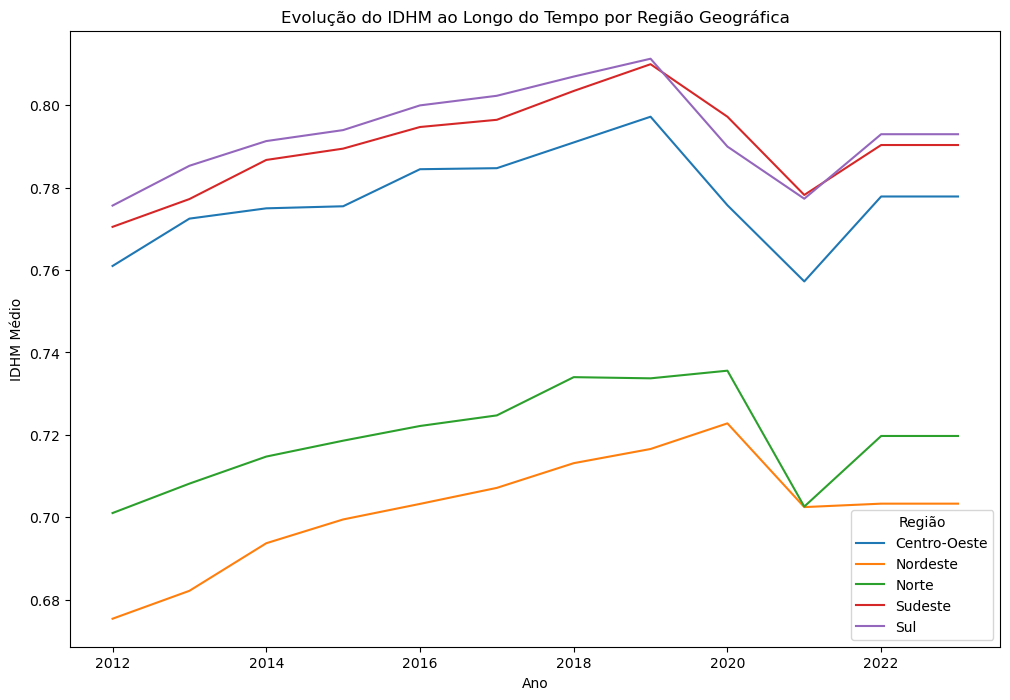

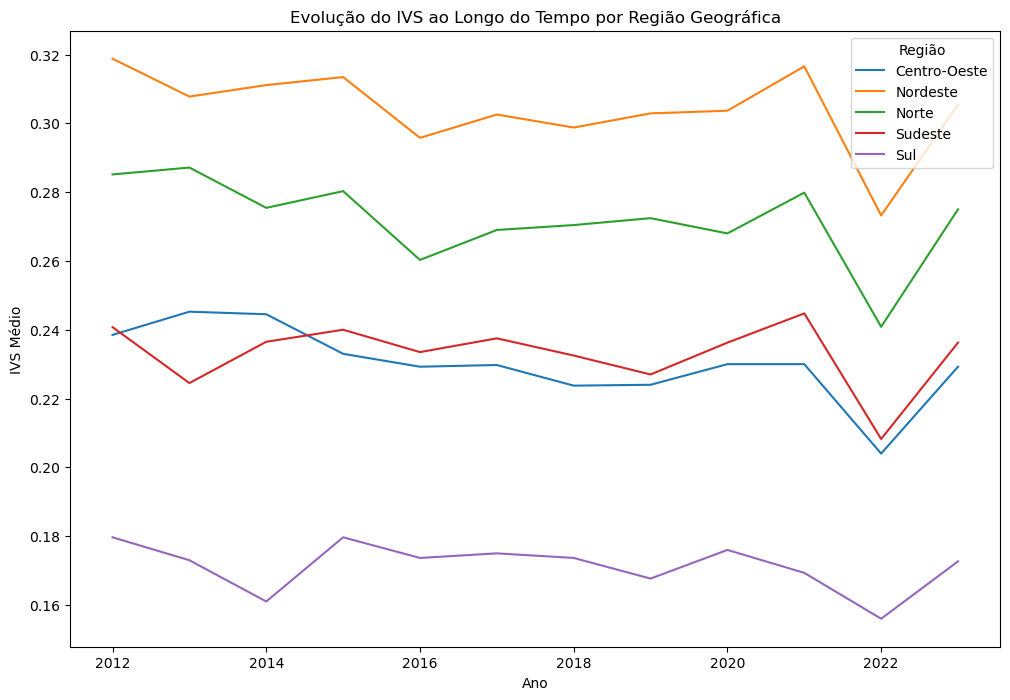

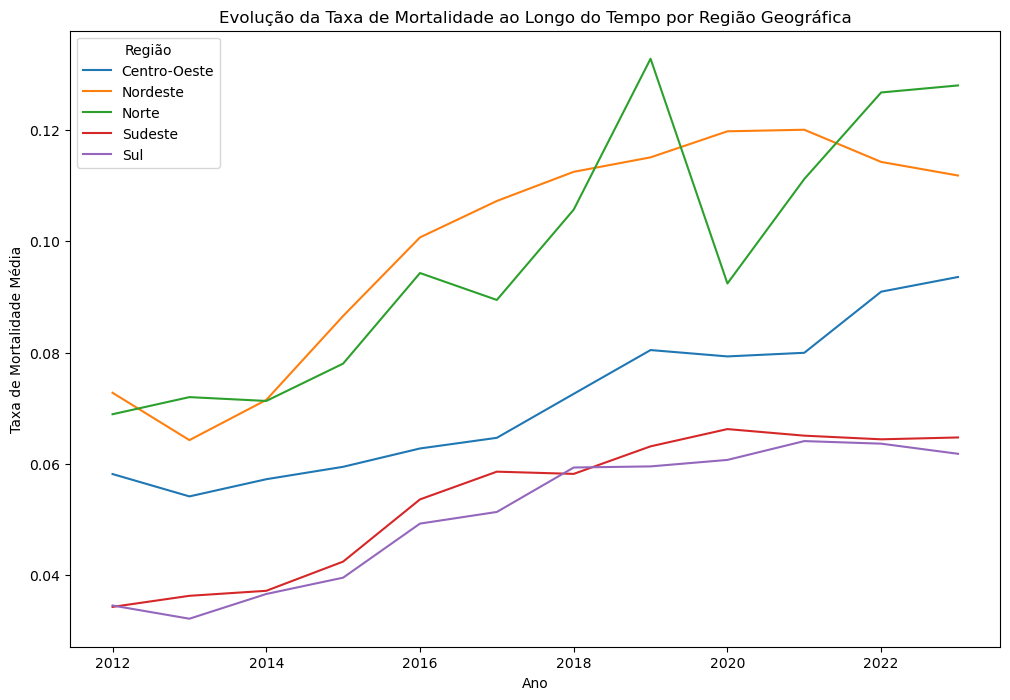

In [90]:
df = df_indices.copy()
df_rg = df_regioes.collect().to_pandas()
df = df.merge(df_rg, left_on='Sigla', right_on='uf')

# Agregando os dados por região geográfica e ano
df_agregado = df.groupby(['regiao', 'ano']).agg({
    'IDHM': 'mean',
    'IVS': 'mean',
    'taxa_mortalidade': 'mean'
}).reset_index()

# Visualizando a evolução das métricas ao longo do tempo por região geográfica
plt.figure(figsize=(12, 8))
sns.lineplot(x='ano', y='IDHM', hue='regiao', data=df_agregado)
plt.title('Evolução do IDHM ao Longo do Tempo por Região Geográfica')
plt.xlabel('Ano')
plt.ylabel('IDHM Médio')
plt.legend(title='Região')
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(x='ano', y='IVS', hue='regiao', data=df_agregado)
plt.title('Evolução do IVS ao Longo do Tempo por Região Geográfica')
plt.xlabel('Ano')
plt.ylabel('IVS Médio')
plt.legend(title='Região')
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(x='ano', y='taxa_mortalidade', hue='regiao', data=df_agregado)
plt.title('Evolução da Taxa de Mortalidade ao Longo do Tempo por Região Geográfica')
plt.xlabel('Ano')
plt.ylabel('Taxa de Mortalidade Média')
plt.legend(title='Região')
plt.show()